In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import tarfile
import pathlib

In [55]:
# Inputs ETH
run_type = 'ov'

if run_type == 'brca':
   
    sample_target = 'TCGA-AO-A0JM-01A-21R-A056-07'
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102'
    #filtering_id = 'chosen_filters_06March_order' # OLD!!!!
elif run_type == 'ov':
    sample_target = 'TCGA-25-1319-01A-01R-1565-13'
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374'
    filtering_id = 'filters_16_May_QUICK_STAR/'

filter_dir = os.path.join(basedir, 'filtering_samples', filtering_id)

In [56]:
# Inputs OHSU
path_filt_ohsu = f'output/kmer_files/J_{sample_target}_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv'

tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/include_ANY_filters_OHSU-results_March22-2023/OHSU_March27-2023_fixAnyfilters_results.tar.gz'

In [57]:
path_ohsu

'output/kmer_files/J_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv'

In [74]:
# DEPRECATED WITH METADATA
# File obtained from 
# 1. Filtered kmer list 
# 2. Generation info
# 3. Added a lot of false positive related information in projects2020_ohsu/eth/debug/debug_false_positives/p20230307_filter_allRF_quality_check.ipynb
#metadata = 'metadata2'


#NEW NO METADATA
path_inter_eth = os.path.join(basedir, 'filtering_intermediate/complete_cancer_candidates_order_r_complete.tsv.gz')
#path_inter_eth = os.path.join(basedir, 'filtering_intermediate/complete_cancer_candidates_order_r_complete.STAR_GTEx.tsv.gz')

metadata = ''
path_filt_eth = f'G_{sample_target}_SampleLim0.0CohortLimAnyAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1{metadata}.tsv.gz'
path_filt_eth = os.path.join(basedir, filter_dir, path_filt_eth)


In [75]:
path = os.path.join(filter_dir, path_interest)
plot_dir = os.path.join(filter_dir, 'plots')
base_plot = path_interest.replace('.tsv.gz', '')
pathlib.Path(plot_dir).mkdir(parents=True, exist_ok=True)

In [76]:
custom.shape

(131962, 30)

In [77]:
# Custom code
custom_merge = True
custom = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_22March_order_wany_wAnnot/G_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1metadata2.tsv.gz'
custom = pd.read_csv(custom, sep = '\t')
custom.head()

,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,TCGA61200801A02R156813all,TCGA24143101A01R156613all,TCGA24229801A01R156913all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon1<cancExon1,gtexExon2<cancExon2,info_not_available
0,RMREATKGP,NaN,NaN,NaN,NaN,NaN,NaN,55350885:55350897:55352540:55352555:None:None,False,True,...,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False,False
1,QVERMREAT,NaN,NaN,NaN,NaN,NaN,NaN,55350876:55350897:55352540:55352546:None:None,False,True,...,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False,False
2,VERMREATK,NaN,NaN,NaN,NaN,NaN,NaN,55350879:55350897:55352540:55352549:None:None,False,True,...,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False,False
3,MREATKGPV,NaN,NaN,NaN,NaN,NaN,NaN,55350888:55350897:55352540:55352558:None:None,False,True,...,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False,False
4,VQVERMREA,NaN,NaN,NaN,NaN,NaN,NaN,55350873:55350897:55352540:55352543:None:None,False,True,...,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False,False


# Plot 1

In [104]:
# Read ETH Data
print(f'Reading {path}')
df_inter = pd.read_csv(path_inter_eth, sep = '\t')
print(df_inter.shape)
print(f'Reading {path_filt_eth}')
df_filt = pd.read_csv(path_filt_eth, sep = '\t')
print(df_filt.shape)
# Merge generation matrix & filtered kmers
df = df_inter.merge(df_filt, on = list(df_filt.columns), how = 'right')
print(df.shape)
display(df.head())


Reading /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_16_May_QUICK_STAR/G_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimAnyAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv.gz
(46132795, 24)
Reading /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_16_May_QUICK_STAR/G_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimAnyAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv.gz
(59507, 4)
(59631, 24)


,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,cancerCohortfilter >=2.0,cancerCohortfilter >=3.0,cancerCohortfilter >=5.0,cancerCohortfilter >=10.0,TCGA25131901A01R156513all,TCGA25131301A01R156513all,TCGA61200801A02R156813all,TCGA24143101A01R156613all,TCGA24229801A01R156913all,isAnnotated
0,RMREATKGP,NaN,NaN,NaN,NaN,NaN,NaN,55350885:55350897:55352540:55352555:None:None,False,True,...,2,2,2,2,10.91096,0.0,0.0,0.0,0.0,NaN
1,QVERMREAT,NaN,NaN,NaN,NaN,NaN,NaN,55350876:55350897:55352540:55352546:None:None,False,True,...,2,2,2,2,10.91096,0.0,0.0,0.0,0.0,NaN
2,VERMREATK,NaN,NaN,NaN,NaN,NaN,NaN,55350879:55350897:55352540:55352549:None:None,False,True,...,2,2,2,2,10.91096,0.0,0.0,0.0,0.0,NaN
3,MREATKGPV,NaN,NaN,NaN,NaN,NaN,NaN,55350888:55350897:55352540:55352558:None:None,False,True,...,2,2,2,2,10.91096,0.0,0.0,0.0,0.0,NaN
4,VQVERMREA,NaN,NaN,NaN,NaN,NaN,NaN,55350873:55350897:55352540:55352543:None:None,False,True,...,2,2,2,2,10.91096,0.0,0.0,0.0,0.0,NaN


In [105]:
if custom_merge:
    df = custom.merge(df_filt, on = list(df_filt.columns), how = 'right')
    print(df.shape)
    

(59873, 30)


In [106]:
print(df.columns)


Index(['kmer', 'gtexCohortfilter >0.0', 'gtexCohortfilter >=1.0',
       'gtexCohortfilter >=2.0', 'gtexCohortfilter >=3.0',
       'gtexCohortfilter >=5.0', 'gtexCohortfilter >=10.0', 'coord',
       'junctionAnnotated', 'readFrameAnnotated', 'isCrossJunction', 'batch',
       'cancerCohortfilter >0.0', 'cancerCohortfilter >=1.0',
       'cancerCohortfilter >=2.0', 'cancerCohortfilter >=3.0',
       'cancerCohortfilter >=5.0', 'cancerCohortfilter >=10.0',
       'TCGA25131901A01R156513all', 'TCGA25131301A01R156513all',
       'TCGA61200801A02R156813all', 'TCGA24143101A01R156613all',
       'TCGA24229801A01R156913all', 'isAnnotated', 'strand',
       'junction_coordinate', 'coordinate_in_GTEX', 'gtexExon1<cancExon1',
       'gtexExon2<cancExon2', 'info_not_available'],
      dtype='object')


In [107]:
# COMPULSORY 
recurr_col = 'cancerCohortfilter >0.0'
expr_col = sample_target.replace('-', '') + 'all'
jxannot = 'junctionAnnotated'
rfannot = 'readFrameAnnotated'
idx = 'index'

# OPTIONAL 
check_in_gtex_coord = 'coordinate_in_GTEX'
check_exons_length = 'gtexExon2<cancExon2'
info = 'info_not_available'
jx_coord = 'junction_coordinate'

df = df.sort_values(by=[recurr_col])
df[idx] = np.arange(len(df))

In [108]:
df[['kmer', recurr_col, expr_col, jxannot, rfannot, idx, 'batch' ]]

,kmer,cancerCohortfilter >0.0,TCGA25131901A01R156513all,junctionAnnotated,readFrameAnnotated,index,batch
28751,RACDHLHQD,1.0,1.678609,False,False,0,27942.0
43430,EWKDLCQPL,1.0,1.678609,False,False,1,36723.0
43431,PEWKDLCQP,1.0,1.678609,False,False,2,36723.0
43432,LPEWKDLCQ,1.0,1.678609,False,False,3,36723.0
43433,DLPEWKDLC,1.0,1.678609,False,False,4,36723.0
...,...,...,...,...,...,...,...
57642,QRYQQWMES,NaN,NaN,True,False,59868,NaN
58046,PRSPFKVKA,NaN,NaN,True,False,59869,NaN
58090,KKKAEGAQN,NaN,NaN,False,True,59870,NaN
59070,KAAPGYHMT,NaN,NaN,True,False,59871,NaN


In [109]:
#df = df.tail(50)

In [110]:
df.columns

Index(['kmer', 'gtexCohortfilter >0.0', 'gtexCohortfilter >=1.0',
       'gtexCohortfilter >=2.0', 'gtexCohortfilter >=3.0',
       'gtexCohortfilter >=5.0', 'gtexCohortfilter >=10.0', 'coord',
       'junctionAnnotated', 'readFrameAnnotated', 'isCrossJunction', 'batch',
       'cancerCohortfilter >0.0', 'cancerCohortfilter >=1.0',
       'cancerCohortfilter >=2.0', 'cancerCohortfilter >=3.0',
       'cancerCohortfilter >=5.0', 'cancerCohortfilter >=10.0',
       'TCGA25131901A01R156513all', 'TCGA25131301A01R156513all',
       'TCGA61200801A02R156813all', 'TCGA24143101A01R156613all',
       'TCGA24229801A01R156913all', 'isAnnotated', 'strand',
       'junction_coordinate', 'coordinate_in_GTEX', 'gtexExon1<cancExon1',
       'gtexExon2<cancExon2', 'info_not_available', 'index'],
      dtype='object')

In [111]:
# # TEST 
# df = df.loc[(df['gtexExon1<cancExon1'] != True) &
#             (df['gtexExon2<cancExon2'] != True )]

In [112]:
df.loc[(df['gtexExon1<cancExon1'] == 'True') | 
            (df['gtexExon2<cancExon2'] == 'True' )].shape
print(df.shape)

(59873, 31)


In [126]:
df.loc[(df['gtexExon2<cancExon2'] == 'False')].shape

(57468, 31)

In [129]:
df.loc[(df['gtexExon1<cancExon1'] == 'True')].shape

(0, 31)

In [115]:
df.head()

,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,TCGA24143101A01R156613all,TCGA24229801A01R156913all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon1<cancExon1,gtexExon2<cancExon2,info_not_available,index
28751,RACDHLHQD,NaN,NaN,NaN,NaN,NaN,NaN,17365642:17365657:17365289:17365301:None:None,False,False,...,0.0,0.0,NaN,-,17365301:17365642,False,False,False,False,0
43430,EWKDLCQPL,NaN,NaN,NaN,NaN,NaN,NaN,20122306:20122313:20122399:20122419:None:None,False,False,...,0.0,0.0,NaN,+,20122313:20122399,False,False,False,False,1
43431,PEWKDLCQP,NaN,NaN,NaN,NaN,NaN,NaN,20122303:20122313:20122399:20122416:None:None,False,False,...,0.0,0.0,NaN,+,20122313:20122399,False,False,False,False,2
43432,LPEWKDLCQ,NaN,NaN,NaN,NaN,NaN,NaN,20122300:20122313:20122399:20122413:None:None,False,False,...,0.0,0.0,NaN,+,20122313:20122399,False,False,False,False,3
43433,DLPEWKDLC,NaN,NaN,NaN,NaN,NaN,NaN,20122297:20122313:20122399:20122410:None:None,False,False,...,0.0,0.0,NaN,+,20122313:20122399,False,False,False,False,4


In [114]:
df.loc[(df['gtexExon1<cancExon1'] != 'True') &
            (df['gtexExon2<cancExon2'] != 'True' )].shape

(59873, 31)

/scratch/slurm-job.1272649/ipykernel_2749322/3067785429.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
/scratch/slurm-job.1272649/ipykernel_2749322/3067785429.py:46: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)
/scratch/slurm-job.1272649/ipykernel_2749322/3067785429.py:84: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


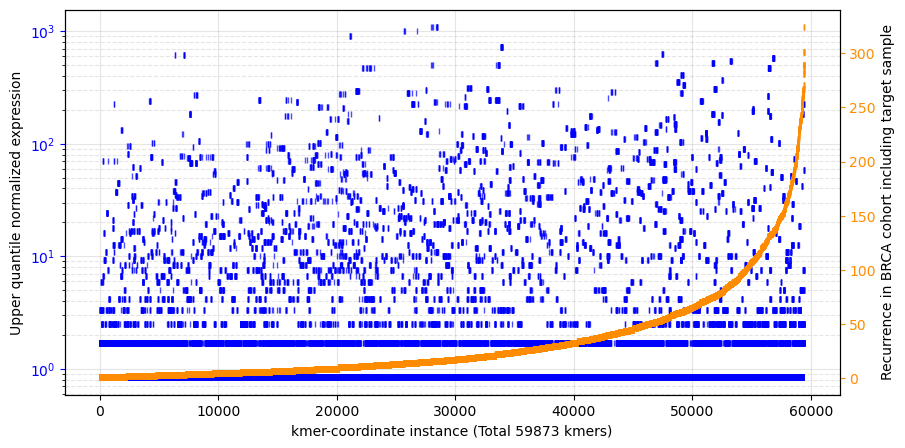

In [131]:
# PLOT RECURRENCE_EXPRESSION + Is in GTEX

overlay = False
suffix = ''

if overlay:
    plot_in_GTEX = False
    plot_check_exons_length = True
    if plot_in_GTEX: 
        col = check_in_gtex_coord
        color3 = 'lightcoral'
        legend3 = 'Junction coordinate in GTEX FULL (> 9000) cohort graph'
        suffix = '_coordinateGTEX'
    elif plot_check_exons_length:
        col = check_exons_length
        color3 = 'yellow'
        legend3 = 'Case *: Second GTEX Exon small'
        suffix = 'exons'

marker_size = 4
color1 = 'blue'
color2 = 'darkorange'
color4 = 'green'
colorgrid = 'grey'
alpha_marker1 = 0.7
alpha_marker2 = 0.5
alpha_bar = 0.3
alpha_grid = 0.2

# Figure initialize 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
if overlay:
    ax3 = ax.twinx()
    ax4 = ax.twinx()



# Ax 1
df.plot(x=idx, y=expr_col, ax=ax, legend=False, marker='|', alpha=alpha_marker1,
        linestyle = 'None', markerfacecolor=color1, markeredgecolor=color1, markersize=marker_size)
ax.set_ylabel('Upper quantile normalized expression')
ax.tick_params(axis='y', colors=color1)
ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)

# Ax 2
df.plot(x=idx, y=recurr_col, ax=ax2, legend=False, marker="|", alpha=alpha_marker2,
              linestyle = 'None', markerfacecolor='None', markeredgecolor=color2, markersize=marker_size)
ax2.set_ylabel('Recurrence in BRCA cohort including target sample')
ax2.tick_params(axis='y', colors=color2) #, labelsize=14)

if overlay:
    # Ax 3
    df[col] = df[col].astype(bool)
    ax3.bar(x=df[idx], height=df[col], alpha=alpha_bar, color=color3)
    ax3.legend([legend3], loc='upper left')
    ax3.tick_params(axis='y', colors=color3) #, labelsize=14)
    ax3.set_yticks([])
    ax3.set_yticks([], minor=False)

    # Ax 4
    ax4.bar(x=df[idx], height=df[info], alpha = alpha_bar, color=color4)
    ax4.legend(['No info'], loc="upper left", bbox_to_anchor=(0, 0.9))
    ax4.tick_params(axis='y', colors=color4) #, labelsize=14)
    ax4.set_yticks([])
    ax4.set_yticks([], minor=False)

# All plots
ax.set_xlabel(f'kmer-coordinate instance (Total {len(df)} kmers)')
ax.set_yscale("log")
#ax2.set_yscale("log")
#ax.figure.legend()


save = False
name = 'Recurr_expr' + suffix
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
fig.show()

In [90]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA4kAAAHACAYAAAAP5i3YAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOydd3xUVfbAv2/SG2kkmUgJEBRBUUNXFGkWLICgKCrqujbkhyuKiA3XhgURG6Koa8FFRVhQ1xUQIiBFEAiigCgBQ5FAyCSB9GTm/f64eVOSSTIzmZ77/Xzm8yZ3Xu47Z859d9655RxFVVUViUQikUgkEolEIpFIAJ2vBZBIJBKJRCKRSCQSif8gnUSJRCKRSCQSiUQikZiRTqJEIpFIJBKJRCKRSMxIJ1EikUgkEolEIpFIJGakkyiRSCQSiUQikUgkEjPSSZRIJBKJRCKRSCQSiRnpJEokEolEIpFIJBKJxIx0EiUSiUQikUgkEolEYibU1wL4mtraWnJyckhLS0Onkz6zRCKRSCQSiUTSWjGZTBw7doysrCxCQ1uvq9R6Na8jJyeHfv36+VoMiUQikUgkEolE4ids2bKFvn37+loMn9HqncS0tDRANIT09HSfymIymSgoKCAlJUXOagYR0q7Bi7RtcCLtGrxI2wYn0q7Biy9se/ToUfr162f2EVorrd5J1Bpceno67du396ksJpOJ0NBQ9Hq97OSCCGnX4EXaNjiRdg1epG2DE2nX4MWXtm3tbal1ay+RSCQSiUQikUgkEhukkyiRSCQSiUQikUgkEjPSSZRIJBKJRCKRSCQSiRnpJEokEolEIpFIJBKJxIx0EiUSiUQikUgkEolEYkY6iRKJRCKRSCQSiUQiMSOdRIlEIpFIJBKJRCKRmJFOokQikUgkEolEIpFIzEgnUSKRSCQSiUQikUgkZqSTKJFIJBKJRCKRSCQSM9JJlEgkEolEIpFIJBKJGekkSiQSiSSgMBhg/nyYM0ccDQbxmjIF2rWDZct8LaFEIpFIHObwD/DpheIo8RsC3kk8dQr69oXzzoOePeHdd30tkUQikUg8SVERfPYZLFokjkVF4vX11/DXX7B5s68llEgkEonDHP8V8reKo8Rl9u3bx4oVK6ioqABAVdUW1RfqDqF8SXQ0rF0rjuXlcPbZMGYMJCf7WjKJRCKRSCQSiUQi8RyFhYVcf/31ZGdnoygKf/zxB126dOGOO+4gISGB2bNnu1RvwM8khoQIBxGgshKMRmih4yyRSCQSiUQikUgkfs+UKVMIDQ3l4MGDRGtOEXD99dezfPlyl+v1uZO4bh1cfTWcdhooiv29JG+9BZ07Q2Qk9O4NP9RbslxcDOeeC+3bw7Rp0LatNySXSCQSiUZuLvz972KfoMHg2P8YDLBwoePnSyQSiUQisWXlypW8+OKLtG/f3qb89NNPJy8vz+V6fe4klpUJB+/NN+1//vnncP/98NhjkJMDF10EI0bAwYOWcxIS4Oef4cAB8cBx7Jg3JJdIJBKJRl6eGORbtEjsD3SEoiL49FPHz5dIJBKJRGJLWVmZzQyixokTJ4iIiHC5Xp/vSRwxQrwa45VXxOj0HXeIv199FVasgHnz4Pnnbc9NS4NzzhGzk9ddZ7++qirx0jh1ShxNJhMmk8llPdyBJoOv5ZC4F2nX4EXa1oJY5q8AYDKpOPKVmEygqorD52vEx8O4cWIfekyM+BvgqquEk9q3L07V11AuaddgRdo2OJF2DXDangVpvcWxng19YdtAa0eDBg3i448/5plnngFAURRMJhOzZs1iyJAhLtfrcyexKaqrYds2mD7dtvzSS2HjRvH+2DGIioI2beDkSeEgTpzYeJ3PPw9PPdWwvKCggNBQ334dqqpSWFiIoigoiuJTWSTuQ9o1eJG2tVBYGI6qJlJdbaSgoIiYGGOz/1NQEEJVVTwFBSUOnW/NyJGW99XV4jhtmngB5Oc7VZ0N0q7Bi7RtcCLtGuCEdoXBX4j39TpvX9i2oKDAK9dxF7NmzWLw4MFs3bqV6upqpk2bxq5duzAYDGzYsMHlev3aSTxxQgSiSUuzLU9Ls7Shw4fFTKOqitf//Z+YTWyMRx6BBx6w/H3kCPToASkpKej1evcr4QQmkwlVVUlLS0On8/lKYImbkHYNXqRtLSQni9HL8HBdXX/a/P+UlUFEhOLw+d5C2jV4kbYNTqRdgxdf2La2ttYr13EXPXr0YOfOncybN4+QkBDKysoYM2YMkyZNIj093eV6/dpJ1Kg/cKCqlrLevWHHDsfriogQL42TJ8VRp9P5RceiyeEPskjch7Rr8OKsbbOzYdIkkarnwQchKcnDAnoJ635ap1Nw5OvQ6cT/OXq+N5H3bPAibRucSLsGL962bSC2Ib1ez1P2lkq2AL92Etu2FSku6i8bOn684eyiRCKRBAI5OfDbb7B0Kdx+e/A4iRkZMHq0yFWbmOjY/yQmwvjxjp8vkUgkEokEdu7c6fC55zS1xLIJ/NpJDA8XM4XffQfXXGMp/+47GDXKvdey3hSrrXtWVRXVKumiq+X1N8A2Vg5i7XX9cp1O5zZZvK2TPdlbm07Q0K6BrlMw2slVGV3rO7R2AeB/OrlS3rkzvPuuc3ZKSIAbb9TVfY/+pZM9uwaDnZqTPdh1sn4Fi07Nyd4adNJsqp0TDDp5W3Z/1ckTdm1Op0AIXHPeeeeZdWwKRVEwGp3b86/hcyextBT27bP8feCAWD6alAQdO4r9gxMmQJ8+cP75MH++SH9xzz0tu+7cuXOZO3cu1XURD6wD10RHR5OQkEBJSQnl5eXm/4mLiyMuLg6DwUCVVYjUhIQEoqOjKSgosFnHnJycTEREBMePH7dpcCkpKYSEhJBfb4o0NTUVo9HIsWPHUBTxEKnT6dDr9VRXV1NYWGg+NzQ0lNTUVCoqKiguLjaXR0REkJycTGlpKae00K0+1Emv12M0Gm02Abc2ndq2bUtVVZWNXQNdp2C0k6s6WW+od0SnkyfDgXhqa2uprjYB/qdTMNrJWZ2s7RosOgWjnZzVSVUtQTDS09ODQqdgtJOzOml2DQ0NRa/XB4VOGsFkJ1d0UlWV0tJSAK/pFAiBaw4cOODxayhqcy6oh1mzBuxFZ731VvjwQ/H+rbfgpZfg6FGxlGnOHBg0yD3XP3z4MB06dCAvL8+chNJXozAAR48ebbA5V44sBbZOqqo2sGug6xSMdnJFFqPRyNGjR9Hr9eh0OofqmT1b5aGHFLp3h6++gq5d/UunYLSTu+wayDoFo51c0clkMpGfn49eryc0NDQodGpO9tagk2bX9PR0QkJCgkInb8vurzqZTCaOHTtGenq6+TNP63T48GEyMjI4dOhQgwT1rQmfzyQOHqwtuWqce+8VL09ib0Os1mjq42x5Yxtg65ebTCYURfGoLN7WyR9l97ZOqqr6zK7STp6X0d6Gekfr0d76m07BaCd32DXQdQpGO7mik7Vd/U12aSfXddIGdLwhu7STd3Vyt10d6SMCjb179/LGG2+wZ88eFEXhzDPPZPLkyXTr1s3lOgPvW5BIJJIAJisLzjxT7LOWAVskEolEIpG0hMWLF3P22Wezbds2zj33XM455xy2b9/O2WefzRdffOFyvT6fSZRIJJLWxNChsGePr6WQSCQSiUQSDEybNo1HHnmEp59+2qb8ySef5OGHH+a6665zqV7pJNYho5sG1hr1QNIJZHTTYNbJHX2Hv+kUjHZyh10DXadgtJOzOsnopsGpk4xuGrw6yeimzZOfn88tt9zSoPzmm29m1qxZLtfbap1EGd3UOzrJCF4yummw6+RsdNNA0CkY7SSjmwannWR00+C0k7M6aXaV0U2DTydVldFNm2Pw4MH88MMPdO3a1aZ8/fr1XHTRRS7X6/Popr5GRjcNzJGlQNJJVWV002DVyZXopv6uUzDayV12DWSdgtFOrugko5sGp04yumnw6iSjmzbP22+/zYwZMxg3bhwDBgwA4Mcff+SLL77gqaee4rTTTjOfO3LkSIfrlU5inZPoDw3B+scrECMrSewj7Rq8SNsGJ4Fq15dfhoceEu8ffhheeMG38vgjgWpbSdNIuwYvvrCtP/kGjuDo96INgjpKq11uKpFIJBJJMLFmjf33EolEIglePLWHUg63SCQSiUQikUgkEonEjJxJlEgkEolEIpFIJJIAZcuWLaxZs6ZBUB6AV155xaU6pZNYh0yBEVgbmQNJJ5ApMIJZJ5kCIzh1CsQUGKAAWpmKyRT8dnJWJ5kCIzh1kikwglcnmQKjeWbOnMnjjz9Ot27dSEtLq/s9EFi/d5ZW6yTKFBje0UmGeZYpMIJdJ5kCIzh1CsQUGBBn/rumpor8/KKgt5NMgRGcdnJWJ82uMgVGYOoUsettEn6dRdF500ke8mRgpcDYMQ9+ngcn/6y7yFlw/gzoPII6BWDTU7BzPlQVgb4/DJsLbc+y1FFbBWunwm+fQm0FdBwGw9+COMeC5rz22mv861//4rbbbnNcbgeQ0U1lCoyAHFkKJJ1UVabACFadZAqM4NQpUFNgzJ6t8NBDKqAybRo8/3xw28kVnWQKjODUSabACHCdlo5G+fNr6DQSZeyXNuf7fQqM3K9BCYGEuhyFuz+Cn2bBhBzhCG55ETY/B5d/CIlnwI/PwuF1cPteCK8b2Fs1UdRz+YcQmQxrH4RKA9y8DXQhTV8fSE9PZ926dZx++unNnusMrXYmsT46na5BCFmt0dTH2fLGQtPWLzeZTCiK4lFZvK2TP8rubZ1UVfWZXaWdPC+jZlfr6we6TsFoJ3fY1d91mjoVpk7Vlp06Vo+/6+RKeXM6WdvV32QPdDt9/73CPfdAjx4wezZkZnpPJ21Ax906BaOd/E8nrS779nO3XR3pIxwm82rbvy98TswsHv0RknvA9leh/2Nw+hjx+eUfwdtpsGchnHs3VJXAL+/DiAWQMVycc8UnML8DHFwFnS5rVoQpU6Ywd+5cXn31VcfldgAZ3VQSkOTmwqRJ4tgYCxZAcrI4SiQSiUQi8Sw5OfDHH7B6NeTl+VoaiaSF1JyCqpOWV21V0+ebjPDbZ1BTBqedDyUHoCwfMi61nBMaAe0vhr82ir+PbQNTDXSyOif2NGh7NhzZ6JCYU6dOZe/evWRmZnL11VczZswYm5eryJlESUCSlweLF8PYsWKk0h4bNoDBII4TJnhXPolEIpFIJBJJ4NJmYQ+ItCo4/0m44J8NTyz4BT49H2orITwWRi4Vs4iakxeTZnt+dBqcrBtFKcuHkHCITGx4Trntvs/GmDx5Mt9//z1DhgwhOTnZ7uypK0gnUSKRSCQSiUQikUisOHnjbtqc1s5SEBJh/8SkbjBhB1QVwx9LYPmtcP1aqxPqO20qNOfIqaqd/7PPxx9/zJIlS7jyyisdOt9RpJNYh0yB4YcbmZsoFwex96ap8y3fqe90ssggU2AEo04yBUZw6hSIKTBao52c1UmmwPCG7NrvHjT1Gy1TYPjaTrblV1yh8u23KrGxsHQpDBvmRZ3aXQgHV6C0v1Ak8rE636cpMMLiIKINzRISDol1gWv0fSD/J9j+GvR9WJSV5UNsuuX88uNiphAgRg/Gaqgssp1NrDgOp13Q/LWBpKQkMhtbVtcCWq2TKFNgeEcnT4V5LiwMR1WTAKVRnaqqKoAoysvLyM8/JVNg+MBOrUEnmQIjOHUKxBQYrdFOMgWGf9np5MkQIB5VVeueryJlCgw/tJM9nTZvrgbCKS2FdetKuOiiKO/p1PFG6Hij0AkCKwWGXVQwVkF8Z+EE5n0HaVniI2M1HF4LF70o/k7rDbowcU63caKs9Cic+BUGveTQ1f75z3/y5JNP8sEHHxAdHd1C2S3IFBgyBUZAjpZ9/z3ceKPCp58qDBli//y771aZPx/uuktl3jzf6aSqMgVGsOokU2AEp06BmgKjtdnJFZ1kCgzPyr56tcrEiVp0U4WuXb03kyhTYLSsPDVVRfONZs1SefBB/9DJ71Ng/PCoyIkY1wGqT8Hez2DLCzBmOXS6RKTA2PI8XPYBJJ4Om2fCoTV2UmD8ty4FRhKsmwoVhQ6nwMjKyiI3NxdVVenUqRNhYWE2n2/fvr3ZOuzRamcS6yNTYHhGJ0/J0qkTXHstZGQ0fv6FFyosXiyO1mJ5WydVlSkw3FnubzrJFBjBqVMgpsBwpbw16iRTYHiufPhwhT/+cOz81pACY9s2+Nvf4OhRHRMmwOOPQ1KSd2Rxthyr/W/iHPs6aXiz7bnbrm5NgVF+DL6dAGVHITweUs6xOIgAfadBbQWsvlcsKU3vD9eutDiIAIPngBIK/x0nzu04DEZ/6JCDCDB69GjH5XUC6SRKApLMTJg7t+lzJkyQUU0lEolEIpH4hj174Ndfxf7Mr74Sqbs0J1ESJFz2ftOfK4qIiGovKqpGaCQMe0O8XODJJ5906f+aQ+ZJlEgkEolEIpE4hMEAzz4L554LXbtCdravJXI/27ZB586g00G/fk3nZJZIghXpJEokEolEIpFIHKKoCJYsgV9+gf37ISfH1xK5nz174M8/xQzgjh0iN3Ow07evOMbGQlaWb2WROIfRaOTll1+mX79+6PV6kpKSbF6uIp1EiUQikQQUBgPMnw9z5oijweBribyPwQALF8KCBdCmDYSFwcsv+1oqiUQSqHzzjXCKT52CoUO9fPFl18JsRRwlTvPUU0/xyiuvMG7cOEpKSnjggQcYM2YMOp2Of/7zny7XK51EiUQikQQURUXw2WewaJE4FhX5WiLvU1QEn34KGzaIh7raWlizxtdSSSQSiQv8tdn2KHGKf//737z77rtMnTqV0NBQxo8fz3vvvceMGTP48ccfXa5XBq6pwx0JsVsaEhkaJl0HGY470HWChnYNdJ2C0U6uyuiOvsPfdAoMO1nOFe/dq5M9u/qfnaj7TIve54928q+2Z/0KFp2ak90zOlnqdvX+c3cKDHcmXVdVBXFfWeozmZzX6cwzFc4+W+HoURNXXw3x8WAyBc/91JzsjuukWvVitvZzp10d1cne87k/k5+fT8+ePQGIjY2lpKQEgKuuuoonnnjC5XpbrZM4d+5c5s6dW5fsVSTODA0VX4evkqumpqZiNBptkq77OrlqMCaM9bZObdu2paqqysauga5TMNrJVZ2sk657QqeiIoWPP45h3bpwXn89nI4djcybV87evSHcemsZ//tfFCtWtGH06FpuueUEAGvWRDJ8eC3duqUEpZ0qKyuprtZRXQ0hIVBcXA4kulUna7v6Y9s7deoUVVXhlJfXALHmz/3JTv7Y9lRVNds2PT09KHTytp1OnTpFbW0EEI6qQlVVJRDlU500u4aGhqLX61tsp8rKBMCSlLyw0EB+frXTOp17bgo7dlh0qq6G/Hzf309799Zw2WWxlJZGoygqH32kcNllvmt7CSYTUUCFaiQabHRSVZXS0lIAr91P1joEAu3bt+fo0aN07NiRrl27snLlSnr16sVPP/1ERESEy/Uqan2Xv5Vx+PBhOnToQF5enjlhpq9GYYAGSdehNY8sBYdOqqo2sGug6xSMdnJFlsaSrrtTp9xcuO46hd274V//UhgwQOXmm2HfPpgzR2XmTIXfflPo3l3lyy9F3VOmKLz6Kk0msg5kO+3bp3LnnVBZCVFRYl+iO3VtzK7+1Pb27VO5/35o105l/nwx+HTllQpff+0/dvLHtqclXdfr9YSGhgaFTs3J7m6dCgtV3npL5YsvoKwM5s9XGDbM9zOJ+fn5pKenExIS0mJdt29XuO46hbw8lT59VP79b5F6K5Ds1FR5drbK8OGW/IF3360wb54PdZqbglJtgPAklMmFNuebTCaOHTtGenq6+X9a+h00p9Phw4fJyMjg0KFDZt/An5k+fTpt2rTh0UcfZfHixYwfP55OnTpx8OBBpkyZwgsvvOBSva12JrE+nkx07mgiUpPJhKL4Jum6p3TyR9m9rZOqqj6zq7ST52W0l3TdnTrpdGD9L6KOhu9BQafTEg5T75xgtJP13+6VvTG7+lvbE3ZWnDjf/+8nb7Q9a7v6m+yBYKfkZIUnnlCov4rN1zppAzquyFK/vE8fOHAAQFt26hud/KHcKzoZa0RB3bH++e6yq6M6Nfa5v2LtBF577bW0b9+ejRs30rVrV0aOHOlyvdJJlEgkEklAkZgIN9wgZjFiYsTfrY3ERBg/HoxGEeW0ogIGD/a1VBKJROICse2hZI84SlrMgAEDGDBgQIvrkU6iRCKRSAKKpCS46y5fS+FbkpLgxhvF+wkTfCuLRCKRtIjT+gsn8bT+vpYkIPnoo49o27YtV155JQDTpk1j/vz59OjRg08//ZSMjAyX6g2s+VSJRCKRSCQSiUQSPJw6anuUOMXMmTOJiooCYNOmTbz55pu89NJLtG3blilTprhcr5xJlEgkEj8mMRHGjoWEBOjeXfw9bhzs2iX+Hj1aLDm85hrLssvx41vnEkyJRCKRNE9GBrRpAydPij3dAwf6WKDSg7ZHiVMcOnSIrl27ArBs2TKuvfZa7rrrLgYOHMjgFuxDcNlJrK6ubhBCFqBjx44uCyORSCQSW5KS4PHHxUvDemCwd2+YOdP2f7RliBKJRBKoLFsGkyaJPm7bNpg7VwyKSVpOZibUpdLzD4zVtkeJU8TGxlJYWEjHjh1ZuXKlefYwMjKSiooKl+t12kn8448/uP3229m4caNNuRbB0Wg0uiyMRCKRSCQSiUSyeTP89ZcIUFVSIv6WTmKQEp5ge5Q4xSWXXMIdd9xBVlYWv//+u3lv4q5du+jUqZPL9TrtJN52222Ehoby3//+15yzRCKRSCQSiUQikUgk3mXu3Lk8/vjjHDp0iCVLlpCcnAzAtm3bGD9+vMv1Ou0k7tixg23btnHmmWe6fFF/REuyC+5PXOpoIlLAnBTWGpnYN7B1goZ2DXSdgtFOrsrojr7D33QKRju5w66BrlMw2slZnaxfwaJTc7IHqk7iX7Q8hWrdfWlfJ82m2nX8Vaem7NFYub/byS06RSWKbJRRScLaVud7wq7N6WTv+dyfSUhI4M0332xQ/tRTT7WoXqedxB49enDixIkWXdQfmDt3LnPnzqW6Wqx/LigoIDRUfB3R0dEkJCRQUlJCeXm5+X/i4uKIi4vDYDBQVVVlLk9ISCA6OpqCggJqa2vN5cnJyURERDTYu5mSkkJISAj5+fk2MqWmpmI0Gjl27BiKYkkOq9frqa6uprCw0HxuaGgoqampVFRUUFxcbC6PiIggOTmZ0tJSTp06ZS73lU56vR6j0UhBQYG5rLXp1LZtW6qqqmzsGug6BaOdXNWpsLDQ/AMTLDoFo52c1cnarsGiUzDayVmdVFU12zY9PT0odApGOwGUlsYCcYBa93cp+fmldnXS7BoaGoper/dbnYLRTu7QKTY0mTigIiKVaLDRSVVVSkuF3b2lk7UOrRlFre/yN0N2djaPP/44M2fOpGfPnoSFhdl83qZNG7cK6GkOHz5Mhw4dyMvLo317kcTTV6MwAEePHiUtLQ2dzpKdpNWOLAWJTqqqNrBroOsUjHZyRRaj0cjRo0fR6/XodLqg0CkY7eQuuwayTsFoJ1d0MplM5Ofno9frCQ0NDQqdmpM9UHV69FF48UWF+HiFkhKVhx9WbYJ01Z9JzM/PJz09nZCQEK/ptGwZ/N//wfXXKzzxhEJCQuuzk1t02vkv+GEayqCXUM69w+Z8k8nEsWPHzFvcvKHT4cOHycjI4NChQ2bfoDXi9Ezi8OHDARg2bJhNuaoGduAanU5n45iBpdHUx9ny+vU2Vm4ymVAUxaOyeFsnf5Td2zpp94Yv7Crt5HkZNbtaXz/QdQpGO7nDroGuUzDayRWdrO3qb7JLO1nKBwyA007TopsqDBigUP9frOvWBnS8qdNPP8HRo/D118JZTEpqfXZyyzXPu0O8Gjnf3XZ1pI+QuOAkfv/9956QQyKRSCQSiUTSSlmwAO69FyIiRA6/996DI0d8LZVE0npx2km8+OKLPSGHRCKRSCQSiaSVsmEDlJaKV2Eh5OTA0KG+lkoi8X+GDh3Kf/7zHxISEmzKT548yejRo8nOznapXqedRIDi4mLef/999uzZg6Io9OjRg9tvv534+HiXhJBIJBKJRCKRSCQSiXOsWbPGHIjTmsrKSn744QeX63V60e3WrVvJzMxkzpw5GAwGTpw4wSuvvEJmZibbt293WRCJRCKRSCQSicSaZcsgKgoUBS66CAwGX0skcTu/L4V3O4ujxGF27tzJzp07Adi9e7f57507d5KTk8P7779Pu3btXK7f6ZnEKVOmMHLkSN59911zyoja2lruuOMO7r//ftatW+eyMBKJRCKRSCQSicbmzVBZKd5v3w5FRZCU5FuZNPr3F8F1Ro6ExERfSxPAHP0JTuaJ4xnX+FqagOG8884zB+cZamdtdlRUFG+88YbL9TvtJG7dutXGQQSR72TatGn06dPHZUEkEolEIpFIJJJAYfRo8ZJIfMGBAwdQVZUuXbqwZcsWUlJSzJ+Fh4eTmppKSEiIy/U77SS2adOGgwcPcuaZZ9qUHzp0iLi4OJcFkUgkEokkEMnNhenTIS8P+vQRMx9hYTB3rgjfL5FImmfgQPj3vy3RTbOyfC2RROLfZGRkANjNu+4OnN6TeP311/P3v/+dzz//nEOHDnH48GE+++wz7rjjDsaPH+8JGSUSiUQi8Vvy8mD5crEU7ptvYMcO2LYN9uxxrb6nnxb7r9LSwMWgdBJJwDFhApw6BSdOwP79/hHZdNkyiIwU92NoKMyb52uJgpDDP8COuYAKBTt8LU3AsmDBAgYOHMhpp51GXl4eAHPmzOHLL790uU6nncSXX36ZMWPGcMstt9CpUycyMjK47bbbuPbaa3nxxRddFkQikUgkkvpkZ0PPnq3LWdLSER8/LtIAtHYMBpgzB+64Q8zabtsGl1wijhKJJ9m8GaqqxHujEWTYDQ+w53OoPSnen5SJMV1h3rx5PPDAA1xxxRUUFxdjNBoBSExM5NVXX3W5XqedxPDwcF577TWKiorYsWMHOTk5GAwG5syZQ0REhMuCSCQSSWvm5ZfFaLWiQNu2Yp9Lbq6vpfI9OTmwa5d0llozRUWwaJGY1cnLEzO069a5PlMrCSz69xezeQC9eskAMUHHnyss76Pa+k6OAOaNN97g3Xff5bHHHrPZg9inTx9++eUXl+t1KU8iQHR0ND179nT5wv6GyWQyr+nVIgWpqoqqquZzXC2vv1a4sXIAVVUblOt0OrfJ4m2d7Mne2nSChnYNdJ2C0U6uyuiOvsNkMrFmDYBoL4WFsHq1wp9/mujc2fs6+Z+dtOt4Tyd7dm1MJ1U1odmu7hNAraunaV0bk0XUockSKHbyjIyiXJRp7aCp76YpnaxfvtdJlOfmwlNPCZ3++U9RPmcOTJkCXbsGmp3c3/ZGj9ZRXm5bh8lkq5NmU+0cd8rekGC4n/yoj6g4Yek94zNE72l1vifs2pxOntrj5ykOHDhAlp1NvBEREZSVlblcr0NO4pgxY/jwww9p06YNY8aMafLc//znPy4L403mzp3L3LlzzcknCwoKzBFbo6OjSUhIoKSkhPLycvP/xMXFERcXh8FgoEpbfwAkJCQQHR1NQUEBtbW15vLk5GQiIiI4fvy4TYNLSUkhJCSE/Px8G5lSU1MxGo0cO3YMRRG3jE6nQ6/XU11dTWFhofnc0NBQUlNTqaiooLi42FweERFBcnIypaWlnDp1ylzuK530ej1Go5GCggJzWWvTqW3btlRVVdnYNdB1CkY7uapTYWGh+QemJTpVVcUB0VYaqBQWGsjPtyTIDRQ7HT4cwU03VZCTE0XHjrW88UYRWVlJfPddCFlZx0hMVCkqUlizJpLrr48nPr5xnU6erADiOXnyJAUF1V7TydquzbW9wkIDkAjoqK2tAcIAKCoqJj+/0mk7VVcnAFEAVFVVkp9f5BE7+eP9ZE+n4uJiamqiMZlCKSwsoqYmDojg1KmT5OdbHoAc0UlVVbNt09PT/eJ+yskJ57//TUZRYMyYYmprjXzxRSKDBxfRsWNcwNjJnW2vqEjhiy+i+frrEPbsiebFF42MHdu4TppdQ0ND0ev1btOpsrIc637ZZKoGIgL6fvK3PgKTWtfbQUV1NdFgo5OqqpSWlgJ4TSdrHQKBzp07s2PHDnMgG41vv/2WHj16uFyvQ05ifHy8+eE2Pj7e5Yv5E5MmTWLSpEkcPnyYDh06kJKSgl6vB7DRtU2bNub/0cqTkpIajEyAaGT2ylNTU22urT14aNezJiQkhLS0NHQ625XA4eHhNudrdUdFRRGprcOwKo+NjSUmJqZBubd10ul0jeraWnRSVZWIiAgbuwa6ThB8dnJVp/LycsLC0liwQEdOjkLv3nD11Un8+KNKt27wwQfwwAMKXbs2rVPD1foKyclJWIsfKHbKy4Pt26OpqYH9+8MoKEjh1CmFzz9X6N8/Db0eysrg228VLr9cITm5cZ3atBEOV5s2bUhJ8Z5OtbW15nu2ubaXlZXEZZfBwYMqvXqF8tNPCqGhKuefn0B9tRyxU3i45fyIiEi75wfr/WRPp4SEBMLCQKeD5OQkqqpEeVxcG/T6uAbnN6WTNithbVtf30/JyZbrxscnACo6nbj/w8MDx07ubHtlZbB8ucIvv0BNjcLGjQqTJjWuk2ZXLQWAu3SKjLQeuAOdLtxlnWzrCQ47uUMn1VhhLo+q6/ysdbJ25rylk7VjGQg89NBDTJo0icrKSlRVZcuWLXz66ac8//zzvPfeey7X65CT+MEHH9h9H0zodLoGjpnWaOrjbHn9ehsrN5lMKIriUVm8rZM/yl6/PDcXXnkFxo7VMW8e/PUXvP66JXR9S3VSVdVndg0mOzUle2Pl3pBRp9NRUqJj8WIdv/0m2tO55wqH6PrrYckSuPZa6NrVeZ0URUf9j/zNHo2VY7X8Upwj3ov7QDzwa2WO1G1dh7fsWv+ebcxOp5+uY/HiBrUArskyZAisWQOpqdCrl4JO13rup8bL7b+39900p5O1Xf3hvrH+WJQ1bPOBYyf3tD3r/qGulmbvA+sBHXfJOGCAQkSECF4TEgKDBrmuU0tl8Uc7ueWaWFbL0H6g3fPdbVdH+ohA4m9/+xu1tbVMmzaN8vJybrzxRtq1a8drr73GDTfc4HK9Tu9JrKioQFVVoqPF6EpeXh5Lly6lR48eXHrppS4LIpH4irw8WLwYunQRYewrK0VABJnfTCLxPVlZcNZZrStn2owZ4iURJCbCuHEigFFGBsTHi4f17t19LZkk2Bk9WjwTBBv/+Ae88QZMngyvveZraaw45+++liBgufPOO7nzzjs5ceIEJpOpwWypKzjtJI4aNYoxY8Zwzz33UFxcTL9+/QgPD+fEiRO88sorTJw4scVCSSQSSWtj8GCRYw/E8rMLLxQPxK2doUOhBcHZPMq2bTB9OrzwghxU8iRJSSKIizXffecbWSSSYGDtWlBVcZQEF23bui9CrNNO4vbt25kzZw4AixcvRq/Xk5OTw5IlS5gxY4Z0EiUSicQFpk4VL0ngYJ2KQTqJEmcwGMTKlcsvF4NBV10lyrWBoWuvlYNEklbAgRXNnyNplqysrEaX20ZGRtK1a1duu+02hgwZ4lS9Ti+6LS8vJy5ObBRfuXIlY8aMQafTMWDAAPLy8pytTiKRSCRBRkYGDBggArCccYZYFpiYCOPHW3Kc1f9bImlNFBXBp5+KY2YmfPKJeGVmitfcueLYWtGWGPfpA1FRlr2AkiAjP8fXEgQFl19+Ofv37ycmJoYhQ4YwePBgYmNjyc3NpW/fvhw9epThw4fz5ZdfOlWv005i165dWbZsGYcOHWLFihXmfYjHjx+3iTgkkUgCh5dfhrAw8UC/bZtnr7VtG1xyCWRnw8KFYkTdYLC8D0S0B5qrrhLHjAzhAHXv3jpnBDIzxQxbVZVlli0pCW68URyh4d+Shrz8sgjeodPB009byg0G8d2FhYmASNHR4ntctsxnokokbkVbYrxxI5SXg1ykFqQU7fW1BEHBiRMnePDBB/nhhx+YPXs2r7zyCuvWrWPq1KmUlZWxcuVKHn/8cZ555hmn6nXaSZwxYwZTp06lU6dO9O/fn/PPPx8Qs4r2EjlKWhcGg+jMExNhwQJfS+MYGRniQT4rSyz96dev9QVEWLMGamth3z7xUO9JtCV6OTmWkXTrUfVARHugWbBAHDMzxUN8795yRkDiOmvWiKOqwvffW8qLimDVKnHP5uZCRYUo27zZJ2JKJH5Pbi707SsGXcLC4PbbA3dQMqg4ddTqD3tRsiWOsGjRIsaPH9+g/IYbbmDRokUAjB8/nr17nXPKnXYSr732Wg4ePMjWrVtZvny5uXzYsGHmvYqS1ktREfzvf1BcDBs2+Foax9CW9gwdCl98IeSW+4v8g7vvFj/qd9/ta0kk/kpuLlx3nRjceewxmD9fPvxJJBJb8vLEwCSIwZUVKwJ3UNIdXHyx+G29+GJfS2JFuj8JE1hERkaycePGBuUbN24059Y0mUxENEzI3CROB64B0Ov15oSTJ0+eJDs7m27dunHmmWe6Up1EIpHYZd0626NEUp+8PBEApKICSktBr4dhw7yzjLV7d5mKQSKRBB6vveYnqS9O7PC1BEHB5MmTueeee9i2bRt9+/ZFURS2bNnCe++9x6OPPgrAihUrnF7x6fRM4rhx43jzzTcBkTOxT58+jBs3jnPOOYclS5Y4W53EDeTmwqRJ4iiRSCT+yPTpYuRaUYQjl50tyr3Zf2l7X7dtg7//HebMEdd1dT9s794iFYNceeAZli2DDh1s91oG+v5lDRm4SSIBKksBMAIvfn6R3FftIo8//jjvvvsuW7Zs4b777mPy5Mls2bKFd999l8ceewyAe+65h6+//tqpep12EtetW8dFF10EwNKlS1FVleLiYl5//XWeffZZZ6uTuAEtGbwMLiuRSPwVbX8dwLFjlqVf3uy/tL2ve/YIx2PRInHdQN4PG8xs3gyHD9vutQz0/csaMnCTRAJQA0BVeTjTv3pa7qt2gdraWp566ikGDRrEpk2bMBgMGAwGNm3axI033mg+Lyoqyrz01FGcdhJLSkpIquvVli9fztixY4mOjubKK6/kjz/+cLY6iUTiBwweDKGhIlKip5fOaUv0srIsI+lyVF3iz9ibvcrNhVGjIC0N4uJEwC53z24NHiyOigLW6a0SE2H4cHHPZmaKFAGJidC/v3uum50t9AoPF1FVn31WXN/TkY8lEklro7reMQDZ/Dx80hdej4O3UmHZaDDUCxCz/DaYrdi+Fg6wPae2ClZPhrlt4bUYWDoSTh1u9vKhoaHMmjULo9HoNpU0nHYSO3TowKZNmygrK2P58uXmFBhFRUVOe6iS4CMxEa64AhISYOBAX0sjcZSpU6GmBn7/3fNL57QlekOHWkbSvTmqbjDA3/4GMTEixcD8+Q2DneTmws03i5dcxi2xN3uVlycijB4/LvZC/u9/7p/dmjpVRDY1mWDGDEt5UpJwWmtqRETi8nLRfkePds91c3KEXjU1IqrqkiUioJenIx9LJJ4iI0MMTIIYXLnsMjkoKXETh9fCeZPgxh/h2u9ArYXFl0JNme15nS6He45aXtf8z/bzNffDvqVw1Wdww3qoKYWlV4Gpeedv+PDhrLFeruMmnA5cc//993PTTTcRGxtLx44dGVw31Llu3Tp69uzpbvkkAUZSEsybJ14SSUsZNAh++829iZSLikRku/JysQSyvFyUWwc7ycuD//5XzODcfrvzKSyys8U+uzFj4MEH5ZIyT5KRIVLX5OWJ/JsZGfLhTyKR2JKZCT/95GspJEHJ2OW2f1/2AcxLhWPboL3Vw0tIBMTo7ddRVQK/vA8jFkDGcFF2xScwvwMcXAWdLmtShBEjRvDII4/w66+/0rt3b2JiYmw+HzlypLNaAS44iffeey/9+vXj0KFDXHLJJeh0YjKyS5cuck+iRCJxK++8I16BRk6OcG6XLhVOpnQSPUdmpkhdI5FIJK2J6dNh1ix46CF44QVfS9MyTL4WoDFqTkHVScvfIREQ2kwaiaoScYys98N/eI1YjhqZAO0vhgufg+hU8dmxbWCqgU6XWs6PPQ3ang1HNjbrJE6cOBGAV155pcFniqK4vBTVpRQYffr04ZxzzuHAgQNkZmYSGhrKlVde6ZIAkpajJYPPyPC1JBKJRGKfwYMtAUjS0ixLv7zZf2l7X7t1E0szzz5bXFfuh/VP+veH9u1t91rK/csSiWDNGrEU3QOrDL1IJFCJLjqywb3uD7RZ2EOIqHH+k3DBPxv/B1WFNQ9AuwuFg6fRaQSccR20yYCSA7DhCVg0FG7eJpzOsnwICYfIeh1bdBqU5zcrp8nkGTfbaSexvLycyZMn89FHHwHw+++/06VLF+677z5OO+00pk+f7nYhJU2jJYOXSCQSf+WFF+yPdnuz/9L2vgK8/76tDMHMtm1i1uGFFwIrXcfo0Q33WVrbUCJprWzbZhl0273b+f//xz/gjTdg8mRf50usBCCaSg4d8qUc9jl5427anNbOUhDSzCzi6v+DEzvFnkJrzrze8r7t2ZDWB97NgAPfwOljGq9PVQHFabndhdNO4iOPPMLPP//MmjVruPzyy83lw4cP58knnwxYJ9FkMpk9cUVRUBQFVVVRVdV8jqvl9T38xsoBVFVtUK7T6dwmi7d1sid7a9MJGto10HUKZDuJeF1amYqqKggzWa4p/kXrmJuWsbG+Q8Nk0q4h7RRIOlnbNSFBYfx4hfh4E5r4HTrA8OEKP/6oUFZmYsQIiI8XI/v+ptOePQrr1qns3q2aZ3CbslNWlkJKiomiIrj4YggJgYQEHWeeqWIy+YdOrrY965e/2SmY7ydP66TZVDsnGHRq6prCMVQAhbIy2/vSEdnXrhW/S9rRZzrV/a0CmEx2ZfeEXZvTyfx5WBxEtMEhVk+G3K/ghnUQ177pc2PTxaxiUV1WiBg9GKuhssh2NrHiOJx2gUOXLysrY+3atRw8eJDqattosffdd59jOtTDaSdx2bJlfP755wwYMABFsXi3PXr0IDeAwgDOnTuXuXPnmr/IgoICQkPF1xEdHU1CQgIlJSWUa1EtgLi4OOLi4jAYDFRVVZnLExISiI6OpqCggNraWnN5cnIyERERHD9+3KZBpqSkEBISQn6+7RRyamoqRqORY8eOmb9bnU6HXq+nurqawsJC87mhoaGkpqZSUVFBcXGxuTwiIoLk5GRKS0s5deqUudxXOun1eoxGIwUFBeay1qZT27ZtqaqqsrFroOsUyHZKTNQzfHgtixeH0KtXMbGxurryNmadoqJ0DB0aS0hIKBkZkU3qVFhYaP6B0XQqLy8DYqitraWgwEC7dnHSTgGmk7Vdk5OTufHGCPLzj5OfL3SKiYHFi211qq6G/Hz/0wmiUVUoKiomP7+yWTsNHhzCjh22dnrsMaFTfr5/6ORq21NV1Wzb9PR0v7JTMN9PntZJs2toaCh6vT4odNKwZ6eiokhAOBOqWk1+vuV8R3SqrY0BIqitraaiwuQ7nQgliloqCaU4P9+unVRVpbS0FMBrdrLWoVlUFbIni8ik49ZAfOfm/6eiEE4dgph08Xdab9CFQd530G2cKCs9Cid+hUEvNVtdTk4OV1xxBeXl5ZSVlZGUlMSJEyeIjo4mNTXVZSdRUeu7/M0QHR3Nr7/+SpcuXYiLi+Pnn3+mS5cu/PzzzwwaNIiSkhKXBPEVhw8fpkOHDuTl5dG+vfD8fTWyBHD06FHS0tLMAYEg+EcAvS379derLFqkMm6cCGvvaZ1UVW1gV2mn4NDJaDRy9OhR9Ho9Op3OXL56tcqkSSpjxsADD0ByskJRkcK336pcdpmoZ/lyGDFCITnZv3QKRju5y66BqtO//63w97+rvPeeyk03NS17oOjkatszmUzk5+ej1+sJDQ0NCp2ak7016KTZNT09nZCQkBbLeM89Cu++qxAerhIbq/Luu2Lps7/Y6d//hltuETOJOp1KTY1zumZlqfz8s8K556rk5PhQpzfToPI4hwwp/Cs8nyeftD+TeOzYMdLT082fOaOrKzodPnyYjIwMDh06ZPYNGmXVvfDbQhj1JSR1s5SHx0NYFFSXwsZ/whljhVN48k/44VE4dRD+tgfC4+rqmQi5/4XLPxRBb9ZNFc7kzdtAF9KkCIMHD+aMM85g3rx5JCQk8PPPPxMWFsbNN9/MP/7xD8aMaWJJaxM4PZPYt29fvvnmGyZPngyILxbg3Xff5fzzz3dJCH9Ap9PZOGZgaTT1cba8fr2NlZvqpto9KYu3dfJH2TdtEh3rpk1gLa6ndFJV1Wd2DWQ7BYpOml2trz9smMJvv9meX1QEn32mMGCAKP/8czj/fEhO9j+dgtFO7rBrIOsESp1ezcveWLm/6eRq27O2q7/JHqz3kzd00gZ03CHjDz+IY3W1gsGg8NNPIqVR/fNffhkefxyefVbkNfWWnaw/DgtT0Omcqwer7RTaKV5ve6vvR6k6jgrolFrWrtU1Kou77OqoTo19bpef63K+LRpsW37ZB3D2baCEwIlfYPfHUFUsHMWOQ+Cqzy0OIsDgOaCEwn/HQW0FdBwGoz9s1kEE2LFjB++88w4hISGEhIRQVVVFly5deOmll7j11lu95yQ+//zzXH755ezevZva2lpee+01du3axaZNm1i7dq1LQkgkktZBbi688opIC7FuHezaBY88IiIVLl8u8t3JdBESicRfueYaWLYMOnaE+++HW2+VfVZrZs0aqKoSx6lTfSNDGwe3zNkjN1c4nAMGwDffeLktH7IEdwnV+W0SjOZ5sJkFmWFRcO2K5usJjYRhb4iXk4SFhZmd4bS0NA4ePEj37t2Jj4/n4MGDTten4YSrLLjgggvYuHEj5eXlZGZmsnLlStLS0ti0aRO9AylsmkQi8Tp5ebB4MezZA4sWiYetvDwxy/bpp+IokUjcS/fuMGiQOEpahhZR8tAh0YfJPqtlzJsHsbHiKHGc7t0hIUG879vX+f+/+GLhHGqrLnfs8EFbrhXb00wm2HXsdC9fPLjIyspi69atAAwZMoQZM2bw73//m/vvv5+ePXu6XK9TTmJNTQ1/+9vfiI6O5qOPPuLXX39l9+7dfPLJJy0SQiKRSCSeIzcXJk0SR0nro3dv+O67wEp/IWkdrFsHZWXiKHGc3r2FU6eqYgbQWV57TThnycnul81hSvYBwlmd+f1MHwoS+MycOZP0dBEE55lnniE5OZmJEydy/Phx3nnnHZfrdcpJDAsLY+nSpS5fTCKRSAKNbdtEIvjnngODQZQZDLBwoTguWRJO27awYIFPxWwSbQY3L8/XkkgkktbEggXCEZk+HXr2hOxsX0skkQQfffr0YciQIYCI1Pq///2PkydPsn37ds477zyX63V6uek111zDsmXLXL6gROJrLrjA9iiRNMWePbBxo3CytOU41stjt2yJoKhIYcOGputJTITx48XR+r1EIpEEKxs2iMG0NWvEHvScHF9L5BiDBoljeLhwcvv39608Qcex7TZ/hoZAnY8jcYGhQ4fapHzROHnyJEOHDnW5XqcD13Tt2pVnnnmGjRs30rt3b2JiYmw+dzUXh0TiLT77TLwkEm9hMMDLL4s9mHo9DB0KN97oa6n8nwULRHCQV1+FCRN8LY1EImktvPOOeDXH4MGwapU4Spzgv5YOXaeDFRszQAaAcpk1a9aY875bU1lZyQ9aqF4XcNpJfO+990hISGDbtm1s27bN5jNFUaSTKJFIGiUjA669Vmy6HzdOjCxnZAT/zFpRkXAQf/tNjKS3YGCvVaHNQmzYIJ1EiX/Qv7+4lzt0EH1YsPZZEvvk5sLf/gZbt8Ls2SKiqa+imrqDCy4Q6ZjOO8/LbbnkgO3fSWd48eLBw86dO83vd+/eTX5+vvlvo9HI8uXLadeuncv1O+0kHjhwoPmTJBKJxA6ZmTB3rnhfP4iGnFmTSCT+jgzL4F4GDYKvv7Ys7/R38vLgxx+hpkYE25k40dcStQyfraxSa31w0eDjvPPOM+eCtLesNCoqijfecD6lhobTTqI1qipyg9hP3CuRSCQSf0Cbwc3I8LUkEolEYqFfP+jSBaZNE6+33pKrBloHNb4WICg4cOAAqqrSpUsXtmzZQkpKivmz8PBwUlNTCQkJcbl+pwPXALz//vucffbZREZGEhkZydlnn817773nshASiUTir3TvLpbkXHutZTmO9fLYfv2qSExUGTjQt3I2hTaDm5npa0kkvmT6dAgJEUeJxF0YDDBnDoweDQMHiojQGgMHigTtgwfDWWdBVpbt/+7ZA7/+CqWl4tVcADBJEBIm12y7SkZGBp06dcJkMtGnTx8yMjLMr/T09BY5iODCTOITTzzBnDlzmDx5Mueffz4AmzZtYsqUKfz55588++yzLRJIIpFI/InevUVkPmuSksTyWJMJxo6tZtIksfleIvFn1qwRbbZ+e5ZIWkJRESxaBL/8AlVVwvHTthNMmGCZGXzhBd/JKPFjUrOaP0fiE5x2EufNm8e7777L+PHjzWUjR47knHPOYfLkydJJlEgkknokJopR9mXLGo6kSxpn4ED44gv8epZWErwsWyaClNTWwksvQXw8XH65GCSSSCRu4obVvpZA0ghOj30bjUb69OnToLx3797U1sqNqBKJRFKfpCSYORN275aRTZ1hwgQoLJR7lCSOk50NZ5whBmVyc1tW1+bNUFwslkGuW2fJjRqsvPwyhIaKND0y6b19MjJgwACIigqcYDt+x+8y+lOg4LSTePPNNzNv3rwG5fPnz+emm25yi1ASiUQikUgkzpKTA3/8AatXi0iU3sRgEDOP4eFi9cCyZd69fktZswaMRjh2zH1J73NzYdKkph32uhiIAJSUuOe6niIzUwwYlJcHfmRTn7H1VV9LIHEQl6Kbvv/++6xcuZIBAwYA8OOPP3Lo0CFuueUWHnjgAfN5r7zyinuklLhMbq4IUvDXX/D66w3TDkgkEolEImk5t9wC33wj3hcXi5nI0aN9KZHvycuDxYth7Fj7gbO6dxezchUV4m8ZgbkVYNjjawkkDuL0TOKvv/5Kr169SElJITc3l9zcXFJSUujVqxe//vorOTk55OTksGPHDg+IK3GWvDxYvhy2bBGbySUSicQfmT4dFEW8/vGPltVlMMDCheIosTB4sAiwNHiwryXxLtnZwhm5/XaxFLVLFz12FkS1mO3b3V9nIJCYCOPGwfDhIqVF9+6O/2/v3tC/v3gfFgaXXuoZGSV+RFWB1R8xPhMjmEhMTCQpKanBKzk5mXbt2nHxxRfzwQcfOF2v0zOJ33//vdMXkUgkkkAhNxceeEAMqrz9ttxD6C2sI26uXduyuoqKxP6x/v1lkBFrXnihdUaYzMmB334TSxmPHhV5ndevV5k0yceC1WEwiNk2gGHD4KuvYNMmsWz1qaf8L3XNtm1w551w6JCIZjp3LkyZIl4SiVO0O9/XEgQFM2bM4LnnnmPEiBH069cPVVX56aefWL58OZMmTeLAgQNMnDiR2tpa7rzzTofrddpJPHbsGGlpaXY/27lzJ+ecc46zVUokEonfkJcHq1aJ5U85OdJJlEhaK/37Q0KCiG46aJCIbprogZRuRUXw2WfifdeuIp3Erl0ip+Xtt/ufk7hnD/z8s0inAiK3YaAGl2rXTmzHOe00OHLE+9dfsADuvx9efTVwv8MWkTHM1xIEBevXr+fZZ5/lnnvusSl/5513WLlyJUuWLOGcc87h9ddfd8pJdHq5ac+ePfnqq68alL/88sv019YMSCQ+xGCA+fPFSy43k0gCG4MBHn0UunWDxx7z7T2tydKjh4z+6K9kZcHpp4sZOW1/m7YA6uhRy3nffmub9N0eo0cLB+7UKRGk5MYbg3tmevBg4ZimpbWeVD1//WV79DYbNoh+ZcMG31zf5+hbSUPzMCtWrGD48OENyocNG8aKFSsAuOKKK9i/f79T9TrtJD788MNcf/313HPPPVRUVHDkyBGGDh3KrFmz+Pzzz52tTiJxO9qo7GefBXe4cl/iSMQ6icQdFBWJKJG//w5Ll/r2ntZk+e0390V/lLiXoUNFW1m2zDIDZ6+fKilR3L5PX1Es7xMSLHvtAoWpU8WsaX6++1ZQZGTAtdc2HZBmyBCxV/a882TgmlZH58t8LUFQkJSUxNdff92g/OuvvyapbmSrrKyMuLg4p+p12kl88MEH+fHHH9mwYQPnnHMO55xzDlFRUezcuZORI0c6W53Ew2RkiOS/zm4ml0iaQotY5+0Q8xJJILFgASQni2NjbNsG6enCwTj9dLj5Zjn4EqhcdJE4Xn+9GFBo7ZFNQTjqc+c2vWR2xgyRemPLFv9bWiuRBAJPPPEEDz30ECNHjuTZZ5/lueeeY9SoUUybNo0nn3wSgO+++46LL77YqXpdSoHRpUsXzjrrLJYsWQLAuHHjGt2nKPEtmZnwxRe+lkIiCT6mT4cXX4T27dvyn/9A376+liiwGTxYpAwAcPJ3rAGJiTB+vGf2jzmD9VKyxvYb7dkjZm5AOIcnTvjnPjRrtEArZWUQEyNmivx5GWZ8fMMy61k/d6GtYPEnrG1VUCAC4rz8skyHJZEEE3feeSc9evTgzTff5D//+Q+qqnLmmWeydu1aLrjgAkBM8jmL007ihg0buPnmm0lOTmbnzp1s2LCByZMn88033/DOO++Q6OtfZYlEImkBGRkilPuePU3vyxHROBWOHAnjt99U6SS2EHdG3kxKEvvHWhvbtonBixde8KwToC3pr6gQOe6GDfNvJ7Ft24ZlnnASXSUxEW64QbzPyBDpJLTopi1dfmltq5IS2LdP9G0taR/du8O551qimw4c2DIZvUV2Ntxzj9hTPHu2fw/EBDWp58PxTeIocRsDBw5koJtvRqedxKFDhzJlyhSeeeYZwsLC6N69O0OGDGHChAn07NmTw4cPu1VAiUQi8SaZmfDll76WQiJxnj17YN26ljsBEu+SlAR33WX525F0EtnZYl/4mDHw4IPeddJ79w7MnJA5OfDHHyKAUV6e6Ovj4kRgopAQMcji7ftm4ECx2suXjra2KiYrS8jiUed55/vCQQTQhXjwQq0Pk8nEvn37OH78OCYt9HAdgwYNcqlOp53ElStXNljTmpmZyfr163nuuedcEkIicSfWo7JyYlsiCWwSE8XeLqMRrrnGt/e0JsuyZa0n+mMwMHgw/O9/EBoKsbEqtbUmOnfW0b27H00nOomW+3HpUrE82Z9ncv2ZK68UM62q6pvBlQkTfJ/6QstR+8svFufZYxzeaHkfGuPBC7UufvzxR2688Uby8vJQVdXmM0VRMBqNLtXrdOAazUHct28fK1asoKKiwizEE0884ZIQLeHQIfED0KMHnHOO3H8nsYzK3nWX6z+c8+ZBbKw4ShriSMQ6icQdJCXBzJmwdy8895xvH4Y1WXbvlvkzA4mpU0VOv+pqsefzt9+Ok5MjZ1slEklwcM8999CnTx9+/fVXDAYDRUVF5pehBXmjnHYSCwsLGTZsGGeccQZXXHEFR+sSD91xxx1MnTrVZUFcJTRUJCHdvVskwJ4yRWzQlkhawrp1oh2tW+drSfwTRyLWSSStnYEDhWPZ1FKy7t1BrxfvMzPFzIYcfJF4E+tcpA884B85hl9+WaTFiI4W72XKpSAhd5nlfaJ8gHAXf/zxBzNnzqR79+4kJCQQHx9v83IVp53EKVOmEBYWxsGDB4mOjjaXX3/99Xz77bcuC+Iq6ekitw5Aaqr4QfZ15yYRaLn0tL0TsoOX+APaLPGttzafnqApBg8GUGnXroYzz3SjgJKgYcIEKCxsejlZ795ij5Sqiv1Sn3zi/4Mv2pL+cePE0ZklwPPmQVgYRETIlRrewNpWo0eLAYv66bCsc5F+9ZV/5Bhes0bcExUV4r1MueQ7br1VBHq69VY3VFZt1bDaX+SGCiUA/fv3Z9++fW6v12knceXKlbz44ou0b9/epvz0008nz4U7eN06uPpqOO000QiXLWt4zltvQefOEBkpflB/+MF+XVu3iiUlHTo4LYbEA2i59HJyZAfvTQwGMRI8Zw48+yzccUfLHHSDARYuFPdmz57CqQpkp1+bJV6/3pKewBVeeEHsk9u8+YRcthakLFggHrInTgyMwcfu3WHQIHHU7tv6cm/bBmlp4vf2ootc00tb0j9livPL+tetEwnbq6vlSg1vYG2rmTPh++9b7zLbrCyRi3TYMDlb7wzr19seW4ba/CkSp5k8eTIPPvggH374Idu2bWPnzp02L1dx2kksKyuzmUHUOHHiBBEREU4LUFYmQim/+ab9zz//HO6/Hx57TDgbF10EI0bAwYO25xUWwi23iIdjiaQ1o4U8X7QIliwRzl1LHPSiIvj0U5HDbtcu4VRJp98WzTGfP188hAeyEy2xsHEjFBeLoCdFRcLOV18tHKyRI/3PcezdG777Thy1+7b+jNCePXD8uHi/fbvvZ4wCgWXLxKqlK67wn/s6KwvOPNP3wZwCiaFDxWzpsmWW2fpBg8QExBlnNJxhbS2IVTFiENirznPyGV68WHAzduxY9uzZw+23307fvn0577zzyMrKMh9dxenopoMGDeLjjz/mmWeeAUTAGpPJxKxZsxgyZIjTAowYIV6N8cor8Pe/i9kQEPsPV6wQy1Sef16UVVWJjvKRR6AuZ2SjVFWJl8apU+JoMpkahIz1NpoM3pBDS7CrKKKDfOwxeP11sRzFXYgAS0pdpCVx9PFX7CQK0HKZvWlXcT1QVduofS357rX6rO3or/bMzhaDSq++Kh4IFiyAf/xDtOvzz4exY7UzhW1bqodm18JCE59+qqAoEBWlsnixwpgxKp07u0Epidex3K8mRFsBk0mlsBB++EH8/cMPUFiokpDgMzGbRLtvTSbb9q31y5bzfHEfa9f3/rVd6Y9//BHy8xXWroU///SP+3rwYDFop9GS79Heb4Zv2kV9LO2kub7a1d/Zu+8WL0s9Lgka0MycKV4a9r8D9zwPWWoCUs5z6Av39jOUds1A4sCBAx6p12kncdasWQwePJitW7dSXV3NtGnT2LVrFwaDgQ2urttqhOpqS3Jgay69VIzwgvjBu+028UDoSBjh55+Hp55qWF5QUEBoqNNfh1tRVZXCwkIURUHxcKbfP/8MYcGCBBQFOneu5siRWLKzTzFgQKnbrlFYGI7JlMjJk6cwmeIoLCwiP7/abfW7gz//1DF/fix33VVKp06WTuHccyP46qtEzj23iPz8qiZqaB5v2hWgoCCE6uoEqquhpgZMptAWffcFBSFUVcVTWloNxFFeXobJFO2X9ly3Lprdu+NZt66EHj3KWbUqjpKSWJYvN7Jvn5GePYupqIgBYjAaa4BwysvLyM8/5dL1NNuWloZSXZ2IokBRURkmU7xffj8Sx9DsWl4eD8RiNBopKCgEwGhMAMIxmUwUFJwgJsa10OKeRrtvCwpKbGQsKooExNSTqnpfh4qKNkBM3fty8vNPulRPUZHC00/H8OWXsWRlVTF7dgkLF0by1lttuPfekzz6aLnd/3OlPy4tjQXi6v7XEHT3dUFBiLld19bWUl1toqCg2Kdtu6oqHoiue1+ByRTZZJ/q7d/Z1oTRmAyEYzTWkJ9f2KK6EoAooBIozs936H98YduCggKvXMddZHhoCthpr6hHjx7s3LmTefPmERISQllZGWPGjGHSpEmkp6e7VbgTJ8Sen7Q02/K0NNDa1oYNYknqOedY9jMuWCCmze3xyCMiepfGkSMifUZKSgp6LcScjzCZTKiqSlpaGjqd0yuBnaKsDMLDxcxHdHQYALGxsej1sW67RnIy6HQKbdq0QadTSE5OwsdfcQP27IFvv1WYMCHaRrZp08RLe5hqCd60K1hsazKJQTqdjhZ992VlEBGhEBsbDkB0dEyj9jQYYPlyESXv1VehtFQM9uTlQUmJiOL49tue2xPTpo12bINe3wZtZbxOF0J4eAgpKSlERYmykJAwsz56vWv5mjTbRka2JTw8BEWBxMQwv23vEsfQ7BodLRpLSIhoO+K9eEjR6XR1vxs+E7NJtPu2vozWSxMVxfs6aPefeB+NXt9w+4ojlJWJWd2qKsjJiaSiIoKtW8WM2Nat4v63hyv9cWzdz6KiBOd9HR4uVlksWaJy5ZUhnHlmCGeckeLTdDOXXAKrV6tERsIll0Rx+umQldX4d+/t39nWREiIdgxr2XPyQstqw0hwuC5f2La2ttYr12kJX331FSNGjCAsLIyvvvqqyXNHjhzp0jVcmjrT6/U8ZW86zkPUHzhQVUvZhRc6tzwgIkK8NE7WDWLqdDq/6Fg0OTwti05n+Q61kRlFUXDnZTt1Ern0evVSuPZa6NTJvfW7A+vvwJOyecuu4loN75mW6KfVZ91OGquzpEQM2lx/PXzzjQhQYTKJCHUAx46JfHd9+7omS3PUt2f970GnUxg0CL7+Gi68UKG4WBxbYhbNro58P5LAQdyrOrQlbzpdwxFsnc5xG2dniwfx4mK47z547TW3iWoXrf3Xl9HePeHNdjpokNjqoNPBoEEt65essZ1haLregwdDmTlTx9//rmPvXrj88qaD71hXHYz3ddu2YpWVtoXH3SxbBpMnwxtvOL6lxTJQ6zje+J3VtuqAeL7xhCNtMIitU3v3wsUXW5Ld+4oLL4T9+1v+W0nhz+a3CjS8iZvAm89Q2vX8ndGjR5Ofn09qaiqjm7ixFEXBaHRtVYBffwtt24oRjPoz0sePN5xdlPgfWi69oUNlTj1vYh3yfOxY8aPckpUIxcVQWQkdO4oow+vXix+uQI0ON3GimOH86KPm0xP4msYiVIIIoPH3v4sItv6Q1ywYueACSEgQAUuKi8XepZIS1+rKyRF1AKxda/vZggVi5cX06WIVTHZ2C4SuIzERxo9vGNSke3eRLgqgVy/vBz2ZOFEsg6+qEu99weHDoSxZorBnj/3gPpLGWbYM2rWDm24SQQe7dm2+vW7eDIcPi2OgowWG82SakKIikQ4HYMcOz1zDGT76SEzOfPRRCyuqrXCLPBKByWQita4zt963Wf/lqoMILs4keovwcEu0tmuusZR/9x2MGuXea1lvitXWPauqWhekgxaV198A21g5aAFGbMt1Op3bZNHKtY3qYoRUbCO23hTuLp3sye4pnVwptwRx8JxO4jq2dvWkTgkJcOedDWU3mVzTqbhYZedOmD5d5Z//hDvuUJg+XaFLFxWTqb6ulrZkHRzDaqu6uZ154n6yDZaka6CPkNe9bc9kMhEfb2LcOFHevbvCtdeqdOjQ8vupsNDEwoUKffuKACnWdvrzT1i2TKFjR0hMVBg6VCUhwbf3k6N2ssZf+wiTycRNN5mYMEGUf/+9wsaN2rkqF14ICQn2+w57sou3OsR9YNs2NmxQMBhU1qxR2bVLYft2lSFDXJP9iitUvv1WZcQI+O9/Lfeldn5WlsjLaG0Pa/EDxU7WfYr4frU+RwEa10n0E9a6qQ2CtNTXqW9f0OsVsrIUOnZs2O95QtcFC+D//k8sGS4uVnj8cRMzZtjXqTl7NFbuioybNyv89ZfKd9+JLUEgouQOHdp0PZqNmvodaolOFttaruWJticC/GhBXBr28e7SyYKKeFYLgr6caqunAp34Fh2QxRN2bU6nQAtc4yl87iSWloJ1/scDB8TISVKSmLl44AEx0t+nj4hOOH++SH9xzz0tu+7cuXOZO3cu1dViE7R14Jro6GgSEhIoKSmhvNyy+T0uLo64uDgMBgNVViFSExISiI6OpqCgwGYdc3JyMhERERw/ftymwaWkpBASEkJ+vSnS1NRUjEYjx44dq/sRFDeXXq+nurqawkLLhuHQ0FBSU1OpqKigWBueBiIiIkhOTqa0tJRTpyzBOOrrVF2tMGJEFJGRESQmRvHVVya6dTOQn1/jVp30en1d0AfLJmBP6eSKnQoLw4FkAI/p1LZtW6qqqmzs6kmdwL12qqmpNge/KSrSoapi6sGenSCZ2lojRUUnUdV4RFRUsHYYi4qKyc+v9IhOGRmhnHFGAhkZxZhMbRkwwMhnn+kYNKicXr1qqa2tBtLc2vYKCwtp21Zh5EjFrFOnTkIn7Wt2VaeCggKb4CPWdiosDEdVE6mtNQLhVFdX2wQV8MX95KidrPHXPsI6UEJycjIQgaKYUBQdjz9+knvuKadNmxRMJsd0OnUqBogHoLa2mvx8g1knEKPBNTVVQCQnT57EYDC6pNPmzdVAOJs3i/YQrHaCaIxGoauqioAyqhoHRFBTY/l+6+ukqionT1ZgMiUjor+K338tSIs9nQYMgJ9/FjqVl1eQn+8ZnazttGpVHKWlsZTWxZJbtaqKu+6yTF21xE5LloQzY0YiTz99ksmTE5yykwg9AiZTLRCKqkJVVSUQ1ahOFRVlQAylpaXk55d6pO2JNlBIaGgoer3eY22vsjIRiKKmpoaCgiJzu3G3TuJ3UwSLKSgoCYq+3IgIWgNQgUo09p8j6uukqiqldTeCt3QKhMA1r7/+usPn3nfffa5dRPUx33+vqmKM1fZ1662Wc+bOVdWMDFUND1fVXr1Ude1a913/0KFDKqDm5eWpRqNRNRqNqslkUlVVVU0mk7msJeXWZU2VG41G9fDhw2pNTY1NmTtl8bZO9urwJ51+/92o3nuvSd23z3M62bNrINlp1SqTmppqUletMqoff2xUw8NN6oIF9q+5b5+qXnWVSf34Y6MaH29SY2JMalSUqe6+NqkhIeIzX+vkru+3trZWPXTokNm27tbp99+N6pVXmtTff28o+6pVRjUpyaSed55JHTJEVf/4w/f3k7/ayR12Xb1aVaOjTaqimNRZs5zXadYso/k+OPdc22vefbco79/fqIJJBaM6ebJrsqekmFQwqSkpLbPTkiVGtV07o7pkiX/aqbBQVW+7zaRGRhrViy4Sffm0aSZVp1PVadMab3s1NTXqZ58dU1NTRT921VWW+8vXOlmX33WX1hZE/zl4sPvuJ63uu+5yXsbp09W69iXuBXE/NF3Pww8LPR5+2HN9RE1NjXro0CG1trbWo3b64w/R3w4ZYttu3KnTH3+YVJ1OfGfx8UHUl7+MajK/IhyWpaamRj18+LD5c2/olJeXpwLqoUOHVH+lU6dONq+YmBhVURQ1MTFRTUxMVBVFUWNiYtTOnTu7fA2fzyQOHqwtw2mce+8VL09ib0OsNopcH2fLG9sAW7/cZDKhKIpHZbEunzcPHnoIZs2CiRM9o5OnZHdX+emni/2SddI3OBdarpOqql61a3OyN1beVN2Wz5s+X+yDUujWTeGqq0QeUkt0U4X0dOjRo34gDf9ve19+qTB5stIg8IK1Xa2v706dlHrBR7Q66lcjZPGf+8yXfYTBIPbP7NolIlqDwpNPivOfesqyP7qpeuwHSrAflMgRnSxvxXK1hv+iLWMT79etc+07sK7DkfusMTv99JOOI0fgp59gzBjXZPFkeVISfPCBwgcfWMpffFG8muvLFcXWpvaC9/ha14Yf6ezG+XDlftI+shxdbWOO16Mdm7tvGit3RMb6AcQ8YSfr+9heu3FFp379xH3Wty9s2UI9ORSX7eR3fbl1QWI3p2Rxt12b0ykQAtdY50ZcuHAhb731Fu+//z7duonvdu/evdx5553cbZ0I1EkcchKzsrIa6Sgasn37dpeFkXiXdetEGPF163wXQEASXCQlwY03iveffNL0ucuWwaRJIhLq4497JkqcRm6uWLq+fbsIevXOO/bTcGgpPC6/XPytvbcOvKA5ibm58Nxz0LFjNP/3fyLQlrtZulTIsHQpTJ3q/vqDlaIiWLRIBH/Q2qPYnwe33+6bIFpZWWK/cHGxCPwk8R3t29cydqxK9+6K3eA+EvfSvz+0by+OgY4WGE577w527bI9JiaKAey9e+G880SZKxFi/Y9QQCxT5vaffS1MUPHEE0+wePFis4MI0K1bN+bMmcO1117LTTfd5FK9DjmJ1qFVKysreeutt+jRowfnn38+AD/++CO7du3iXk9P90kkTZCbCzNnCifg+HHh+DoS3lzSNBkZItR3RgbEx4sQ9t27t7zezZvhr7/gq6+Es+hJG+XlwapVUF4ugnbs2WPfSSwqEtEOtYcZ6/f26vzyS4VOnaK56SbPOIm7dok0ItrDgzUZGeJhoXNnEa1SPuh6huxssQe+Y0exN+3QIeHwOcvQoY1HQxw4EL74Qqys2b5dRP+UeI5OnUy8+aaIwO+pnK3BSv/+cNppoq3++qsYaG7ufhg9OpAdG1uSkuCuuzx/jd9+sy2zN1AZUPxnFMJBxOoocRdHjx6lxs4Ph7EuzomrOOQkPvnkk+b3d9xxB/fddx/PPPNMg3MOHTrksiC+xtTKoptaSQO4X6d77oF334V27XQsW6bSq5fnI+Jp0R6Fk6hw8cUqn3+OOTKkszq9/bbCtGkKM2aYOO00i7NZXKzj229V+vVT2bxZ/Ghu3gyxsTqmTVPp3l3l5ZfFbIU2A1/fru5uY/XLP/lEYcoUhVdeMdmkeGhM16aiknXpovLGG5bylSu9EyWupfeTtU62wXO06JWNyYjVZ5b7Q8hsic5nqU/Y9qef4KGHFC65ROGee1QSE527n7Kz4f774emn4c8/FXbvVqisNAEK4eHiutY6de4s7jFrXRvXyfHyfftUnnxSRVFEqPvXXlN49lmFBx8MnOimWvRmzYa27c6xaIHab8L27fDHHwpHjyosW2ZiyBBxrqvRgu1dc8IEhZtvFuXLl8PPP9vK7sx30KePiG7ap4+tjM7aSUQAVczfp79FN3VGp6IihRUrFPr2NfHppypLlyaRmSmWpnbp4p86nX8+/PvfluimF1/svii0Wn9oOTou4+jRCqNG2Y8266lnI0d0uu8+E3Pn6vm//1N54w3XomB+/LHKlCkwZw7cckvT53/8scrdd4vvcvZsuPfeluokfgsbi76tfa7dj47q5In7ySU7/bXJ/LcKKKrqsCwmGd20WYYNG8add97J+++/T+/evVEUha1bt3L33XczfPhwl+t1ek/iF198wdatWxuU33zzzfTp04d//etfLgvjTVp7dFOAioo2QAyA23VasyYZCOfIEZVff63ltNM8HxFPi/ZoNKpAKKWlpVRVhVFQUEJ1tYmvv07i7bcjyMtT6d27ko8+KiExUW1Up3XrUigrC+W77yqAELp0KaFTJyNlZXoWLoSwMAMffRRLeHgpH38cS+/ekfzxh5gdy8kxEBNT7bPopj/8kIzBEMHq1eVccsnJRu2k4YvIhdXVSUAkJpORgoJCc5Q4T0RaE1FsE9H2Konohw11qqyspKpKoaCgpE7GRETk0CogwhydzxLlT6W2tpYTJ4rYti2cjRsTKSmByy4rpqrKkhPKEZ3WrYtk9+54srNP8dNPseTmQlZWBRBNeXkZ+fmnvGKn3btL+e9/owGFrl2rqKqKZM0a+NvfAie6aUFBCDU1CahqGKBQVlaKqkajqgqFhQZKSyMcjm568qQlKmlRURH5+ZbzPaFTbW0SEFEXiTfC6T5iwQKLTvn5rttJRBOMM7d5f4tu6oxOJ0+msHBhKKGhBhYtimPPnnD27YOJE0107OifOl1yiVgJo+mUn3+c/Hzn7qc//9TxxhuxnHmmkZtvjmfBglpWrDBy4YUVJCS04eyzTwHORTf1x6iZhYWFrFkj7pvvv68BQlzSadWqEIqKYlm1qpQxY2hSp9Wry6msjAbgu+/KuOOOMJd1MpnE85LJVANE2G17WgRk7X4MODupRsLryiqVGEoLChy+n1RVRjdtjn/961/ceuut9OvXj7CwMABqa2u57LLLeO+991yu12knMSoqivXr13P66afblK9fv57IyEiXBfE2kyZNYtKkSRw+fJgOHTqQkpKCXq8HLLM/8fHxtGnTxvw/WnlSUpKdUR7RyOyVa8kurcsVRTFfz5qQkBDS0tIabJoNDw+3OV+rOyoqyuZ718pjY2OJiYlpUG6tU1SU+WO36xQSYv6EkJBQu7q6W6fkZFGmXTs2NpaICKEDiKWBeXlCpl27oggPj0Svb1onUIiIiAKUujYCBw7o0OlUkpOTiIhQSE4OJzzcdoN1cnKSuW5VVYmIiLCxqzN2si531E5aAJOoqGj0+mib8+21PW3DvzfsZKlXGwgJMX+3Tenk7P1krVNyMmC1bT4szL5OkZGRNm1GkzE8PMKsm14faz4fFPNAQGKi5Z5NSEhAr49vUH9TOmlfTWxsbJ39tLYH0dEx6PUxXrFTTEwsigKKAmFhEebPPdXveUKnsjIIC7MEfLDWKTk5idhYy/20b5/K3XfDtm3w/PMKCQkQEZHCo48m8cYbOtq0sdg1MTERazE9odPQobB7t8rQoeE2OtU/39O/T0OHxrJsmcrQoaLN+6KPcJdO5eWKuV8ODRXn6XTiGBoamDo50vb27BErP/78Ey66CL78MpQdO0L55Zdw5s6FW26Jt6vT/v0KM2bAWWfF8uijMdTWUne+73Wqj2an0FDxwK8N9rtip+hoIWN0dIxNH2FP9shIy+9qVFS0+bfCFZ20xz2dLsxGp/rX1OTX62Md1snXdlqwQMQDOPRombksUqcQVfcb64idrJ05b+lk7VgGAikpKfzvf//j999/57fffkNVVbp3784ZZ5zRonqddhLvv/9+Jk6cyLZt2xgwYAAg9iT+61//YoZ1ptcAozVGNx00CL7+Whw9pZNWhzeiLtb/SCtreG3NOXEs0ho0jDAJlmvaXlsxX1s7V1W9H91Ue6so7ouI5ykZcTK6oLXsWqAZseRXZ14SrJX/9ZfCY48phIaKKKvWdTfeJhu2mQEDFNq3F0d7USnFj6NtdFNn2rwWxVQ7x+oTq/qarsOd5da6uVqPL6ObJieLgEi7dom9myCi7QJ06qTYfNeHDils2CDaxw8/iNy9Z52l8McfYezcqdazq+fvp9dfB+v0V562d2N2GjNGZ45q6i1ZPKWTdX8oFrv5XkZv3E8NqxEFZWUKmzbBrbfav+bBg7B4MRgMCiUloryp872pU/PlipPnNyy3/u7snW8wwJYtlrLCQsv5ruh01lkiuulZZzUtu/bc4e1IvC2x06ZN4vuivAol2qyF+aZ0/Hmh5XZ1Rienoptufh7++A8YfoPQKDjtAhj0IiRZgsigqrDpKdg5H6qKQN8fhs2FtmdZzqmtgrVT4bdPobYCOg6D4W9BXHuHRTnjjDNa7Bha47STOH36dLp06cJrr73GwoULAejevTsffvgh48aNc5tgrZ1t22D6dHjhBcvGeuvIi9ZBPnJz4ZVXxGhNYqL9c+wxcaKMairxHT16QEyMCDKkRW1zNuqkFmhGr7cEmUlKspSrqnj4r66G6GhISRFBFxoLvCNSeFiCwGjv7QVeyMiAUaNUOnYsJzGxTf2q3MLZZ4sf2YEDPVJ90JKUBFOm2JZp0XZzc+G668SycHu5iMvKYOVK569pMIiH6P/+F66+Gj78sOk+ODtbBGwaMwYefBAOHBDHSy4R/bIMtiWR+CdFReJ+1Th5svFzHWHLlubPaSxCbG6uiLa6dSuEhcFrr8nnOq9zeC2cNwn0fcFUCxseg8WXwt92Q1jdDO9PL8G2V+DyDyHxDPjxWVh8Cdy+F8LjxDlr7ofcr+GqzyAyGdY+CEuvgpu3gS6ksasDcPvttzf5uatbAV1KBDJu3Dg2bNiAwWDAYDCwYcMG6SC6mT17RGqKPXssZdqDb/0IeXl5YtQvL6/xc/yZefMgNlYcW4IW7VF7de+ODG/ux1xwgYgYeeqUmMERS4E9R3q6uM7WrY1HNNRSeCQl2b63R2YmvPce3HVXucce6C+9FAoLsQk+JGkZeXliIG3LFtv+VaOiAn77zTLynJUlwtEPG6bNStqnqEi0LxDH5vrgnBwRwXDpUnHunj2wcaPoy/29/zYYRGh+RYErr2z6vDlzRPudMgWGDBEDoPXJzYVRo6BTJ9F35+Z6SHCJy7zzDnTrJmweGSmWEbqDK68UdYaEwPDh0vaNMXq0iKxcf7AyL0/0JSCiImv5Vf2atj19LYF7Gbsczr5NzAqmnguXfQCnDsKxus5OVWH7q9D/MTh9DLQ9Gy7/CGrLYY+YbKOqBH55Hy6eDRnDIS0LrvgETvwCB1c1K0JRUZHN6/jx42RnZ/Of//zHZs+nszg9kwhQXFzM4sWL2b9/P1OnTiUpKYnt27eTlpZGu3btXBbGl/hbdFPrqGNatCuTSUTl046219TeK+b37oh06KpOF10kHoDatdNx5pm2soBtFCyRr1Gpy9fouoxatEfr8qwscb7YA67UvVQqK6FrV5WMDFi8WKFPH4UrrjDx7bcwYoSYDbjoIoWvv1YYNEhEN42PF9ECExN13HCDSocOKtdfDx06iKVtsbE6Tj9dRDft0MESWdDarp6yR/3yCy5Q+OILhfPPd19EPHfLaB3d1PIdOdf2xFvbNm8yaeUNl5aJduhenbS+o1s38b1fcolCQoJz95/JZOLcc8Xsat++kJIiopt26GBrP2/YqWNHlSuvtEQ33bFDYfBg30YudIedLNHxwLrNaP2nlaTmd6pqYvBg2LvXIntj95OlLQJ2+uD6OlnksJyvYb+Pd993UF92axyxU2Eh7NolZP/pp8brNhhEhGkRgEUsY9yzR6FXL9vz//xTYdUqhfJyUfeff4r+fP9+heefV+jcWSUlRWXsWDGD8+ijCi+80LCexmRPSFAYP17cT2PGqChKDZmZ4WRk2Iv47R/RTd1hp/ptzLo/1J4XHOmbNfbvF/VUVamsX6+ipV5riU4//STqNJlgwwbIy1Po3Nn5PuLCC038/LOOiy6y/J44+72ff77KokVw/vk0+G5yc8WKlx07FJ58UiE6WqWkRNTRrZvlu/R2v9fQTu7vO1qik3irA3SomFDRwY0/BHd006q6hhFZN3pccgDK8iHjUss5oRHQ/mL4ayOce7dwKE010MnqnNjThEN5ZCN0uqzJSy5durRBmclk4t5776VLly4uq+K0k7hz506GDx9OfHw8f/75J3fccQdJSUksXbqUvLw8Pv74Y5eF8Sb+Ht20qCgKVU2kpKQESKS6upqCgmKqquIpKCghPl4xR4YqLCzHZEqksLCI+PgQIJGysjLy8y1rILyt0z//KV5atKv8/MajkmlRVkU0yGiPRFqrrlYYNSqJo0dFdFPtIfHgQdi5s5o+fSLYvLkGCGfzZhH58s47U7jnHotO1dUiWqBer2fcOBHBa+hQcc3hw4VOI0ZYopLl5+Oz6KbXX5/MLbe4FhGvMTtpuCvKX1lZG0BswBcPngby86udansFBSGYTGJjelVVNQUFJcTEGCkoCEFVUzEn7gWMxloKC4v58ccU/vEPlWnTiigqCmPdunCeeqqMSy9NdkknLQpmu3YKX38t7CR0ce5+6tHDZF7mePXVFjv9+KOOmTNjOX48lJkzw/nrLxO9exeYU2y4205t25Ywa5bFTo8/btEpUKKb2rOT1vZEpNskQKG0tJTCwiq0yLcmk4goqqomVFXHqVOnyM+vsKtTUZHC00+n8MUXOmJjVR57rBijMRYIR4t621S/d/JkNBCP0WgEQqmpqUZVw6mpqaGgoIikpFC/jVwo7q+EOl1p1E6VlZXU1OgwmUKprTUCIjBHfZ3KyuIAseTKui/47bd4li2L4bTTaomPN9GzZzFbt4axbl0ie/ZAhw6O63TDDUKnv/9dZdSoE7Rt25b09HRqa/0zuqk77BQVpePSS0V004yMeEaNquXIERMFBeGUl5dRUFBhV6dTp0RE35qaarONhW3E/QGYIy43ptOGDaFMmpSMwRDCeedV8/rrRXTqZGqgk9GYWO8aJpf6iEceUbnzzhOkpaUBepfsdMkl5fz6qygvLbXVKScnnLVrE6msVPj5Z4iNFd9NSAj07l1MdXWMT/o9SKYuqQQAFRXllJTU+rztaYjnu1hA/H8lJorz8526n1TVh9FNa05BldV64pAI4eA1hqrCmgeg3YXCwQPhIALEpNmeG50GJ/Ms54SEQ2Riw3PKbb9nR9HpdEyZMoXBgwczbdo0l+pw2kl84IEHuO2223jppZeIi4szl48YMYIbb7zRJSF8gb9HN01MFIEs4uPjARHtKiUlhYgIEWUzJUXUHRUVRXJyJDqdiNyWkCDKY2JiGkS19IVOjkQl06KsapEcPRE9Tq+HHj0Upk+HIUMU1qyxyBEWJn6gQkLCzEe9Xt8inaxlUVXvRzf1hJ3q191SO5WX225Kt44I66hOZWUiyIyiKERERJijpJaVad+9pYsLCREP3R9+KB7wf/45kT17FHbvhmPHIlzWqby83GxbT9hpzx5Yu1ahslLkz1uzRuH889Oob6pgiMZYH0/oZB3pNjY2lqysGAYOhG3bVC6+OJwjR2DXLh1t29Zy4YVx6PXxjba9779XUFWFU6dU9u9PJCTEMmsTGtp0VGftKw6pC8ccFhaOokBYWBgpKSkkJfmvnbT7q75O9euOjIwkLEwkrQ8Ntexuqa9TTIz9viAqSpSHhoYSHi50sN4+4IpO2qyE9T0brNFN9Xqoiy+ITgdPPhlK584qU6aoDB8eQ0pKrF2dzj5b4dpr4ayzwvnPf7QVSqAoFmdOi7jcmE55eVBQIMp/+SWciorUBhGsU1NTrSKha5/pXOojNLumOBE107q8OTvVj5AdGmr5LhITE1oU3bQxnerL0phO1nJFRUUTH+/7tqcxbBi82D6KiLrH0UgwP181pZO/RDdts7CHEFrj/Cfhgn/SKKv/D07shBvW2/lQqfe3Ckr9svqn1F/p4hy5ubktitTqtJP4008/8c477zQob9euXYNRhUDC36KbahH1tPpEuYigpR3rX1O8x+b8lsreUp3ceU13lde/4Syn6MyfNxf11Jlrqqr3o5s2JXtj5d62h+WtdRtvvh5r2ZOTxb7TjAy48UaF5GRRh1b+118K330n9tCMHAnJydY/qtb3i+s6aXa1lsuddmp4unPRYBsrv+02hY8/VrjlFvjoI9frCbS2Z/2xoiicfrpCdralLDtb7DWdPbuE4cOTbOS1fW9zhQbXba4Pri+m9f831sc7q2tz5cuWweTJOt54o+Fep6bs5Fzba1DscF9Qv9z6e2nquo5ELrQesPOn3ydP30+33qqYo5Q2dn7XriLlBYhtC9aDqnX/0Ww7sL28/fPd3UdYD9S52x7WH0VGwujRChUV4remRw/L567qtG0b3HefWOL//PMKmZmuPtO4v+9oiZ1uvRWYXWkrqQu/le62q6PRTU/euJs2p1ltowtpYhZx9WTI/QpuWGcbkTSmzmkuy4fYdEt5+XExU6idY6yGyiLb2cSK4yJaajM88MADNn+rqsrRo0f55ptvuLX+De8ETgeuiYyM5KSdUE579+41j+BIWk737iI1hXUUxvqRFzUyMuDaa8WxsXMcxV1BZCSS5tCihmZmNh8UpDG04DKZmZYgM7m5cPfd4iGnvFy05zffFBGAZcRIC+vX2x5bCxkZIvpzv372o9xmZMDYsSrt2zs3+hoZKfZigzg21wdnZcGZZ8I114hzu3cXwZyuvdZzwbYMBhH5MDFRBB7ZvBkOHxZHiUTiGFFRMHOm2B/bVCA0Z9izRwTTWrHCuSBuGRmiLwER3XTQoJbLIrEiLA4i2lhe9paaqqqYQdz3HxiXDfGdbT+P7yycwLzvLGXGahEVVXMA03qDLsz2nNKjcOJXaNe8k5iTk2Pz2rlzJwCzZ8/m1VdfdVJpC07PJI4aNYqnn36aRYsWAcJLP3jwINOnT2fs2LEuCyKxpXdv+O472zLtgbg+mZnaqJ+gJat+RRAZ6oLI2H62YAHcfz+8+qp7oy1a52uUeB8ttUpJCTz+eEP7ap/v2wfPPAOdO8Pbb4s9l46kWmmMpCTxQztzplvUMKNFr6yshPBwIf+GDTJCaGtCzJBhniGzTh+UmQlffNH4/2ZmikEF6728jhAVJfoxRxk61Da6alISdmZs3EtREfzvf1BcLO4JV53RxEQ46yz4+WcRaKmp88aNg+3boW1b2LGjccd8+HBR33nnuTZgFGjk5sL//Z9IcRMbK2ZcHnyw6f5US3c1diwsWSLSXjmbNshZhgyxtMsuXeD33yEiwn1pefr2FW1SpxN1tgbbu5PMTOqC/zjG3XfD/Plw110iYq3XUaJ8cFEPs3oS/LYQRn0p0lloexDD4yEsSkyr97oftsyExNPFa/NMCI2G7nUP7BHx0PPvsOZBkf4iMgnWTRWRYDsOb1aE77//3iOqOT2T+PLLL1NQUGDecHrxxRfTtWtX4uLieO655zwho8RP2LDB8sDtTiZOFAmsvZXbZ8gQy/uOHS0PLdrDTlMPPcGIljZl3Tr79tU+//57qK0VzmJOjvtTrWRnixD4bdtCmzbuC7HuKgYDLFwojk8/LR5iOnWC556rSw4s8Vvqz5AFYmogfyYpSTh8qgrffNP0eVOmiHt5zhzRh9ibdcnMhC+/hD//FA6+5vhoaY3GjhW54LQZ1/qrbAKRvDzhfJWUwJEjllQozf3P4sWi/9XSXnmaGTOEnVVVRKlVVTEA565Bt6efFu3EZBKDF+6aRV+2TEQeX7bMPfVlZMDgwZCW1jBXYSChpcjwWqoMw+9eupAP+XmeiGi6aDC8nW557f3cck7facJRXH0vfNIHSo/AtSstORIBBs+BrqPhv+Pgs4HCiRz9dbM5Ej2J0zOJbdq0Yf369WRnZ7N9+3ZMJhO9evVi+PDmPV2JxB+YMUO86tPUw47E8+Tk2D70eGr2b+BAMZM0aJCYDUlIsP/AqTkW/fuLh1tVtTyk3XCD95auassj//pLLCtKT/de7s/6M3KBTl6eGEHfulXMFjrTvl5+Wcy0P/ssTJ0qbDB8OHz2GcTFBfaDo7+SmQnvv29blpTUcJVNoGEwwOrVYDRayuoCrQcNWVmQmirST/Xp0/gM4Z49lkG3X38V/a47+lbrgSJ39F2ZmfDtty2vp9Wx8ELbv9vYbwieWqnmFR5Umz9HUUTAm6aC3oRGwrA3xMsBsrKyGtmj2pDt27c7dF4DkZz9h4MHD5KWlsbQoUMZqsX/R2ySPHToEB07dnRJEF/jb3kSrfF+ziZLcA/rckvOJf/NgdaScnfptG+fyiOPwNGj8NprCr16eT9PojM61c8pKGStrytYh9mmLjeTlpfQHbJb2pc4Cjmc18m6ndrTacIEHTffbJHl0Ue1TfH1czM1rEdDu4Zm15b2HU3p1LkzfP55fXtY9Klf7ug1LTo1np/yxx/h8GGFzZsVRo0KnDyJFvtY7KSqcOSIyvr1CtXVsGGDYtMO6tdT365r1oj8cGvWqDzwgBhc+Pe/FRYutM6t1VD2BQvEbNqcOXDrre7r9/btU3ngAZXffoO33oJhw5qvR8u/CNb3iW17Cva+3PrlK52KihSys7V2Kqipgfp9UH3ZrdtzY7/F/mKnwYMhP9+23F4bs+33cVknzaaW5xXbvt8f2l5TOln/bjX22+cOGS2/Z47/dreoL68qMD9dqABXfgJ1QRqtr7l+PRgMCuvXw4QJAZ4n0UuM9sLIrdNOYqdOnejevTtfffUVmVaL4Y8fP07nzp3rcj75P/6eJ1HczN7P2aTlLNTyhVnrVF4eh5bXzl9zoHnDTs3plJNzihUrEqms1LFly0l69Yrzep5EZ3TScgqqqsgpqOW/stapqkqlutoEWPYTGI0mCgpOEBNjdItOWt44jcrKcvLzS5zWSeTBS0Q4vo3r1FzbKygIobo6EQjHaLTkC6upqeHUqUqgjU2eREVRzDrl5haxYoVCVlYVn30WzYoVMcybF8LZZ/tPTsEBA0rZvz+G3r1Lyc8vtWun0tJYtPx1vrqfXOkjNLmrq0Xu1VOnTlFVFU5RUTmijema1cnarsnJyWj54aqqKszt0hGdVq2Ko6goltWry7j11li39Xu7d5eyenU0FRU61q0roX//kGb7iIICFaMxAQjHZKqmf/8I0tONdOtWRH5+jdftVF8nb/R7qqqabZuenu4TnSCOmpoaVDUErS2qqgkIaVKnwsJQTKZETp48BcTjak5Bf7JTUZHWX4M28OiKTppdtdQzWp9dWir6N39oe03plJISwnnnxdO5cyTp6SJXsyfspPXnRmON+Rr79ydw2WXRlJernH12KStWlLpFJ4AEQEvGVq4kclJNBzt5ErXnSy1ftt/kSfRjnnzySY9fw2knEaB79+7069ePRYsWMWzYMHN5/VEef8bf8yTWD8/rrZxNl1wCq1aJfGH1dYq2pF302xxo9nSqX+7pvG7JySJRN0BcXBvAv/MkajnPFEUbJLHkv9J0ioiA2lrb+7uyUscTT6Rw6JBlJqMlOtXfXxMZGY1eH9Xg/OZ0ysqCyy6Do0cVBg8O5eefRU6w+jo11/bKyjDnvgoJseTECgsLIy4uzKyTvTyJkMi338KZZ6p8953C77+LKJYffpjCqFHO2clgEEtcN2+GxYt1ZGQovPqqvkHgIGfvp08+iWXBAhUx8BNr106xYkyIF1+EF15IYsQIlf/+17Yef8yTqMkdHi7aT1xcHBERkJgYjvWsRVP3U21trR27inyuWrt0RCet34yKim6RTvXLY2JizWVt2rQhNrb5PkKnU7n6avj8c5WLLgpn9GgYOVKHSMhtOT+Y+3J/yJN4/LjoR6yaFVraq6Z0Sk4WaUC0+lzNKegJncA1O9kunRdpY9yRJ1Hrs2NjY9HrY/2i7TWlk14Pl14q9r6rajiq6jk7ie8nzHzt1asVhN+lsG+f+L7coVN9os+9heh6z9maTlo/qeXL9pc8iYHCTz/9hMlkon+9fQ+bN28mJCSEPn36uFSv006ioii89dZb/Pvf/+bKK6/kpZde4r777jN/Fqj4W55Eb+fT08onTYJJk+yff+GF4mF14ED/zYHWknJ36LR/v8Lrr4vlbLW1Yu/TTTf5d55ELadgSYnCypVw4YW2+aySkhRuvBH27RNLQTp3Fo7YkSMKc+cq1NSIqITatmRXZT94sGG5vTxzzel0+umindbVwpNPuvY91s+DZ3uetYzCrsXFOnMETUVROHwYRo1SqFugwMmTsGWLwjXXOKdTSYnI2/fzz6JN7d6t8PbbwvHs3l3I+cwzsGiRsEf9FSgtaUvax9pSqK1bHc+R58s+YsAAaN/ekkhca8PWSdubq8de/kvqloM5ku9Nq9u6rbhbV9tzmj+/bVuFt98W0Ymbkr05nfy9PBDyJEZFKeZooSB+XxMTm9apUyeRIqVXL8Wc9irQ7WSn2KyTbeRthVdfVRrsV7Pts23zJGpHR/Lv+tNzhCfLBw2C335TGDTI8r1YTnG8f3NIp2OWfXAKoKQPqP/DaqeftC+7u/tPR/MkBgqTJk1i2rRpDZzEI0eO8OKLL7LZxTxHTn8Lmkc+ZcoUli5dyowZM7jjjjtspnklwcmECWITesBtKvYieXmwdq0lIEFurm/lcQQttcrEifbtq30+Y4bYN/P77yJ8f69ewmlxF9rgY2SkCATirhDrrmKdc3TIEPHjpeUktRc4pn4EzaIiMRtZt0qmRZSX237XO3aIQDYlJeI6X38t/pb57gSjR8OhQ5aAFVobjotr6r8kEu8REyOCKIWGimjOf/978wFbtHRXQ4eKo6fTX3iD7t0tep99tm3f2lzk7abo318MFHkioFRuLowaJaKn9ukD27a5/xqe4p13xKCfV9JfFNaLbJp8hhcu2jrZvXs3vXr1alCelZXF7t27Xa63Ra7yiBEj2LhxI2vWrOGqq65qSVUSP8A65D+IyIbt2olcTDLkv8TTdOokjvffL2bdfD0YoTkWSUnCQTaZRIj+xx7zXmRTX9O/v3iADRYyMsSMTZs2zg9CDB4s8sMNHuwJyYKH7GzhvATaw7M30QagsrKgXz+xPL615gfs3VsMTqqqWHnjrr61/kCRO8nLg1WrRPTUHTts851KRPRvRYGDnz1k+0FaQydGY+BAYXtfDw4HKhERERw7dqxB+dGjR83xVlzBaSfx4osvJjzcsj+nR48ebNmyhcTExIDakyhpSP2ZkM2bxezEV1/J/GLOEBJimRWr2x4hkQQko0fbTxcTqGRmitQDJSXOD0JMnSryw02d6tz/eerhR0tA37WrcDb8hZwc2L9fPjw3hTYANXSomB1btCg4ZgUlwc306cL50+lEfsvG2LhRHNuGHbYqDWuybrlSrWVccsklPPLII5SUlJjLiouLefTRR7nkkktcrtdpJ/H7778nISHBpiwpKYm1a9cGRMhYicTThIbCRReJ943s35YEOYmJ4uEdICoK4uObPt9ZjEaoqgKrgHYtIjsbevYUR4l78dTDj5aAXlv+LZFIJK7QvbslMKG9nMEaa9aIo6qK3MFO0WmEK6JJHGT27NkcOnSIjIwMhgwZwpAhQ+jcuTP5+fnMnj3b5XodchJPnjxp876pl0QiaR2cdhq0bSuWibpjJsPZPSTakpYbbmj5td1FWZkYbf3oI9BSxoaFwZVXiu/Llf0xiYmWACwg6o2Kavx8V8jJgV27xLE+WVmWB4i+fd17XU+TnS2WzLdpI5I1S1xj3jwR6XbePF9L4jkMBpEztVs3saS8sS0W1tsyDAaRA7NdO7E9QyKYN0/0UenpYu9l+/ZyAMqf6d1b/HapKriYc70Bk86fbRsaMzS60XMlLaddu3bs3LmTl156iR49etC7d29ee+01fvnlFzp06OByvQ4tVE1MTOTo0aOkpqaSkJBgN1KQqooIjoGSJ7E+7kiI3dJEpNAw6Tp4LwmulmjZknBZQUu4rSVNd1Ynf0ns60i5O3Tq2FFl7FiVs86CH36Afv3EvVLfroGkU2N1n3uuyuzZqjkNg6oq7N+v8MorKvffr5qXTymKSB791lsqq1apzJolfpTqyz5yJIwcqUUxa14nsaRFMR991fa0viM+HgYMUHjnHYXDh1WuuUYlLg4iI0Xk1nXrFLp0sZ8kuSk7JSSIoEK5uXDppTquv17l009VvvhC4bTTVOLj4eqrdXz+uUrfvo4nSG4qkbP1+UOGKJSVNZ4Q2xdtz9Hy7dsV/vpL9GPr16vcdJPzdvU3nVpSvm+fyt13i72Cb7yhcMstjum0bh2UlelYt07l7rub1ql+W7Ju77NnK0yfrhAZqZKcrPKvf4lZUG/2e9Yva9kLC2HpUhE1eOlShb/9TSUhoWHdBoPKwoXQt6/47OuvRRv78UeVkSMDsy9vrnzbNrHMeuBAhZQUheho8Tun7R+sf/5HH0FlpYJIOadQXq6ycqWKtp/XUZ3i4+H66+HUKR0rV6qcf76l/6mvk2ZTSzv03P1k/WxkuZbv7eSpclvZFfOxMZ1AZeL5bxIVJr4lBVDbD0R18RnIE3Ztzk6BuDIyJiaGu+66y611OuQkZmdnk1TXG3zv9ByzfzJ37lzmzp1LdXU1IBJnaps7fZVcNTU1FaPRaJN03ZtJcAsKaqmqiqegoIR27eLQUqAajbUUFBiIiTH6RaJsZ3TydvLvDh2qefxxodM111DXptpSVVVlY1dP67RhQzIPPBDB008XcdlllvPdaaeoqAqGDi2muhry84VOeXnJfPGFysUXG4iJqTbrVFSUwOef17J3byibNhXRrl1li+1kNCYjEtzXYjL5ru1ZJ12/4IJ43nknhtraWi680MDy5fDQQwmEhITSXKLsptpeu3Ziv7Cm07BhBtati6empoTaWpU5c/S88ILQSfsanNHp5MloRJJ57yUr9oadKivjAZFrq7y8jPz8Uw7rZG1Xf9KpJX1ETo6ODRsSqa7W8cMP1dxyi2M6VVS0AWJQ1Vry85vWybot1dTYJgX/7rskTKZIysuhvFxh3boSevQo92pfLhxCYdv09HSznQoKQjAaE4BwfvsN/vY3Iy++eIJOnUw2dqqsrKSqSqGgQOz9qa1NBMKprq4iP98y/dicTsuWnWTy5CiMRoVzz61h1izo2dN5nfbsOcZrr8WweHE0cXFGQkPDeOstIz17uq/tbdoUycaNieTnG0lKCiUsrJaePQ106mS0a6f8fK1vtnDkiOX+c+Z+GjpU3E933CHspH1UXyfNrqGhoej1eo/eTxkZ0Vx0UQW//BJKcrJKSkox1dUJQdFHNNX2amoSAS1Po6lRnYxGE+0TDtt8due8O3n/fbj55lJefLHUKZ1UVaW0Lky4t36frO0SKPz++++sWbOmgW4AM1wMLuCQk3jxxRfbfR/ITJo0iUmTJnH48GE6dOhASkqKOYmm9iDv7eSqACEhITZJ1zW8kQT3jDNUbr0Vzjgjhagohf79xRK50aNDOOOMFJKSnNfJU4l9t22Du+9WOHkS3nknniFDfJcEtzmdVFUlIiLCxq6u2mnHjiRuukmluBhmz4Z777Wv07ZtIk/f3r2J3Hqr+3WCxu0kHqqTzPsxFUWhsBDzIExiYgJ6fcvtFBKifRLqcgJmR3Vqyk7l5eVm20ZFifLQ0FBzUufwcEsOKHe1vZSUFCIixFH715boZB3B1JF+LztbtL0ePeDll1Po0sV795OjOoGYxdWIjo5Br49pVCfr8pSUFGpra20SrvuLTi35fUpO1sb1QacLd1gnsbxZQVFCm9Vp0CDo0kUskz7nHFtdw8NtVyG1adMGvb6NV39ztVkJzbZi9YOeSy6B0lJt5QesXx/Cd9+l8sQTtnVHRkYSEYH5/g4NVep0i7Br18Z0ys1tw5Ejoqy0NJTjx3FJp/DwNFavVigqgqKiEBRF4ZdfFC65xH1tT+RvFM8nQufQumcm2/M1O1n6Zgv27j933U/z5+t5+mno0CGFL74IQa/37P2UmQnffhtlVZ7C9u0KY8bA4cOpPPQQPP98y3TyVR/RVNsLs4k9o2tUpwsvVAnDNj/Whg2iv9m6NRa9PtYpnawdHm89l9e6M7+XF3j33XeZOHEibdu2Ra/Xm/UEoZtHncSdO3c6XOE555zjkiC+xpOJzh1NRGoymVCUliddv/tumD9fITFRYfFi26AGTdXTtq3CzTdbykaPhtGjtaUVrunkrOyOlu/dK5KLqyrs2KEwbJj37ORs3aqqusWuIHQ9dkyUr18PkybZP197qyi6Bolx3aFTU+XiYbJhQl6tHdX/zBt2MhhEwvnPPoMRI6CmRqFbN4XUVJH3sP6yKUdlsbarbWJoBZ1O09f9Oul0wvHU6awTIrtuP0dktC7/+Wf44w84ehQOHlTo2tX/+ghbvey3SUft6k86uatce+uMTtbturG6hw+3zg9r//fDXX2Bq/eTtV0PHlRYskQ8+FsFBgQUfvutsTZDg+9Buy+dkd32b9d1qn+6K7I0Vd7wI8Wm72munsbuP3fdT2vXisHYQ4fC2LtXpV8/799Pv/0mUm6AjrVrG+SMD8g+or7sgweLqPeKAkOGNK7T5w+/BQ0WHSrmoyv3vOW3ynt9RCDx7LPP8txzz/Hwww+7tV6HnMTzzjsPRVEarJ2uj6IE7p7EYGLdOnEsKhKBKGTkO0lrR0s4n58Py5dDRQX8+quY7Rg2LPDyHmp51qwTT7eErCw46yz/SqUgEeTmws03i9UTM2c6n4JDIglGFiwQOXVffdXXkrQeXnhBvJplQ71Zq5hOnhBHYkVRURHXXXed2+t1yFU+cOAA+/fv58CBA02+9u/f73YBJRKJxB4XXGB79AcyMsQM/LhxwoFLTBTRV2+4wX0OHVjyrLnLuR06FH75JfgGlLKyxJL5uLjATdKclyeSjNfUWELQe5tBg0SUykGDnPs/g0EEXWrTBi6+WORP9FdiYkQ0zuYiB1sP0CQmwtVXNx+5uDVEh7UmPb1hmZYSyF1s2CDa14YN7q13wQIRzTkysvXYy+1U1wsNfNoA++dJ3MZ1113HypUr3V6vQzOJGRkZbr+wRCIJPjIyxPLN+l1GYiKMHQsJCU3nYXKGzz4TL38iMxPef9+2zM3BxjyC9ah8MCUzHjoUjhwRD3sTJ0JpqTj6A9oS6EWLYO5cMbjgaTIy4MILhdPpjNM8caJr31tREfzvfyKf548/Yt4/Gx0t0uf408x1bKzom848E775pvHztAEajTlzxKspRHRYcfSX9tcc27aJvuDPP8X+7zPOgFGjhN1iYpoe9Lr7btixQ2wHCQsTA3nXXOMtyVvGhg1ipQkElr38mpGfQiOrIIP1t8fbdO3alSeeeIIff/yRnj17Ema7gZT77rvPpXodchLtsXv3bg4ePGiODqoxcuRIV6uUSCRuwtmcg+4iM1M88NYnKQkef1y8JP6H9ai8O3+ot20TD1k6nWgXvXu7r25n8MeHdG0J9F9/iX0+nnYS582Dhx6CWbNg9WrPXqsx2rcXs6Faehx/xHrGKz7ec9fJyhJOe20t9OnTcGDNUbTZzE8+ETPmOp17nO89e8RL4+qr4bnnHPvfCRPkA3+g4HYnrfqU3eJBg8S+zfqrETz129PamD9/PrGxsaxdu5a1a9fafKYoivecxP3793PNNdfwyy+/2OxT1DaGyj2JEm/QvTucey6cPOlfo9HuJjcX/u//xN7St98Wuur1UFzc9NIvEXTIS0JKWh1ZWXD66dCjR9MPt3v2iOTMiiLe+8pJlPino+wPaKsfuncXy0i7dROB0XJy4PLLPXfdoUPFLF1LSUpybDYzmBkyBNauVenYsZYzz3R57qNFdO8OHTrA4cMiwIu/sWwZTJ4Mb7xh+2zgdiftzfb1CkTk0nfeES+JZzhw4IBH6nU6fM8//vEPOnfuzLFjx4iOjmbXrl2sW7eOPn36sMZXGyYkNmjOQ2Ji8DpQvXuLh899+4JvH5U1eXli5P3YMTHbMHSoiChZUSEf9OqTmyuivVoiK1rQRtv1evHgd9VVYvmru/cKthaGDoXffxcPHo7OCh04AL16iZma7Gzxvx06iKNE4iu01Q+9e4tlpL17w7ffiiBXwTbQlpsL558PoaFiubG9vjJQOHzYcpwxQ8zIbtx4wmcDUb17w8GDYDI5GNzFy2zeLL6rzZs9fCH1pO3fVy/08AUlnsTpIZdNmzaRnZ1NSkqKOYz0hRdeyPPPP899991HTk6OJ+T0OCaTyZyLRQuZq6pqg/wqrpTXT2rZWDmIdAn1y3U6nVPXfOcdhbfftpSbTL7TyZ7srujkjXJP6QQN7eqojOIjS+hof9HJH+30558mFi9WGDNGpXNnW9kTEkReydmz7eukqq7LaDKZ+OknE489Bo88opCbK8rHjlUbpNbwVztZ2plr38Fbb6k8/DC8+KLIn6jJbt1+Dx+Gn38W52/frnLiBBw+rLB5s8KoUZ5te6CVqQ73h/Z+E9xlp8JClWXLoLZWfDd79yp06KDy2muq2THR6u7YUaV3b5Xt28UAoKtttbHvwPNtj3r4ti+3frmq0w03qCxaJAJUffZZ8zKK717YwFH7LVgAU6bAq68q3HKLe+z0558qW7eC0Sj2pf75J2Rm2pdFk1dDnOM/v7mxsQA6YmNVTCbL/Wrp01yTMVh/cxvr4x3p+53SyepvFaDrKHQ0bQ/QnpHsy+4Ouzqrk73nc3/jgQce4JlnniEmJoYHHnigyXNfeeUVl67htJNoNBqJFXcnbdu25a+//qJbt25kZGSwd+9el4TwBXPnzmXu3LnmPZUFBQXmZN/R0dEkJCRQUlJCeXm5+X/i4uKIi4vDYDBQVVVlLk9ISCA6OpqCggKbBJzJyclERERw/PhxmwaXkpJCSEgI+fn5NjKlpqZiNBo5duxYXSctbjq9Xk91dTWFhYXmc0NDQ0lNTaWiooLi4mJzeUREBMnJyZSWlnLqlGVtuK900uv1GI1GCgoKzGUt0engwVL+8Y8YVq+OpUOHWpYuDSMz0791atu2LVVVVTZ2ddROhYXhQCLapL+/6OSPba+w0IDJlEhhYRH5+dVe06mwsJDNm6NYty6Jc86p5PPPo0hNreXo0XKuu66c3btD+Oc/k3njjRDOPts/7VReHgeIft0VO333XTRlZTF8910Zd9wRZtapqCgcVRVTtapaC4SiqnDy5ElKS3VAHKpqorbWs3aqqakCIqioKCc//6RDOhUWFpofHNxtp99/L+Y//0mgpgYgnL/+Ek50dnYpAwaU2uiUllbKf/5j0amkxLX7qaqqAogyfwfO6vTdd3ruvlvM2Dz6aDH33FPZrJ0iIysYPLiWpUtjOOusaq680khiYqzH+ogVK5KZOjWCf/6zmLFjK+3qJJx0Ydv09HSX7qf160OAcNavr8ZgKG22jzj3XCNffZXIuecWUVoa7pBOq1bFUVQUyw8/VHPLLe5pezU11YjHPuGIlJSUAIl27ydItqm3tLSUkhKT2/ryb7+N4OabTVRV6XjkEdGenNEpLi4OiOPzz1WWLIG77jrFRx8lUVamMHQofPRRBTqdrU7JycnMnFnKE0/EEBur8tprBq65JsxGp7PPDicyMhGTSWHQICVofnNLS2OBOMD2OcK673eLTlgci0rg5PHjTepkMlUD4ZSXl5Gff8quTqqqUloq+kVvPcNa28VfycnJoUb8iDQ5Qac9d7qE6iQXXnihunTpUlVVVXX8+PHq5Zdfrq5fv1695ZZb1LPOOsvZ6nzOoUOHVEDNy8tTjUajajQaVZPJpKqqqppMJnNZS8qty5oqNxqN6uHDh9WamhqbMkevOW6cUQWT2rWrqv7xh3tkb6lO9upwRqf65b//blTj400qmFRFMakLFvhOpy1bjOqwYUb1zTeN6llnGdXVq+3Xbc+ujsq4apVRjYwU+k6fHjh28kXbW7XKqKammtRVq7ynU21trXro0CH1ww9r1PBwk3rXXSY1LExVu3c3qUOGiPY6a5ZRVRST+vLL/munDz80qklJJvXjj12r54YbRN9zww22sn/8sVENCRHtNzTUpIKqKopJnTXLqD78sLHRdu1uO82da1JjYsS96oxda2pqbL4bd9np99+N6iWXmNTbbjOq6ekm9ZprVBVM6sMPe+6+ueEGk9lGrrS9u+8WMoJJvfJK/+wj7rpLtLG77mpcp5qaGrNtXb2fOnQQbbdDh8Zl+eknk9q3r6r26yd+K5zV6a67xDXuust9fcTHH5vMNgSTesEFjcuydavox6KijGpiolFdssS99ps+vWF7ckYn0edY6ujfv8b8Piam8WegK6+06P/ww8HzbNRceWP9rdbO7r7bTTq9jPllfP/sZnX66COTmpgofoMak72mpkY9fPiw+XNv2CkvL08F1EOHDqmtGadnEh9//HHKysoAePbZZ7nqqqu46KKLSE5O5vPPP3fdW/Ux2tJZayzLdGhRef16Gys3mUwoiuKyLJs2ibL9++HgQYWuXVsue0t1cuc1xXfjfZ2Ki3W89ZZIwj5ihEg6/sQTClddpfDDD5CSArt3i0AHQ4c2rFtVVZftWv+jQLGTJ8sb00lRdOb/007xhowWu1rbS1sJYGvD+vUYDLB4MYCOa69tmPfQW3a69Vbx0mR3th7r5VnaKTqdjh49xD7E3Fyhq3X99r6X+pH23KXrvfcq3Huva3bdtElnFdih5ffT/v0Kd9yh8OOPYinhBx/AI4+A9r3Ur6ol34HWvvbsgeXLRdmuXQqvvSbsnZTkXB9hbWfrj/2lj9DeKoquwfcIFp2s+2JXrmmvvdc//7fftKBNCnv3KvTt23j9y5bB3/4mcmGOHKkQHa1Q95hlcz/Zw5m2d/y4bdm2baL+Nm0UPvpIsdmD2bs37N5trWvz9SuKQlGRwvLlYu93/eX2DbHfnpzRyVJHw99We88L1vpY90Outr0bboDPP4e0NJE6pXdv//zNbex36MILRR8xcKAbniMWXmzTWpT2F0Ez99ktt4jl1M3pZNHDO8+wjX3e2nD6W7jssssYM2YMAF26dGH37t2cOHGC48ePMzSYI4hIWi1FRbBkidjwvXixOO7a5Z7IdM2RkSEipaWleT+dhcTzFBVZ8j0WFflaGvfTuzds2QKXXurY+Z5KkO1P5OWJnIHV1fDzz569lta+vv5aRERWFBFAaNGi4GxvgcrmzcI+ZWWwapVwGk/ZzyTgVupWqnHypPsCmhQVwaeftp72tXGjOB47ZpsyxN9oLC3WhAlQWOimyKZH19n+felbbqhU4kvc4ionJSU1MsIjkXgOVYWpU0WkxGBi3jyxKX/ePBF5L1gj7bkbLZS9q/nGJJ4nPh66dBFRl32Vy1Miaa2kptr+HciPbZ06+VqCwGL0aDh0yIPPEdvtJEiWBDxOO4mVlZXMmjWLK664gj59+tCrVy+blyRw0ZyT6dOhXz8YMEAsR/Fnjh0Tyzw9yb//DTt2iCix3sA6n5nEcbRQ9o2lZDAYYOFCy7LH3Fz4+99FfjHLUkjXOPNMEXny9NMhMlLcO+Hhls9VFdauFdEQR42Cm2+2hJ8/eVK0r19+Effb4MEiaXVLZfImgwZBTEzTuTtBLNfW0tZ4/KHFAfr1Ew/KiiL6PW+hPZxv3ChsXlkJbduKASF/73MlcMEFtkdPcPbZYrnmwIHuq7NdOy0qqMDaSXzhBbj7bvddy9OcdZZvrrtsGbRpA2Fh8PLLvpHB1zz9tGg7Op14D8D3U+udFeJtsSQewGkn8fbbb+ell14iIyODq666ilGjRtm8JIGL5pysWSP2Umzb5n/LJxIT4aKLbMteeQX69IGbbhI/gu7Ou7ZlizgGQERkp1iwQHyfl10G6enwwAPOOybbtsEll9h/sF2wAJKTxY9IY+d4k/rLoPLyRFtxx9K73r3hu++EwzNhgsjXeMstllylp58unKPly2H1arF3JS9P/G95uVhqlpsr7reNG8Wy5kBarjVxIpSWBl7uzl27LO8dSfPrrtyO2sO5ZvN9+4STumeP//W5GgMHigGQ0FD3Jgs3GMRAzRVXiAGee+8VgykjRohrOtNvDBzofsfKHp99JgZ+PvvMc9e49FI3LgN0EE8OTE6fbhmQ6dVLrI6JjXW9PXXvDgkJ4n1oKFx8McTG1gAq/fs3nv928GDh3LRp49oqhs2bxVLg2lrH+oxg5PvvxVFVLe9FLFMrIlK8KVKrZ926dTZRXDVqa2tZ14Ib2+nANd988w3/+9//GOjpXljiNBdcIDZQd+kSvEvukpLE/prsbLjySjEC/9dfYkbx4EEoKBCduDdmJ9LSxMzJoEHw66/CGQgkNmwQzsnGjeIB/6uvhHNTP3hKU+zZIx4s9uyhQRJjbX/Z99+La9g7x9uUlQlnOC5OBFZoCcuWwf/9HzzzTJg56Is2mwkWXYcOFTNEN99sSQDd2hg0SNy3zc00+iMDB8IXX4ijdULq1rb8e8IE0ed+9JEYRJwzRwS/OXBAOACXXSbyZEZEiPIHHxR9icEg7pNFi8Rv06ef2vYDRUXis59/hooKMYBSVCQewmtqnOs3JkzwrlPVFN27C2dIpxPv/YGMDNHvrVwpVjC0aeO9FQvWDtUvv4h2smNH4ys/mqN3b9uBNJMJ/vGPE+j1ertBizSmThUviYfp/Q9fS9CqGDJkCEePHiW13prykpIShgwZgtFodKlep2cS27VrV5efRuJvaKObf/zhescraYi2bDA5Wex5699fLHUZOVLMHk2cKH70ZNwm/6eiQjit33wjBhZawubNcOSIwrZtES7XkZgolqbqdGK5ZrDi6Eyjt2aCnMGtgR2wBKNKSBBL1jxJYiLccANcfbXYw9WjBwwbJmbqGptpaQrNofvvfy0z8NpA0Zo1cOIEHDkCS5daHuCLikQwFqNRzJj660ypu9GCNv34Y/NObv/+oj3ExMDw4WIAwhMDvZmZYsCjpEQ8K/zDA8/xiYkwfrxr7SsQ0ZYcp6X5z2CAX6APsFHzAEeLol+fwsJCYlrwcOG0kzh79mwefvhh8rS1UpKgY/Nm8YMuEUTU+QCXXAKPPSZ+wKVTKHEHSUmiHYWE2O4VAjH7esYZor1p+xedwV1LIz2BdXAma9ztkPkjWjCqJUssfYunSEqCu+4Ss34HDogVD8uWwZQpzq0YkHiW0aOFM11aKvZNv/de8wO92dkt6x8AZswQzuKZZ7r2//ZISoIbb2w97UsbnM/P981KmX/8w7KM95prvHPN33+3vK+pAVbe2/Ckzpd5R5hWzpgxYxgzZgyKonDbbbeZ/x4zZgyjRo3isssu44IWbJ522kns06cPlZWVdOnShbi4OJKSkmxeEok3yMgQsw3h4YEdoc0egwZBdLR4aOjRI/iitzpD/WAzIB6Ibr7ZEvyl/jkGAzz6qO13ZzCI5bR2luwDYtnt/PniYXr+fFHv/PniZV2v9XUq67ZgVFW51gC//FI4SqtW2f98926xKmD1asv+RWewXhrpbzQXnEnbz7pgQeN1NLUfVkMLsKAo4tym2LlTtBdtj9yDD7Zx+eHbUSoqRLCQFSvEwFMgU11teV9S4js53M2CBeI+jY0Vvzv+0h/n5DTePxgMYiDAE3v0Jf7F2rWW997q64uLLe9ra4FdH9qeMORN7wgiIT4+nvj4eFRVJS4uzvx3fHw8er2eu+66i08++cTl+p12EsePH8+RI0eYOXMmb7zxBnPmzLF5SQIX6/1CoaFiVMwTyyeaiyqZnQ09e9r/MdYe1BMT4Z13hCPgaSfR0ciNztDUA+7EieKB9eBBkZDZOnrrggViP1379t5/WPHFzJS9nFt5eWK5mxb8pf45RUVCRuvvrqhIBI3p29ec25fUVDEKP26c+Puzz8QSus8+E/XWz19Y/zoVFeJYWW+/vj0SE8V1Lr9cLPfr2hXeeEM4Sn/9JdpW9+7idcEFYllzdHRLvrnAxpF8idb7YRvDElRB7KOrj3WExIoK0V6KiuCLLxRWrIji4EHnZXeUjAzRDsrLxWh8VZWlHQQiWs49EDoFCxs2iPu0rEz0yZ6Opu0OiorEHuC//nLMcdB+2wJxz3BjNLZaoaX06CFWAOh0Ijqyt7j7bvGs4w8RaK1Xvbw7dCCYKmxP6DXJuwK1Yj744AP+9a9/ccstt/Duu+/ywQcfmF/vvPMOjzzyCG3btnW5fqcD12zcuJFNmzZx7rnnunxRiX8ycSI8/7wIS5+eLvZSeAItquTu3WJfX/0J6JwcEXUwJ6fhkk7tQV2LXjZ2rOisFQW6dRP7Ytydd23iRPdHbWwq4EtTbNggliSVltr/fpxh4EAR6KhfP+GUjhzZ9D4Se0E7undv/MFWC/gxZIgYdPD1w294uHDAFi4Uf7drB++/L957esYoKUmM7E+ZIv4ePx62bhXvk5NFm9bQAjzMnu1ZmSSWyMWzZ8NDDzV/vjtzO2ZmimAvmtPRqZNtO2gtaAMoiYmwd6/4Tk6cEBEkT570fb/RGnjnHfHyJIMHWxzWnj1d3xfrKNarFdz5+33BBZZ9iDfd5L56m0NbdeEPqbHS0+H4cRH4KDN5o6/FafWoqsrChQt57LHH3B4zxmkn8cwzz6SioqL5EyUSD5OUBI8/Ll4S52ksEuCCBXD//fDqq83vDdNSPzhTvy857TS46irxvqWBIc49V4won3VWTfMnS4KC0aNbX1RTazSHbvt2EbkzMdEyUNS7t2WAo1Mn8ZnBYOv4qir89JNYKq5RfwBF4v8YDCJH4KJFIp/j7NnN76F84QXxas3ccIMYmL3+es+mT/EWj1z4MA23VYv8iNnZcN11YmB/2jRpe0+i0+k4/fTTKSws5PTTT3dv3c7+wwsvvMCDDz7ImjVr+H/2rjw+iiL7f3smmUlmck1CYCCE+wp3QAkQDAFhUVAEr0UF3dUVRXZFFFddj5+66HqgLCqi7nqBq4gC8V5XiIAcBgkRUZEjYAQ1MOS+yGSm6/fHS033zPTcnQv7+/lMelLTXf1evVevurpevVdWVobq6mq3T0eFKIquD2MMAM3O1SiXl/krV6rDV7kaNL7+uoiUFIY1a6RyQATAmj/e9ezZwzBmDJCVJeKrr8LjiTGecNA3jQADY8q0y49ns5zk7eDZNkrlofJ0+LCIW24RsWmTiIULgSNHqI7t20WUlzP85S8izjkHEASGW2/lcmOqt3ugcm95i4ptEKhuxhjS00W88QawZg1D797e53vX65uW3/2OIhFOmNAYMk+e/cyXnOT0tIWNCLZ85UoRcXEiVq4MTvck/v3bCP/9g+ujbxp5+/J7+dYxd93mCNSfysoY/vY3YMAAEX/7m4jTp0OTk6TLbSe/UOyexcKwaBGNHYsWiUhKEjF6NPC//zHccIOI9HTS1zFjWHP6C4YPP2SorpbsVnFx++IpkJzk9qY9ykluH+S0e46jatJSXs6wcSNDcTHD5s0MP/7Y9nJSahd5v1dbHr6eX/zxtHMn6RIdw+Wp9Xn1ppHK52b+Gzq33gGwqDiIooi9e+k5gjGGLVvadnwKV/c6Ep544gnceeed+Pbbb1WtN+SVxAuak4udf/75buWMUfjVcHNxtDZWrlyJlStXwt68295msyEqiprDZDIhKSkJVVVVqJdtroiPj0d8fDzKy8vR2NjoKk9KSoLJZILNZnNLZpmSkgKj0YhTp065KVxqair0ej1KS0vdaOrcuTOcTidOnjzpCmWr0+lgtVpht9tRVlbmOjcqKgqdO3dGQ0MDKmW7iI1GI1JSUlBbW4uamhpXuRJPmzbFo7w8Djt2ANOnE0+jRsXh+PE4jBlzBoA3T998k4K9e40ABOzaVYG0tDN+ebJarXA6nbDZbK6yigojgBSIogib7TTMZqcbTw6HHYAB1dXVKC2td+PJZqtHY2MibLYqpKYa20ROSjz5k1OnTp3Q2NjoJtfa2ngA8ThzpgGlpZL8uJxqamrgdBpd7VBbq0d8fDwaGxsAxAIAqqur0dBgCJunoiID3nnHgk6davDuu4m45BIHTCYb6uvjAcShqkrAN9/Qdfn5duTm2gHEo6GhDkBcRLoXrJxsNuaSd48eSTAajaioqABjSWBMQFlZOdLSEsFYFGw2G8xmJ2w2PZzOJAAGiKIDpaU22Gx6NDYmoqysBv37p3rJqbxc0km73YGyshrY7fHQ6QQABkXdA5LgcDShsrISJ0+KEAQhaN1raEgAIIWlVpLTiBF69O7twIABDsTGVqO0VAxJ9wYOjEX37hZkZrrrWEvI6dFHzairM+HRR+vxpz9FBdS9ESOMeP99C0aMqIAoWrx4ovaJgyjaUVqqbPcqKs6AMQsqKipRXs4UeXI6U4Dmd91OZ5OrLk+eqqtNABKbbY8RTU12iKIeFRUVKC1t8tmfqqtTsXFjFA4fFvDuuw5cdFE5evVyBi2n2to4APHN9LnzWlBgxgMPJOIf/6jFqFHqyKkl7Z7NVunqd2fO1AMw48yZM2hq0oGxKMjfSaupe6HyxBhDWVkZBEFA165dFXkyGKx48EEH1q0TMGhQIwBpg7DD4S6nYPrTl1824p57EiEIAv75TztyciLnadiwVPTrp0ffvmdc9oHLyeFwwukUwW3XqVP1qj5HyMcnxlizd5m5TcdcLteoqChYrVaIIj1HNDTUo7S0WjW7d+aMBUAsmpqaYLNVuJ5fguGJ7JEBTmcTRDE6pOcIgPLfye2Y0WjExIkp2LePJjgjR9aitLS2xfvThAmp2LdPjySj1I4AvfJzpgyHrbTUZVM5ItE9xhhqa2sBoNXsnlwuHQFz585FfX09RowYAYPBgNjYWLffy8NMiBryJPFzeSSADoyFCxdi4cKFOHHiBNLT05Gamgqr1QoArgf5xMREJCQkuK7h5cnJyW5vnHl5amqqYrlncktBECAIgut+cuj1enTp0gU6j2ywBoPB7Xxed2xsLGJiYrzK4+Li3HKjKPEkD4zBedqwgZ8fq8hTdLTQ/DtgsSSBk+SLJ51O51XO9yHodLrmdnenMSqKEhMmJCTAak1w4yk11QyjUUBqaioSE9tGTko8cSjJiTEGo9HoJte4OLpnTEwsrFZv+fXoEY/LLmPIy2PIyUlwnW80Sh0/ISEBsbHh85SSAuh0QnPbCdDraXBVCpgSFWVAXBzJJTbW3HwMX/fk5f7kpNMxXHcdMGBAKgwGKh8xwoKLLiIdzMxMRnKygKuvFjBgQCqSk2nv4WWXAe+9J2D0aOLJYKAE3/36pSjKyWgUMGcOUFurg9kcjczMZMybR7RYLMTTgAFmFy2JiQJEEZg7Nwo9eya4ZBus7nH7rdeTq56SnKZMEXDkSBTITFM7h6J7f/iDgD/+EWAsFoy1rJwqK6m8sjLWJSd/uvfXv5ILEmBR5On88ykw0Xnn+bZ748bFICeHYdy4JCQnK/N0/vkCvviCvp9zTrSXjec85eQAgwcznHuuARYLcPXV0fjqq3qMGGGB1arz2Z/q64Xm3xiioqJc9ixYOU2eTO6YggCMH+/Oa3GxgO++A374IQ7Tp6sjp5a0ewMGpOLii4G332Y4/3wyIjExMYiO9g4upqbuhcoTXzWQ91lPno4dAz7+OAonTwKjR8fCZKKX4CkpwLnnKuukP55sNob9+wUIAlBSYlCFp65dBRw+LEAUY8DtA8DHVQGzZjGsW8cweXIcOnemSCNqPUfEx8dDr5fKYmNNqvAUyZjL5Zqamtp8DR+vTLBaTarZvfp6Ko+OjlZ8fvHHE28zvT465OcIDr3e3Y6tWAH8859CM41xAOJavD89+6yA554TID7lvtVCB0C4ZiusjEF2W788BaN78slca9k9h69Q6O0U//znP1umYhYC7HY7y83NZQcPHgzlsnaN48ePMwDs+PHjbU0Kczqd7Oeff2ZOp7NV7nfTTYwBdFTCkSOM3XILHTnWrGFMr2csKoq+h4MjRxi7/nrGnn6asbIy7983b2Zs6FA6emL1asaSk+n40ENEx0MPhUdHa0FJrnv2MDZlCh1DwerVjMXFMZaWptw+oWDzZsY6d2Zs2TI68vq4Xsg/Oh1jzz/PWPfujG3cGNl9Q0VZGWP33MNYRkbkPKuNcPvs888zZjbTsTVw5AhjY8cyFh3N2JNPKp9TVsbYf/6j3CflkPdPrscGA+mJyaQ+7W2BYOV65AjpJUBHua2MFMuWMSYIdOyo4HpnNEq2ZMaMtqXJl2zl48mRI4z17Uv03n135PdUY9xsT5DrfVxc+7DLnnJtKRtbVsbYiy/SJ5Ct9ER6OrVZenro950/n66dP5/+v/VWqU8NG+Z+Lh/b/dl7VbAM7p+nEqWflkn0ZWVFdpvWfjZmrH3NDdoSIe1JjI6Oxrfffuv2VkPD2YuSEuDdd8PL0eYPfftSVElfCZ0nT/adrP7772nT/PffU3h7h8M9zH1HAQ/4Emry3XnzKOrfiRPBRTZVKwy4KFL02OPHWz9wh1JKi46OBQsoQq086l5hIQUDSUsDRo4EHnlEOUVMOCgpoWiqTU1ScBFPKKUbUYI8+jCP0it7UatBQ4eEfDzZtQs4epTK5WmKli0DYmLoqIHgdAK33gpMnEhRLzt3bh+5GZVsbLiQ521NTgbmz6dPqKnB6+roWFPjnf83EF58kewsj0Irz4948KD7uUVFFH3Un72PGN+/6V12e2UL3UxDMHA6nVi/fj2WLl2KRx55BBs3box4C2DIgWuuvfZavMzjxmvQoKFdI1DSciVkZ9ODkIbWxYEDwL59lNts/356QRNowqZBQ3sGj4Y6YQJtb4iKolQI7R3ffSe9+Dh+XCrfsoXyWbbYg3cHgcVCLwv79qXotj/8QCmzSksBm631krq3FoLJ2xoMuIdjcnJwL+TaNX72yJFmGe72b2Ym8SkIHaPPd3QcOXIEGRkZuPbaa7Fhwwa8++67mDt3LoYMGYLiCHJ8hTxJtNvtWLVqFUaPHo2bbroJt99+u9tHQ8dBdjZ14uzs4K/JyKDVjtGjtfxVHR09e1LS9sxMOvKUEPPm0X6wQYPalj4NLYc5c2jwNhjo7bg/FBcDCxf6zyUZHU3Htni58PDDdP+HH279e/OH5QEDgNmzWzbvmz+UlwNLl1JOUvnKVySQr56EC57eYtMmelnV1AQsWaIOfRraDsnJwKOPAkeOkHw9ncsqKmivdUwM5RRcvlw9r4hwUVhIk5VHHqH0DFOnqtdX5MjLA9LTlVdTuRfO1KnK9I0aBfTrR/S1e3zznPv/1+9z+3fyZKCsjLyQtPQXLY9bb70Vffv2xfHjx7F3714UFRXhp59+Qu/evXHrrbeGXW/IgWu+/fZbjBo1CgBw6NAht980N9SOhXDy2I0eLSWg1tCx0bcvsHIlffd0XZ08mVa24uPJZUfD2YWdzfmPm5ro7bg/O8Ddzi+7zHcutMxMqofnoGxNyN0EH3igde/NH5YffVT9ujMzgSFD6BgIFRXA+vW0AnbgQOhu7EqQr560t3ynLQ158K6UlMjr4y9XdbrfxsvVqipaWWxqoskPY8DMmaG7Z6qJAwfI7lVV0eR12zb1+oocBQW0HaSgILStGdyThDFyFw1mO0nbQttj0J6wdetWfPnll0iWdbKUlBQ89thjyA5lJcgDIa8kfv755z4/+R3i9UfHxOzZ9LZu9uy2pkTD2YzyctrDERtLA6ksorRquOkm0uUhQ5RXp/LzgWHDpLeplZXA6dM0eJ4+rT49HRGrVpF8unVrH2+db76Z5PP6621NSdvAU2flq6/5+TS5Puec0FYu/O3NDhbl5cC0adTfFi2S+t5NN4Vf528B8klienrg88vLaY/ZqlU0qXz4YfeVKv5y9csv1Z+UaNDQ6ngq5KmDhhaG0Wh0S+3CUVtbC4PBEHa9EUn6xIkT+PnnnyOpQkOQ4D7+reHrX1hIA1x1tbsbYrjw534RKrKygO7d6ThpEu1xmTQp8nrVcK06G1BRAXz8MXDmDE0Q4yhyOrp0iVwPOPj+yIMHlYMiyQOjcERF0Vt4Nd7qq42KCiHkIASRYts2ks+vvwYXzKdnT5qkREf73h9isQBXXRXYZVK+wpWRQW5lv4XVEX/w1Fl50K+iIgqC8vXXtFoQCsrLyZ0vLS08+1lRIa0ab90q9b1Q9ij/VhDJeMKDPm3bRjL7/HNppSpc5OVRIJjp0/27emv4bWLiROn7wIHuv2Vm0v5Hf/Y+MniuIupb4iYaQsBFF12E+fPno6CgAIwxMMbw5Zdf4uabb8bMmTPDrjfkSaIoinj44YeRmJiInj17okePHkhKSsLf//53t1wmGjoueMTC2lpyR/TlYhYs5O4XkWLWLCnC5gMPkDuLGi5mam1Mb2/IyQHMZjqGg2nTaIWotDRyPQgXSUk0ybFYyGWrvaGqSoe1a4WIgxBkZAAjRtDq4LBh9IJGrT1ufftSxEa73feesORk4OqrA7uEyVe4wo3SqyE4VFQAH3xAwYzOtmAg7Q3y8SQzE7BaabVebjtzcwGjsXUCcRQUkN3dulX9CONqIiMDGDMGGDuW2iw19ex7aRRO/AYl8Jfc2dnBvZDzhxUrpCRV33zj/tvkycDJk/7tfdh4KtG7LP18lW/SAXFiG7DxYuCFbsBTAnA4z/33//6ByuWfN8e6n+NoBDb/BVjZCVhhBjbOBGpOBHX7Z555Bn379sW4ceMQExODmJgYZGdno1+/flixYkXYbIU8Sbz33nvx3HPP4bHHHkNRURH27t2LRx99FM8++yzuv//+sAnRoKEjQ+mtL3dBy8sDNm6MbZON+2qGAdcQPlatoodLi8X3itDo0cDevcDPP9Oq0733tu0eHn/gqVXmzPGdYkVND4K2hOZl8NvD5Mm0St/Q4G47lywhLwst+I6E0aPp5erWrdRmp05RNNtIcPfdgF5Px9ZAoFRR8+ZREJZI9+byl9zz5gX3Qq7d4SkBQLV3+ZWftjop7Q5NdUDqCOD853yf0+sC4OZfpc/sj91/33IbcGQjcNFaYM52oKkW2HgRIAZOY5GUlIT33nsPBw8exLvvvot33nkHBw8exMaNG5GYqDCxDxIhTxJff/11/Pvf/8aCBQswfPhwjBgxArfccgv+9a9/4bXXXgubEA0aOjKU3vpyF7Tdu4G8vNiOHe5aQ0TYto3e6lZWto8VofHj6RgdHfjtOI+CK3c35qlVdu70nWJFTQ8Cf1DT7VwJHcHLwGKhwELZ2eqt4qi1eqLht4eePWll0WikSeSVV4a2arZlC0XFVDPVSEYG2T0e0VvuJh9OqihfkG+JCZW+ESOAPn2CC1bV6ti7sq0paN/ofSEwYSnQ/1Lf5+iNgNkqfWJlbwkaq4D9LwMTnwJ6TgG6ZALT3wBO7wd+2hQ0Gf3798fFF1+MmTNnol+/fhEwRAh5klheXo5BCrHxBw0ahPK2jnGsod2hvJwmSq2Ns2UVoz2B71VtibDhaqK4GJg7lz75+YHTN/wWsXYtuSnZ7YHfjvMouNzduLgY+N//6HtVFR0bG4E//pFcm6+7jlbe9u+n3957D7jwQpps+NOdcPVLTbfzjorkZOC++2gvnFquv2qtnrRHrF5tREKC75WjlsaiRRRA6IILIt/LXF5Ofc9opH1os2a1vb3r25cmXGfO0IukxYvbftVs9GiadN57L60Ut5SbvHxLTKj07d1LaUWCDVblGTCrRfH5n5XLo5RXqRYtojgCixa1IE2tgaYaoLFa+jgiiOZ3YgvwfGfglQHA/24E6k9Jv50sBMQmoNfvpLK4bkCnocDPOwNW7XQ68fLLL+Pqq6/GlClTMHnyZLdPuAh5kjhixAg895z3cupzzz2HESNGhE2IBv/gb6VCfTvV1qioAL7/vvXv21qrGGcbLBZymY2JoYcO+X4cvlc1kmAMgFTnwIHKwXA8Q//zhNyzZgUXPKekBPjwQ8r1WFQkBRA5m5CTQ/Lp2rX13zqXlEgPtmfO0NFuBz79FKivB7Zvp99PNG+lKC6mFfbdu/3rjlr61Rbw1Fn56mtmJq0OjBzZ+nu1LBZp1XjiRKnvhbtH+WzBl18aUVcnqBbAhwd9ysmhydCkSf4DOm3dSsdduyJPqF5RQX3PbqdE9ps3n332ToMylIK8tQieivP9W6ryc//WrfQikut6R0XCm4OB5xKlz+5/hFdRrwuB6f8Brsyn1cLSr4B1k6VJZ10poDcAMR5L7qYuQH1pwOoXLVqERYsWwel0YujQoRgxYoTbJ1yEnCfxiSeewIwZM7Bp0yaMGzcOgiBg586dOH78OD7++OPAFWgICxs3KpevWQPcdhvwz3+q98ZX7YiFSUkUHdPfBLcl+AgF2dnAO+90HNeq8nJKN7B1Kz0YPPOMOm9Fk5Pp7br8DfuyZbRKMWUKPYisWkXBVdavB26/PfSANi++SB9f4IFR5DQtXhzaPVoTiYki5sxhsFhaL0/sggW/jX2mq1YBd94JPPlk6/BbWEj7oB59FGhq0uG++4B16+i3vDzghReUr/PU2b59aVV01ChaZV2+3Df9/myfxQJcfDHREM4LwuRkmkDI4a/vycFX4S+9FLjjDuCVV2gV5vLLgWef9b0y1Na2vC3Agz4B6ulpVhYFgsnMBBITSYf27iWduu66yFfmHn4Y+Pvfgfvvb7+r8AUFlKu3b1/g5Ze1AFlthzrl4tQs4OoOPgsMgOqrv0dCtzSpQG8Mr6JBv5e+dxoKdDkH+FdP4NhH/l1UGQMQ+Nli7dq1WLduHaZPnx4efT4Q8krixIkTcejQIcyePRuVlZUoLy/HpZdeioMHD+K8885TlTgNgdES+2XUjljYtSvR58/9oq33/XQ016qKCnpw3LQp8ApNpNiyhR50+T2+/vrsXaELBxYL65hBCDoA1NwrFAz4auYPPwAnTkThvfcE1DU/H5WVhVZXQQGlEWps9E+/P9uXnEyTg59/Dt19LVIUFVE7bNxI9mbLFnpJtGmT/9WvtrblZwtmzaJAMB9/TC9a160jD4l16yJffQTINdnhoGN7Rm0tvYDpiB4GZwW23OX7t4tWtx4dbYXoeMCYIH2iwpwkeiKuK5DQE6g4TP+brYDTDpzx6NwNp2g1MQAMBoMqexA9EVaexG7duuGRRx7B+vXrsWHDBixduhTdunVTmzYNbYBly8jVcNmytqbEHe19Pxx/6ztxouQSyV3QxowBZs1qcG3c7+jREh0OenB3OGjFZe5c/3tg2rvsWgM5OYDBQA97nitCHbF9hOYXmxYL7UMcM4YCTQCUExCg/VGdOlFQmXBQWKjeXpvycuqXghB+GpVw+fAFntie83jmDH3v25dyWnYkfdCgQU20RooROSJNFXVWo/AJ5fLYNCB5QOvScjahoQyoOQ6Yu9L/XUYDumig5DPpnNpfgdPfAmnjA1Z3xx13YMWKFWDMM4dlZAhr2KusrMTu3btx6tQpr9yI1157rSqEaWgb8FWjLVvaV5hv+X6l9uhyMmuW95t+7oImikBpaQOSk2mDt/xNe0dZuZTD4aDQ8E4n8OWXFCHz+ut9u522d9m1Bvy5h3bE9tHrSQ/OOYdWN4qLAc+t6n36kOvmpZfSClSoOHCAwumrgYoK4KefpHrDgVGlF8gcfHXx11/p2NhIq3dHj1L7diR90KBBTTz2GEWCDtY1OlL8Vtz3Q0b5IeXy/nOAmW+1Li3tHfZaoPKI9H/1MeDU10BMMn12PggMuIwmhdU/Al/8DYjtBPSfTecbE4FhNwBb7gBiUuiabUuATsOAHlMUb3nppe5uqvn5+fjkk08wZMgQREdHu/22YcOGsNgKeSXxgw8+QI8ePXDhhRfiz3/+s2uz5KJFi3DbbbeFRUR7gCiKrg+fiTPGVCmXl/krV6rDV7n8ngADY+rQDogAWPMncp4sFmDOHIbERP88MSYGvKecz0A8URhqhnPPVVdOp0+LzVEcGVauDE1OvKyhgXh98UXg1lvD1zEu+5bWPa4PsbEidDoGQWBu5VwuavabwkIgO5vhiitEHD4cGk/p6SJmzBAxYwYwciTDZZdR2enTIl54geSXmMhw881UFgqNK1eKiIsT8fzz6toIgKG0VMTMmSIGDBCxebM7T5s2iRg6VER+PnDkCMMtt1C7HD4s4pZbRBQXU92nT4t44w3iS207xsvT00WMHi0iOpohN5fKExNFTJgg2Q6jERg3TpLFxIkixoxhyMjwrXsDB4o47zwRAwd66x7gm8ZNm0RkZDDcey9w110MgiDCYBBx660iBgxgmD4duO025lZXMLySTZLT4G0LFi9m6NoVWLxY0iU5T570y+/paWt5P5L6FEN+PpCRwfC3v4Wuq6Io4vXXRaSkMKxZQ+UTJ4oQBJJHoP4kp8VTHvLzy8uBpUsZxowRccUVIk6dousaG9XXPbVs+ZgxDTCbGXJywhtzIy2fOJHacuxY0TU2BlOPvP15eWKiiN/9jnQ+NVXE+ecDPXoE5knSv9B5evJJBp1OhMlEOtYScpLrn1IdrSGnltA9f7Tz/jR5Mtmx+fP933PkSIYhQ2icaxGeNsyS9XpuyQB28ZsBecrJIVuTk9Nx5RQSTu4B1mTSBwC23E7fdz4ACHpKZZF3CUU2/eQ6WoW9ahdgiJfqyF0O9JsFfHglsDYbiDIBsz4AdHrFWyYmJrp9Zs+ejYkTJ6JTp05ev4WLkFcS77jjDlx//fV49NFHYTKZwr5xW2PlypVYuXIl7M2vuG02G6Ka/YlMJhOSkpJQVVWF+vp61zXx8fGIj49HeXk5GhulMLhJSUkwmUyw2WxwOByu8pSUFBiNRq8V19TUVOj1epSWukcs6ty5M5xOJ06ePAmh2Z9Lp9PBarXCbrejTLYpJioqCp07d4Yo2gEYUF9fh9LSGhiNRqSkpKC2thY1NTWu84PlqbExEYAJjNkBGCPmyWq14sornbDZbOA/KfFUXx8PgCJoNTQ0oLKy0lWH0WgEkAIAqKioRGnpmYA8zZoVj/POI574fdWQ048/6vHpp51RXw989lk9Zs+uDiinTp06obGx0SXXqqoEAGYAwOef21FaKp0frJxsNj2ampLAmAEAUFNTjdJSaXN5OHJyOklOHJwn0gUDjMZGmEwGnDkjvVsiAwyUlZWjvFxQ1L36+gQAcc06KiXi9defDhwwoaAAiI0FrriiHGazPWiezGYKdMJ5ysggng4d0uONN5Jw9KgR1dXAhx+KuPbaMvTq5XT1JyXdk/P02WcJqKszIz+/EbfcEoOqqiqUlZVBEAQIghCWjQCMYAz48cdabN5sRkODDoWFDkyaJPG0bZsJ33+fiL17RTgcTrzzjg65uRUAgHfeseDyy4Hu3e04dKgSr7+eiD59qtCvnxAUTxzB6p7ZDGzYIPF06hTxtGSJHgUFSfjlFwP+8Adg2jSS05NPBqd7aWk2rG7e4nLqlA6A1XVOQ0M9SkurFeW0bZsJP/yQiI0bAbOZdLWpCcjPb8Thw0b8/DNgMDgB0EArik2orbUryqmpieRRXV0No7EajKUAcAKIbqZL0r0ff9TjvfdSUVoK5OU5ccUV5ejVy+niiTEn+BDb0FCPU6dq3WyE05kCwNBsw40QRTuqqxsA0IBeW1uLoqJ4/PAD8O67Tlx0EdUfyvi0aVM8ysvjsGMHMG2aDXv3JgIwYO9eO+x2+O1P1dXVABLhcDhgs5UDSAUgQBSdsNnKYDY7odPpUFdnxTvviPjuOx0OHGAYPvwMgFicOaNsyyPRPY5IbDljDDNmnMZ119nRtWtXOBzKds/XmKsGTytWxOOBB4gnu51y7AayEU1NdohiFOx2J2y2CvTqlQy9Xg+7vRSPPkqu/1z3nE4nSkv982S3JwGIBRC6nDZvtoMxAxoagE2banHppVBdTvJnAoDB6XT45YkxhrKyMkRFRcFqtbZL3ZPD15hbV2dFQYEIQIctW+j5wJfujRxpxP79KaipqUVpaQvwVHUMcgcKEUBFzn+Q6HAE5Onuu8mTRKcjWx5Jf2KMoba2FgBaTU5yuQSF9FzgDub798s/9f0bR1QMcP6z9AkCr776anC0RYCQJ4k///wzbr311g49QQSAhQsXYuHChThx4gTS09ORmpoKq5UeSvgELTExEQkJCa5reHlycrJsBUAqT01NVSzv3Lmz2735AyW/nxx6vR5dunRp7lgSDAaD2/m87vPOM2D9eoYpU8ywWs2u8ri4OJjNZq/zA/HEXaoEwaAKTzqdzievcp6mTKEN+tnZQGxsLGJiYrzuCQAWSxJ4VW0hJwpiIYBW1kywWt37gZKcqF2NLrnGxkrn6/XKcg3Ek8FA0fS2bQNOnwbGjEmA1Rrvdb4acsrNNWDzZoYpU4xIS6MIe4MH0/7Lzz8XoNMBKSnJSE5W1j2TSWg+mt3aSxAE5OUBf/lLMlasYC53XU67IAA6nYCUlGRYrYF5+v57K/78Z3JvvP12oLJSh3feEVBXZ4XZTHvRoqMlXdLr9c39Xqrbl+5xnrjsoqONLjnV19e7ZBuu7gkC3YNHMdPpoqDTSfLgqiAIOuj1UpvTuXSNwWBAamoqBEHAhx+m4uRJAbm5wBNPxGL58hhX7q1IbYQvnurqAL1eal81dA8AjEaGqVOprynJSUYq9HqD63tUlPRdJ3sTq9NFIy7OoMjT8OECcnKoP9ntDbjkEgFbt0bh2DFKYSHnqa6Ot70AvT7KpUucp7FjBcTHM9jtwNSpJnTuTLrPbYS+mSSTiSa155xjgCBILkJxcXHgz0JRUVFeuhqMnOTDND0EseZ2iobBoNyfrrpKwLp1AqzWBPTpw3D55XoMGJCK3FwdPvuMYcoUHQYMSHUFajp2DK7xSqcTMHRoDHbvJldZLqe8PODWW4FnnxUwe7b6uudZ7k/3+KqBvM8GGp8A4IUXBPz1r9Sfbr7Zt43wLD99OhFPP52AxYvJJT8cniwW4Oqro1FUBIwaFYUBA1IRFRXZmDt1KgU9mzQpsN3zLJf3LZPJjLg49eU0ZQqwYQODTgf07avD0KFRfnnick1NTQUQOk+t/bznS07HjgHcyU+vj4bVag16fFKdJ5xx58XYBcmj50T8vLdqFbB4sYDoaGDVqljMneufJ/lkrrXkJJ9YdiTYbDYcPHgQgiBgwIABrv4QLkKeJE6bNg179uxBnz59Irpxe4NOp/OamHGl8USo5Z71+ioXRRGCIIREy7XXCrj22shpbCmegq37uuvo0/yL4vm83PMWrcmT9JUeDoOhhTHmU65UR+i0d+pEYenvuMOdnnB4CnTPO+8UcOedVF5cTOHtx48H0tIEVw4kula5Hnm5J6+Uz1LAV18J8HCvd/HjKXNfPO3bp8PBg5Sq4IYbqOzttwU0NAiIjQX695dokSZj7nWHo0tcrnK6Qq3HU+f5V16n/BJpYuleD29fhwP45BMBx4/TftHvvhOwb5+AKR7bGtS2ETqdO51q6J7BIODf/xYwd67v890vE4L67ktXzzmHIjuLooDSUgq7706vki2gOj11afZsAbNnB27HhARg7Fjg0ksF5OV560AkuuqtN7xA8NIxjl276HjqlA6ffSYl9l6yBFiyRNnOyMvOO0/AL78As2dLtHz1FUVo3b3bvTxQ24RbHkj35P012Lq/+IJeDHzxhYBbbgmelp9+ErB+vYDLLycbFA5PycnAHXeoO+Y++CB9mn8J2V65nxP8fQPRzsvdnwn4Pf3XLX9R19I61pLPRvJ+Gun4FHb5G1I+MBc1s95xM3zh6t727UBTE3127gzuGVZtuQZjIzoS6urq8Je//AWrV692Tar1ej2uvfZaPPvss2Ev7IXcCjNmzMCdd96JBx98EOvXr8f777/v9tHQuli1CoiLc89rFwlycylAQ26uOvX5gi+6fUV6jIujaIlxfnK6dhR05GAUPGm0xULRIi+6CJgxw3+Se7XzbnYEFBbSamtMDH389U/ePv7aMFTw4EKbNgGMATLvHADKEXYjjbJqsQDTp1MEVzXyjaqpN/JnBHl9eXmUw3XkyNaPJsojKU6YIPWpzEwK+DNypLr95eBBkrfMG+uswJw5JNs5c9qako6N8nLKRZuWRn1Cw9mPgFHWT37lXdZdS3PXXnH77bdj69at+OCDD1BZWYnKykq899572Lp1K+6QVhNCRsgriTfeeCMA4OGHH/b6TRAEOJ3OsInREDrkecTUiM5Fb4sjrycQfNHtK9JjQgJFSJS7lnVUzJ4NPPQQ5X/qaJAnjU5OBt54I/A1PO/mbwkHDrhH0fTXP3n7qJXuAaDIs42NUkRPz0miUoTdSKOsJifTZFitF1Zq6g1/KXzTTcALL0jlBQUUQfX06daPJvrii97RGydPdk8ns2WLOvcqLSV5q53Go62xc6f7UUN4qKgAPvgA+OUX6hOtnZNTQ+vDb5T1p+IANLmX9b2stUjTEAbWr1+Pd999F7myFZ7p06cjNjYWV155JVaFOTCHvJLoGRFI/tEmiBrOdlgswLRptNcn3JxKFgu5awJojnKnwRMZGZR7b9o09VbYEhNpxWHaNHrZMH06XLkrg0VL5tPq2ZP25vbrRytKcvCcm5mZdN7ll9NR/h0gfi6+GK79br8FZGYCgwbRyxc+PkZHU9/q35+OU6aot8LJwdvaagVmzgxdl4KBnLdw6s/Opsk73yKUQvG/MHKkaiTCYgEuu4wm2NOmUd/lK6Mazk7k5tIKbmysun1KA/Ubnku3TfI2PhUFoM67fNa7rU6KhuDBYyN4onPnzm6BfkJFx3K61aA6iouBhQvp7X/XrvQw9cc/Sm4n3AVt0SJym1u2LPi68/OBYcPo7b382lWrgHXrQqPzl1+Amho6tiWSk4FXX6VVUF8rQ3ffTQNoaqry6lByMvDpp+QGuGKFerRxWfpLbB8Iy5aFLudgwGnj7mHJye5ts3w56cVLL9Gnd296w7luHQV74NdZreG7BSYlAfPnk/yqquh+PPhGsFiwgFaAw1215+1LwTvcV9369gXeew84dIhWlHjfW7MG+Mc/gNdeo/K+fYGVK+ko/w4QPzNnts6KUTi6smoVTbKvv57eYquByZNpFfCRRyi/GmPkdbBiBbXlxx8Db75JqyVq5iVNTia9/fVXmsz17+/HdSsM5OXRnqx//IN4k+sq7eujoz/MmweUlQEDB9L/PXvSC4QfflBv5To5GbjvPlqBWreOJotXX63ct956Sz233ocfBo4fp+9NTf7P1aAuliyh/L/19cp9irvbm0ykB5G6sFIqGApI9tJL7rZj0SLqC716Ad980/HfjvGxkbHWyxPpwlNmUDRnDR0N48aNw//93//hzBkp2FBDQwMeeughjBs3Lux6tUnibxwlJcC775KbWWkpPZh/+qnkdsJd0LZuJfe1UNyfioqA776j6+XXbttGA0woOHkSOHOGju0dnM/Tp6kNWgtcliUl4dexZUvocg4GnDbuFlZRQW2TlUUPEo2NpBdr19KnosL9en7dyZO+k6F7rrpQjk7gyivp2B5WNnj7FhRI7ta+wPvejh2SG2gwsFiACy+kh42oKHrbP2SIKuS7IRxd2baNHiw//dRbxh0ZctcttUBBneio9Jv8GCx+/ZVckU+e9G2buJdDnz7qreJnZZFe/vxz8HocCJ9/Ln1vDSemcL0IPFf7fwvg7vYNDdTPQ9VTTxQV0YuN99/3Hh948LQTJwQcOhStXIGGIBH+ilMoyMkhbw+TSVuJVgsrVqzAzp070b17d5x//vmYMmUK0tPTsXPnTqyIYDVCmyS2YwTcWBwmysvpzTp/G1dXF/rKXjA4fZrehvGVreaUlKpAjVWz9ga1g2jk5dGK8O23UzstXQpMmtT6ATr8YdYs9VZ35CtKycn0mT+fAjLMnx/6qmF7hGffVUJyMkV37duXglCNGAFE8CLRJ+rq3I9yfZPTt2wZ7Qk0mXh4dw3l5bQabbGob98jxdq1ZLcPH5ZWqCPFrFnAvfeiOfIu2aAbbiCb5Lky1NooLwf+9jda+fK3uhqqF0FhIbllrl1LK+d3301peM49l1zf25vczxb84Q+0sugeGbX1sWwZTYQGDGhfY65PHNro9i8D2QEnAIy5X9VbLVhAz4N1dep6d/yWMXToUBw+fBj/+Mc/MHLkSAwfPhyPPfYYDh8+jCERvCXWJontGMG8nQ7n7WZFBbn98LdxdnvoK3vB3geQXIE8XYL0em+6fUU07NyZXNt4ahs1Vs3aG3gQjf371XnbXlBAK8Lvv0/ttH496ZJab/I1+EZGBn2MRvqotbfEs+/6gsVCK6gXXURHz1VUvldN/hY31GiiDQ3uR7m+yenbsoUeNhoagFDzE7c0srLIpgwb1rrRdysqyA22slLd1Udf4PJuyxclp0/TkXuo5OWRTVLyHAgVkayUV1QQLT/8oK7nx4ED5AHx7rv0/b//BfbtA77+Gqiubh25Bwu+v7ZbN2k/XEcFb9ft29uWji1b6KXIkSPtc8x1GwOeEoAPPHJQNacWbKwHcJ53oEoN7Q+xsbG48cYb8dRTT+Hpp5/Gn/70J8TKE3OHgbMs1tlvDwsWqBPVtC1wxRXetPuKaJiWBsTH01GDhvaO0aOB779vu/snJ9MKqi/Mm+f9Bve3GIV21qzfRiRHLu+LLqKJytmE6GjgfnUXOn5z4Ptrly9va0o0tBZcY8BTSnkaCaIIVDUkIrwMexpaE//4xz/QpUsXXH/99W7lr7zyCmw2G+66666w6g1rJbG4uBj33XcfrrrqKpw6dQoA8N///hffffddWERo0NDewF19eRS3m24KfA13BXQ4lH+/9FKqS6ejgCT8u0I2mYB4+GHab3b55YFdtY4eBf73P980h5sfKz+f3GMNhvAD3dx0U3Cb86urlcsXLaI2XLQovPsrobiYXOGWL29bN7j2hmDd8tRCS7nba2hbnDpFLqcOBwWeqamh1Wetr2nQ0IrY+UjACWLRT31x+7HK1qNJQ9h48cUXMWjQIK/yIUOG4AV53qcQEfIkcevWrRg2bBgKCgqwYcMG1DYne/vmm2/wf//3f2EToqFtwMPoA+QWl51NYcy52wl3QZs4kX6XpWAJiP79pe+C4B7WOVQX2dbe/M9dfb/+mv73F2CEg7sC8lxrnTq5pzLYvZuOjAF790rf5QEYgsXnn1Owhi1bJFctX23EGPDtt75plufHys0NXs5FRfTA19QUOHgJp40HxeCJw3m7CgLpw5w5ykFmYmLoGB3t7ha4dSvxx4MXqIGSEpowr1unfnAV3r5ZWYH7AO972dnqJZWPBJ5ueSNGUDk/BoOuXWlv4rRpgQMJtUQwmJaCkvtupMjKArp3V3b/42Whugbm5pKbf5cu3mlWWho9e9ILnbo6sjVOJ7nb1tWRDQq1r02aRPWNHPnbCgrTEcDd7WNj3VM6hAselGzmTO/xgaeR6t6dYcAALcxt0Nj1oN+fv6nMwrkrj7QOLRoiRmlpKbp27epVnpqail9//TXsekN2N7377ruxdOlS3H777YiPj3eVT5o0KaIIOhraBn37AuecQ37zs2fTJMcT3AUtVPFmZlKY/4YG2vNz441UHo6LLA/13xHw17+6r461xH5PJajRRkuW0EdtyGlbu9b794ED/evEOecAH30E/O53rZvwXG2E0r5y90/uGtqeAjX9/vc0afz974O/ZujQtt8r1BJQct+NFP5cYTduVC4PhJbq38FgwAB6QcD3sEaKBx6gj4b2B7Xd7XlQMiWsWEEfUQRKS7X0DcHDh8sTACAeTxz7stUo0RA50tPTsWPHDvTu3dutfMeOHejWrVvY9Ya8krh//37MVkjOlJqairKysrAJ0eANNd5Or1lDb/OioyWXQIvFPdlxOCt7N90U2A2zZ0/gggsootvll0eegkAe0bSlVxZ5gA15sJ28POLBbKZ8kmo/sKsdRCMrS1qBS0igkPZOJ+mB2eyeoy8cBJOfNS+P9pLq9eG51UaCvDxauZo+vX1NriKBxUIrL/36BecCrQS13Dg9+2BWFnkgeCaWDzXxdl4ekJ5ObtJnKywW0sukpI4XAn7ZMpJnVBR9DybiLkB6MmECraTHxtJEIiYGGDuWXNbVQHExcMklNCEN1iXaYqHJ+KBB6q6uZmSQ58Tll9P3Cy6gVfeRI8keByv3wkIaQ/v1ax037/YCnv9QrmvBgLfrhAktR1sg5OdLHhDdu7e9F0jIGHyl23PhjBkkh549z56x9GzDn/70J9x222149dVXUVJSgpKSErzyyitYvHgxbuQrNGEg5EliUlKS4tJlUVER0rSoIqqCJ0KO5A31jh2UX9DhkFwCk5Pdkx2HkyCcuwn6c8Ps2xd45x1ys7z33sgj68kjmnomEVcb/IFHvgpYUEDuUfX11K5qR1adNYvyl339tTqrZbNmSWHAExKA1FTi5+BB4iEYF1p/CGaSWFBAuiWK4bnVRoKCAsr9uXXr2RMFNzmZct0B4ctPLTdOzz44axblwXv6afe+Hijxtid4fsDm7e5nJZKT6SVNRUXHCwHPxxG5u3swEXf79gXuvJMmhnFx5FliNtMqUbRK6e1KSoBNm8gzJthIpcnJwKOP0srX5Mnq0AGQDd+yhca+0aNpLNy7F/jqK6CqKni5HzhAwYaOHm3dvLttDfkWAq5rweC112gLwuuvtwRVwaGoiJ4V9HrSrXbn/bL5Nv+/X/hvt+fCr76i4uPHz56x9GzDX//6V9xwww245ZZb0KdPH/Tp0wd/+ctfcOutt+Kee+4Ju96QJ4lXX3017rrrLpSWlkIQBIiiiB07dmDJkiW49tprwyZEgwYNGjRo0KBBgwYNLYTdTwFf+9g7dOF/gDtY69KjQRUIgoDHH38cNpsNX375Jfbt24fy8nI8EKFPfsiTxEceeQQ9evRAWloaamtrMXjwYOTk5GD8+PG47777IiJGQ8fD0aMd2wXGl+vdwIF05K50Op179E+nbOsDd7cC3N14PTFmDB0FgdyH+PdJk/zTmJ9PLqjydp40id5S5ub6d+PNziZXnRdfVA7u4i8/Vn4+tQ2PHjptGtE7Zw7Vu2kT0RAVFVpAIzm4i3NOjn+3NV8BdSZOJJp48AI10LMnrYp16wYMH+7ulqskC4BccObOpbQuf/sb5SacO5fKffHlyzWusJCi37a3BMwt5ZbnC927S+72110nJcjm7qvh6lyk4JGJp06l/4N1t9Qg9a0rryQXPO6Kye3mqlW0yhiMK3x+Pl0jCLQSGan7PEd5Oa2eWCwtG1k3Lw9ITCT72a1bxx5H2yPOpujIqvLyhY9NycMWAIOvVuEGGtoScXFxOPfcczF06FAYjcaI6wt5khgdHY3//Oc/OHToENatW4c33ngDP/zwA9asWQO9Xh8xQRo6Fuz2ju0C48v1bsIE2idz333A5s2UCPrECel3uRsqd7cC3N14PbFhA7nBiCIFJOHfA73oKSoCvvvOvZ0feIBciN99178b77x5tJcFkNwU5eD5sX7+2TtIRlERtQ2PHrpzJ5Xv3EkuxD/8AJx7Lh3DDYbx4otU/4sv+ndbW7KE3KY978MDFqgZM6tvX+Dll0n+nm65SrIAgJ9+Aj78EPj0U3r4++9/KdBOSYlvvny5xh04QPdsbwmYW8otzxeGDZPc7Xmwm+3bpYjD/Nja4JGJ+TFYd0sNUt9avJhc8FaupCO3m9u20Z7bYFypuUsfQLYwUvd5jooK4OOPqe6WjKxbUECpfZxOss0deRxtj+hI0ZEDQTVe3p2hXH4HA373fISVazgbEXJ0U46+ffuib0ttCNOgQYMGDRo0aNCgQYM6KPlEoTDsaYCG3wCCWkm8/fbbg/5oaF0oJTQvLweWLqVoli++KEUHGzNGPbeoUCKhetKr5K4XDFozVyLPUSePSsZkrvqpqa2Xm2vPHrr3nj2R1RMbS9EUzzmHQtGHK0MOQaAVJX/urllZ5D6m0wV2q1UbWVmA1UquqGrKijFaCc7KovQP33yjx8qVFIzCbgd+/JEShNvt6t1TDrmLbjhoiZx+SgjFdVAOf/kB5RBFWpFKS3N3BQ8H/lwMzya3NTXA3Xzl7u7+3OyDAY9czcemcPtOz54Uebpfv+Bcou++m/i4+27l3zdulNycWxuFhTRm33IL6Tpj5I3SkcGfTSZN8u1Oz6OI79snlXFdUxM8emqPHuq79mdm0vPXyJHtKLLp928CUNhvGNsl4KXnnkvH9PTgx9JRo6TotHPmSOVr1pB8FyzQXPQ7AoJ6hVAUpB+EIAgREaMhdPCE5gBF/1qyhNxl1q8Hjh2j8unTyRWuuBi47TZ6+Io00uiLL9JeqjvvDJ1e7q4Xqstaa+ZKlOeo4xNauXrn5rZcZFVPcDnyY7hISlLXhVEQgPPP969Ls2bRhKkt4C/PXKT45hvqdz/8IOC886Lx5ZekHE4n0NhI5zj8paGKAC++6J6HM1S0RE4/JchdB0OJnBys3BijJOy//EKue5HI2tPF8JprpN/krl4dLRJpS0Ap1+LVEW5l4pGreYov3odCRd++wHvvBX/+li00AfMVOZOnQmqL3J4HDpBLs3z/e6RjQFuDP5t89x3xpxT1k0cRB+jl4uuv0/5utcH36J844ZuWcDF5cjtLFfFsZ8BuU/5tpkJybA989FHot5Q/a/CtKgDZ0cpKsrdLlkT+LKrBP5xOJz744APMCnOADGqS+Hlrx67XoEGDBg0aNGjQoEFD+HgqDkCd79+7n9dqpGhoPfzwww945ZVX8Prrr6OiogL2MN0zQg5co+HsR7DuAJmZwJAhrRPpsKUQjOsdd3Pt3l0qk791lLtbqeGa5llHaiodExPDcxfmbonx8ZSjjLslz55Nq4GzZ7ufz5OZ19VR2/DooePH0+/jx5Mb1LRp1DaFhbSyesst/t2IAkENtzU1IU8mzJGZCfTvT+66cvCYXVYrvf0GyI2pZ0/ffPlyjVNydQYic9Xu6LBa6Xj0qNSOgwe3DS08MjE/BqO3xcUU+TYtjVz/H344uHsVFgJdu1IfvOmmyOiWo7260A4aRP2HR4L2h8xM8o4AqE3Dcb8+etT9CJAcp08ne6kUi++mm0geQ4ZEtlqUlUX5a/V6knFHHkcjRUvoY2u51bcGwuZl9Vj4nSBq6S7OKtTV1eGVV15BdnY2hgwZgr179+KRRx7BL7/8EnadQa0kXnrppXjttdeQkJCASy+91O+5Gzq607yGoN0BJk8G9u9vVdJURzCud9zN9Z57gMceo//lE6vkZMndSg3XNM860tKk+7z1Vujuwtw98aKLyI2LuyUXFNDv/MjBk5k3NFB0yUB44w1yJzl2jKL0heu6I2/H9oAFC7zdJCdPBj75hF4ayGEw0HHCBNo3ZLeTKy53SVbiy5drnNzVWY5IXLU7OoYNk1yWhgwhXSsuphcVrQ1P2QSjtyUlFPG2tpb+//zzwFGNAepLpaX0Xa3onUD7daGdMoVsjtzd1xcmT448oix3hZe7xCcn0z7aJUuAoUO93ca5HA4eJLmGu+1g1izax6zBXR/VeknYWm71rYGwebEV+P5t5KKw6dHQvrBr1y78+9//xrp169C/f39cc801KCgowDPPPIPBEb5NDWqSmJiY6NpvmJCQoO091KBBgwYNGjRo0KChI+L8f7Y1BRpUwODBg1FfX4+rr74aBQUFrknh3b6icYWIoCaJr776quv7a6+9psqNNaiDzEygc2d6o8qjf1kswGWX0VvKEyfcy9vana8ju6hmZVHS45kzW7cNs7OBd96hFSa+2V5D24H3L4MB6NGDYcCAJlx8McM77wjIyaGANnv2nB1uTpEgJ4cCy0QaRdcXLBbg4ouBdesCR0INpq7p04G1a73lxvvfb12eLQnu0p+R0bpjVFwc5V+Ni/P+zWKhSNDbt5OHQGsjI4Ncmo8elTw6ItXztga3nUlJvqN+ZmXR742NFCG0paKDTpxIEVS7d29HEUhbC+aWD82ekSHl/uRbVQCyo2+/Tfa2vWwt6cg4cuQI5syZg0mTJiGjBRQ55D2JkydPRiUPPSVDdXU1Jv/WfKBaCf5CyU+eTG5YN94ouUAmJ1MS+KNHye2NR6LjblGtEU0qL4/2WUyfLu3bWLOG9uX89a/0ULBwYfB7OsrLKen7n/7k+xp+zvTp5KLZp0/o+7eU9mNedx3tQdm4kZLOP/00teGyZbTH7+GH6fyYmMiiTvrCvHn0kOC5d/BsRWEhPRylpVEI8UceIVkUFwM33EAyXrOG9k3m5Umh4seO9b8f0lOHysuD3+NZWAhMnUpH3r8KCmiwGz7ciaefJtdrvZ72ZV5xhfvAGAx4GoDCwsBh4jsCFiwA3n8feP559fdR5ufTQ97FF1O719dTf9TpqK+OGhXafjHuYlhR4e3WxftfR3FdKy4GLryQ9nEGmxqkvBz44x8Bo5FehLX2vlfu0s+jm379NcmwXz/ftKixj4278vOjHMnJwBdfUBTd119Xvv7tt933eauJ0aOB3buB06eJBsZoDOrI4Lbz8899b0mYNYv6YX098O236kYdlWPFCmrTn35quXu0NPLzaV+rYpqWL/z4s9/8o2o05OVJqS4EgfrCggW0JWD1amrjtWul8+fNI/muWqVFNlUDx44dw8CBA7FgwQJ0794dS5YsQVFRkWoenyFPErds2aIYJefMmTP44osvVCEqVMyeTQ/2nvuEzhbIQ8krgYcPLylpXbr8oaCA9tJs3SrRJd93ECrNFRW0YpCX5/safs6WLRQW/9gx6U1WsJDvx+T7XXj4c88w6Fu20NvOzz+n88MN267BHQcO0BveX36hCcC775IsSkpI/uvWkZxOnCA946HiCwv9p/jw1KGKCtrjGcy+pgMHqP8Fqn/tWgrx7k9PfYH3iQMHqI4dO9RNWdIWkO+jbKl6uRy3bJFyme7f377sYWuipITa4uRJ7/3GvlBRAXz6Kb1U/PVX9eUVLLgsi4rIBhw96psW+XjSVti3T9rnrUFDa6OoSNpP6/Z88tq5wO6/e1+gt6gerMbTxmzZ4p5OSEPLIi0tDffeey+OHDmCNWvWoLS0FNnZ2XA4HHjttddw6NChiOoPepL4zTff4JtvvgEAfP/9967/v/nmGxQVFeHll19GmtLruFbArbfSGwsN6iA7m9w9NHeA8BAVFZlrmq9IZpG6C+fm0koBdz/mrkueLkzBJjPnyMigVbMZM4jm35zrTiuhI7tqR4rsbFqxiYpSP6l2a6BnT+CCC2iVjq82B4OMDCmyq5puu2dT5MdIMHGiFL05WHA5DBwIxMa2DF2/NWj6qCI23waU7fEuj+8L3KZlrz+bMXnyZLzxxhv49ddf8dxzzyE/Px+DBg3C8OHDw64zqD2JADBy5EgIggBBEBTdSmNjY/Hss8+GTUgkmDRJe5OnJs6mqGBtgWnTIms/X+0fafRPzyTYvlyXQk1CP3q01v9aA2dDNOFw4dknnnqq7WgJB3370r7GUDF6NK3sqQ3NxhNWrKBPKODRogGKGK0hcmj6qCK+9qHQ84+0Lh0a2gyJiYm45ZZbcMstt+Drr7/GK6+8EnZdQa8kHjt2DMXFxWCMYffu3Th27Jjr8/PPP6O6uhrXX399yARs20b7Srp1ozd6Snsonn+e9irExNCg2UZerWcllPZ18Jxe2dmh7YlSqqu+XjnMvxL87b1UG0r70dasATz70qJF7jm0zgbk5dEenNtvd+ffs02CzcsXyt6+9oZffyU9Hz6c7E96emh72crLgY0bY1FcTK6mP/1EgWvq64FHH6W9Gb17UwAMX32J56V86SW69uabyZW2peDZzxYtor18i0KIiF5cDMydC1xyCR0LCwPrQHExnT9gAOmUXL+U9jCrifx8ynkpCPSyJSGBJt0JCbQKPnduy9xXDvm+VqU+w/ekBkNHe8xz2N5oamt6/I1neXn0myBQPsZg947m59MLB3/2pCXAbdSaNWSnXnpJ0t3CQto7KghkR7Kz1e1L5eXAeef52HcXJMKxcZFi1SrKp3vuufSJjQWuv17aXy+3harhKR/70Hpf4vr68MPS/sF+/VS8t4Y2QUNDA95//33UyPP4NKO6uho//fQTnnzyybDrD3qS2LNnT/Tq1QuiKOKcc85Bz549XZ+uXbtCr5R1NgjU1QEjRgDPPaf8+9tvA7fdBtx7L/lfn3cebcr/6aewbqfBA0r7OnhOr927Q9sT5WuPSLOXckAE2nupJpT2o+3YATQ1uZ93NkYTLSig/X7vv+/Ov2ebBLufLJS9fe0NlZW0d+vgQfr/559D28tWUQHk5cXip5+ADz+kSV5FBe1TKiigvRk//kiBOHz1JZ6Xct8++r+ujiITM3W3jrjg2c+2bqV7haLrJSXE7+bNwEcfEW+BdKCkBNi0CThyhHRKrl9Ke5jVRFERTdwBorGmhu5ZU0ORaD/6qOX3MMr3tSr1mVD2abeH/XieaG80tTU9/sazggL6DaDcmcHuHS0qopeW/uxJS4DbqB076GXY2rWS7h44IE0KGaP+pGZfqqigOgHvuADBIhwbFym2baNcw/v2kbzOnKF9v3x/vdwWqoGC3xt8/zhojuvr559LxT/+qM69NbQdXnrpJaxYsQLx8fFevyUkJOCZZ57Bv//977DrD9rdVI5Dhw5hy5YtOHXqFERRdPvtgWAyBMtw4YX08YWnn6aIhn/6E/3/z39SR1u1CvjHP0IkHPTwJg8wwiffoih68dLa4DR40jFhAoWSnzABUCIxPZ3CSqenK//uD/QgKoAx5rqWl9F3FnSd8rrOPZdSBNjtAsxmqmPcOAocMm6cP5oFAN73TEykwETff++bT35OUhJNTA0GegGhdK4oAowJEEVvvg0GhgsvpPrkNGVnu9eVk0OGfuJE2p/y2muA00nl8vN8ybWtIJevnH/PNlHSDSUotWUkGDiQVvZOnQI6dQIuvZRkkZ5Ob1+HDqUVgg8/pDe06em0T0+no2t90eCpQ4mJwKBBQHExydefzg8cSC+oPOsnmTKIogi9XkCnThT8o6HB+4WDr3bk7Ww0SjSYzcCAAcwvP5HBs58p9ztfkOsQ/c8UdWDECGDwYDp62hV+X7rW/bdAdMjrTUwEfv97evHx8cd0n2HD3O2EJ73KPMn7gvp91rM/+bI/wfDv79z0dLJJX39N/SMYFhITgd/9jiauKSm+7Wa4NAULLkurlWxAdbVvWuTjib9+5UmPmrLlY4CnzZeg3K+U+k8w5IQ7NkcKeVsyJkAQpLFDqW+pSRvVw+v3XW9guYZm49SBt80RxdDtnS+MGEEr0h9fkwlLUhOU3isyALD091DQwO0ZLM491/3/nByKafD22777Zqhoi2eo9vK8Fgj/+c9/cP/99/v8/bbbbsPDDz+MhQsXhlV/yJPEf/3rX1iwYAE6deoEq9XqFmZVEISQJ4n+YLeTK4NnTsjf/Y7SPoSDf/wDeOgh73KbzYaoqLDmzKqBMYaysjLX3k+O2bOl9Aelpd7Xmc0UVtrX7/5QXx8PIA719XUoLaUZc1mZAYAFgA4VFZUoLT0Tcl1jx9bgwgsT8N57ZkRF1aO0tBpTp1JIaw5PmhsaEgCY0dBA53viqquk7774vOoq9/N8nWuz6dHYmAibrQpms9ON/iuvrMMDD9TAbgccjmQARgwZYsdjj5W71TV3Ln045KovP8+XXNsKtbVxAOLhdDpgs5W7+Pdsk+pqE4BEVFdXo7S03md9Sm0ZCdLSaGVHDrud9HzpUqls6lTpu9yl2V8fkOuG3Q706kVtwVgTAHoTW1ZWjtJS9wjOaWlScCx5/adP62C3x6KiohaMJbiCCjU2AsePR8HhcAKIBgCffYnLQ69vBBADAEhKcmD58nKkpTlD7tOB4NnPuI47HHaUlgbnM1xWZgBjluaJDvHW2Gjy0oHBg4H//Y++b98u2ZXqat6/Sb9qa3UgOTDF9veEvF67nVxHAff+CEiy4rosB2NOAHrwByX5fVuiz1ZUxIAxCyoqKmGzNXn1mbIyA0TRgrKyioD8K9ltDrPZ3W0+WP159FH6hHpdMDSFAi5LuQ1QokU+nij97oseNWUrHwM8afA3nvE+L/1fi9LS2oD3k+txKGNzpOD01tfXwW43QBAAm60SZrMTFRUxoH5NCLYPBwubTQ9RTAJggNPZhNLSMsXz/Mk1HBsXKbj85S/BnE4nbLYylJXpIbeF/sZXfxg8GPjx8QlIajim6BYoAqgE0Mi6uhTUbk8CQBGXGPPdnsFi7FjywPEEfx5SY/xqi2com83WKveJFIcPH8aIESN8/j58+HAcPnw47PpDnhUtXboUjzzyCO66666wbxosTp+mlZkuXdzLu3RxV7xp0ygEfl0dvcHYuNH77QbHPffQXiyOn3+mjpaamgorDyPXRhBFEYwxdOnSBTqdDvn5FKikooJyxcmDjnCsWQMsXkz538LZ+G0y8aMZVqsZAPDvfwO1tfS20GJJgrxZVq0C7rqLIll+9BHw+OO070qpLh75LTbWBKvVFJAW7vqwZ48Jr7xiwttv00NAz55SMnmAXhzccw9N+MPNb1RXBxiNAv73v1QsW0Z8KLUFf28QFWUIWz885drW4Imj9fqoZr2n/3mb8LJvv6W3xN9+mwCrNcFnfZ7XKSE/n/Rk8GDKo9S3b2g0B6PnN98M/Otf9N1kor3MgfoEbwtBiHaVpaQk++TDEzU1IgyGJlgsZhgMerdVWZ0OiIqS5G2xJGHjRnKf1+nIS2LBAomG6Gij61wum++/D7/d8vIo8vMzz7gHIuL9sqrKhN/9zoSGBvpfruP5+cCf/0yruLffTn198WLg73+n1R7a3ye49iFFRyfh9GkB0dG+dSAlBeBvsBMSJH1KSEgAz6okCIJX+99zD/G+ZInkPVJcTLqweHFwbZKgoL6CwLdICNDp3OXeEn32l19odfmNN5KwaBEQFyfg8cdTcemlwJNP0n4rnc6bf47CQmqDKVMoQioANDWZsXSpOeh2CAd5eaQLv/89bfvwldtMyX7K67jlFlrxf+aZlqM1GHqUZKukY5HC3/jn+T46Li4OVmtcwDrlemyxJMFgoDF582bSoXDGQ243b7wReOEFKisvd6+X2yiTyQyDgfo9t/ee0baV+rAnCgtpf96pU3QfX4HS+vfnMQHIbuj10T7HYX991t84ftttwLPPkgeSKJJ+Ko0bq1ZRjucrriBdCZTjj8tfPqnR6/VITU1ttrmSLfQ3vvrFoTyg4ZiijwT5pUTDstj9RYJB5pUqCL7bM1j87nekJwC1W0yMtz5FirZ4hnI4HK1yn0jhcDhgs9nQo0cPxd9tNltEvIQ8SayoqMAVV1wR9g3DgeeLA8bcyz79NPi6jEb6cPAX2jqdrl08wHM6dDod9u0D+MuMbdvIQHli1y6aRO7aFd6mbt6OgkAPSoD0dpbaWSoHaE9AXR3dr66O/uer2Ep1NZcgmKY9dYqONpuA9evJLRCg/acHD0oT/4MHKXiRvCxU8KTbe/YILj64e6k3/cHz4Pt+unajY/K+o9NJfPE24WU8YM/Ro/5597xOCfv20f6L0lLg+HEa/ENBMHouD2hVXx9cn5Dawt0jIlgx0XkCdDpdwDecgiBg+3aA22ved5RooLqFiNrtq6/oJdhXX9FkzxMVFQK+/x6yhzmJ7337qH/l5ZG7P2//7dtpD9Xvf+9eV329gF9+AWpqfLedvHk8PVA8f5PXsXUrPbxt3QpX+fHjlEvy8suDa5NgXj573lftPsv3aZF7M7Xjli0CunYlW8f3dfnSv4MHSQ7V1eQmTXUI+Pzz4NshHHz1FQV4+uADmix26qR8nm/7T3WcPEnjWDj9Pxz4o8dTtko6piIlXnWe8VgADNbmePaTqipgwwba2xvueMjt5hdfSLx71itvS/6d23ulvhWIn4MHqW7GfNsnQGlvY6CxKFCf9b6e7xmtrKSjr3Fj+3YaVz77jNrHVz8IBJ3Ov70LGm9kAyd9u9QJAHBHoNXcyJ5rAPc9lTt2SJNQuT6pgdZ+hmoPz2rBYMiQIdi0aRNG+3hD9Nlnn2HIkCFh1x9yK1xxxRX4H/fzaWF06kRvTD2Xq0+d8l5d1BAelPIT8bfURmNoOe8868rJoRWHYPN78TdzreH1y3MOyl8YKLVFOHm02juysiia8MyZ7m+BPfMweh59IdL8jW0JnhNy4ED6Py2NVq6DhcUCzJrVgB49gDlzgCuvpM9ll1F4/OnTgV69gJEjffclTkNuLumfxeItGzXB+2WfPvR/nz6h63i3bsTf+eeTV0G/ftR20j5eb/TsSatg/frRipI872NWFk1WJ04Mrf2DRWamtLJksVBEyawsOp5zDvHQEveVg49Zcvsmf1i0WGiyFwwdo0eTrgwdqi6NkaC95bpra3r8jX9y7zBBCD4nbWYm9Vd/9qQlwG1UdjbZuTlzJPuUkSGtDAsC9aeW6ksTJoR3XVuM4zk5tJo4YgTJKyaGvN4sFm9bGDKeivU7QQQA/PGgYrE8R2uvXmHcW0O7wvXXX4+///3v+PDDD71+++CDD7B06dKwMk9whPw43q9fP9x///348ssvMWzYMERHR7v9fuutt4ZNjCcMBhoMP/tM2pMH0P+XXOL7unAg3xTL/Z7Jl1zaChxuuecGWF/lAN/ELDZ/B+h9EN9wrXxP6brQaZw7V8C8eXxzP5XTmyABaWkCRo1yv69Ejyiji+qfN0/ANdeIze0J3HQTsGCBzq1uDp1O50VLr14CvvtOQEyM0vZriXZpE717eSBe5eVJSQxz5tDbcc7TNdeIuOYauOgXBAErVghYvlziyRftvsr5iolcrsHS2FK6N2uWgJkzpXJyjdTBYmGYM4e5ymiFSQer1bfuUVvSQwPxqkwL1xWpLULjSd4XfPUnSSddvwSU08yZNCHzvCe/RSAaLRaGSy6pg9Uaj759A58Pt9ACFARCLg++J0yqR+KJ6gte9xiT5CGX3803C1iwQMCyZQx5ecCsWQzbtinJj9+Xtz1z0ZyezrBmjcTrkSMM3boJSEjggS285dSnj4D33nMv37dPon3mTIlGrpNEB3Pdn9cdqt2bNImhpiZwv5HXrzQmBGvLleTRvTsgCLrmAEXSCjxv35QUhkcekfqfJ43yYBezZwu44w6G/HyGV1+VBxRRf3yS9z1/tvyaa5jLfnrS4h7cpHXs3jXXwIseeQAMURQVdUyue5HQwvuZZ5sJgoDf/U5AYiJDVRUwZgzZoUDyE0URubkA314kCAKOHvXuC6GPT1LfloIoSeWB7GRmJnD4sDft/vqlZ/2e9tZdJwXo9QKamtzP9eSJy1TeHvz78uXAP/+pTIv8GUvejsq0B9ZhTvtNN9FHiaekJOC993Ru7RhITi5anqZ91BIlnqMKIEz5F4TkAYr1PPCAgPvvD05Owds9JWokviLtT77kGmo9ofDUUQLXzJ8/H9u2bcPMmTMxaNAgDBw4EIIg4MCBAzh06BCuvPJKzJ8/P+z6Q54kvvTSS4iLi8PWrVux1SOesCAIIU8Sa2vJnYrj2DGKypacDPToQfth5s2jt1PjxlF+np9+Ij/6SLBy5UqsXLkS9ubNMPLANSaTCUlJSaiqqkJ9vbShOD4+HvHx8SgvL0ejLERqUlISTCaTl+9vSkoKjEajVxTY1NRU6PV6lHoskXbu3BlOpxMnT56EIAhum9QZs7ttMI6KikLnzp0hinYABtfmfKPRiJSUFNTW1rrlTQmFJ6czBTyIhydPopgCwAinkwJ98E35vniyWq3Nm7WlTcA6nQ5WqxV2ux1lZRJPdrsFtKFaRFOTA4xFQb7YzXniASDq6+sAxEUkJ765HEDQcgqFp6ioKHTq1AmNjY0uuQJQRU6+eAJC1z0lns6cSQRghigq615DQwMquY9OAJ6AJADuQQ1C4YkHoQB8y4nrJAdjIhyO4OUUKk9cTvIN9YF4amxsAA8a0NBQD7s92q+cKMBLoqvdRDE5aN0j3Y6D0+kuP85TY+MZADGuwAlynsgNPxEOhwN1dY2utm9oqEdjYxRstiqkpcW75GSzMVcglh49kiLWPTlPTU0igBg0NTXCZqtB586dYbc3QhSjXUFeWqI/yeWqRn+qqTE3y5JsNkCRDs+caQBgbg6q4S0nT7vndDoBRDXrnsMV7Ka21tgiNkIKssLgcDhQWhp6f+J18JcPbWn3qC+RbLt27Qqn04mmJge4jp06VaW6jfDkiQKHNQGIRlNTI0pLK8LiSRT1cDjI7vFANqGOT0BnAHALClNZGQsejEYeIEctOTU10XME4B60x1P3GOPPIoFtOZdrVFQUrFZr0HKi5x3JpYg/S3nyJAWiEQHoW2TMDaY/Aax5BPGGCKAyYTj0PS9HEtAq/Un+vEgUkH3i+qTGmMsYQ20t6UhrPRt1lMA1APDGG29g5syZePPNN3Ho0CEwxjBw4EA89NBDuPLKKyOrnLUxPv+cMXpX6f657jrpnJUrGevZkzGDgbFRoxjbulW9+x8/fpwBYCUlJczpdDKn08lEUWSMMSaKoqssknJ5mb9yp9PJTpw4wZqampjT6WRPPulkgMgAxmbMUK57/nyRASKbP9+blkOHnGzBAic7dEgqf+IJkRmNTvb443T+4cMiu+UWxg4fFpnN5mRr1jhZz5503z59qJzX4XQ62Zw5RE96Op0zZw6Vnz4tsv/8hzGbzZ0fpXbxVT5jBtWdnCyykSNFptMRb4IgsjVr6Pz1650sJobufd11Inv+ecbMZpE99xzV8dprTpacLLLVq73rf/11kSUnM/b661L5nDmcj+DlJKf98cedTBCcLDbWqXhP/r9crqHo0o03OhngZDfe6M2rmrrnWcdf/0r3BRjLzvZNI9cZm43Ky8oYe+MN0U0PRFFky5YxBogsLk5kmzaF3p/mzyc5GQyMxcc7WVqakyUkONlzzznZzTeLLCmJsa5deX+hz003Ba97wdLy2mtOZrGQLjHGmMPhYMePH2dNTU3MZnOyiy4iHc7MFF19htfz0EPMjb45c6j/9ezJGOBkl1zifV9uA3i7edJosznZ7NlOptcz9uCD7uWTJhEt8+cr8/Tkk9S3nnzSm1d+34wMkR0+TG3Jac7OFtn48U721VfutmbGDNHN1oSre57lWVlES1aWVMemTSLr3Dk8XaI+JTaPNSIbPFiyb/x8uVyD7U/z5lGfmTdPmacnn3QyQWAsPZ3kr9OJLClJZPPni0wQSB7+aF+92smio8k2HjlC5Zs2OV3tIIoi27OHsWHDRNa5s5OtX6+OjZgxw9lsh2n8kJ/73HNOVzvq9U52222SLZDf8667qA6TSWSbN4fX/3jfe+21yHhqampyyVZJxyK1Ebz/PfWUyC65hLHx40W2e7f7+UeOMJaYKLrdMxyejhxhbMQIkUVHi2z16tDHXFEU2aBBJL9Bg6Tyw4dFNnIkc6s31DbwV756NekTILK77vLNq17vbNatwDxxuTocjpBoGTFCsgVKz1KHD3P9IFpSUqT+F05/CtbuSf2L7nvrrYyJy8Ccy8BE2Yc1H53LwJzLDKrKKRiekpPl467UjomJ6oy5XLYnTpxw/d7SPDmdTlZSUsIAsOPHj7OOjIaGBvbkk0+GfX2b78zMzVWaIlLOOY5bbqHIl42NFBUr2D1uoUC+KZav9giCoEq5vMxfuWcdo0bp0LmzgOhoIDdXue4JEwQkJwuYMMGbluPHdVi/Xofjx6XyrVsFNDbqsG0bnf/TTwLefRf46ScBVVU6vP22DpmZOgACJkygcl6HTqdDTo4AsxkYP14Hs1lATg6VV1YKeOstoKrKP0/+ynNzBRgMwKRJAi67TMDgweQG0qOHgIwMOv+rr3Q4c4bo+/VXoTlhsYDt26mOXbt0KC8XsGOHd/07dwooLwd27pTKc3I4H+HJads2HRjToaFBp3jPSHXpiy90AHT44gtvXltS97ZupfsCgMnkm0auM1VVVF5RAaxdK7jpgSAIyMwE+vcXcP75Anr1Cr1tJkzQwWAQYLcDNTU6/PyzDtXVOmzfrsPHHwuorAQSEkgvAAEmk4Ds7OB1L1hadu3SoaKCdMnz/KoqkhMA7N8vuPoMr4eSGBN9BgP1nZ9+EpqDM+iwe7f3fUeN0rm1m9I9t27VwemkICjy8hMnKEBCWpoyT6NGCRgyRMCoUd68jhqlw6BBAmbPJvtC+7uI5uHDBezZo8MPP0jnp6TocPXVdIxU9zzLc3N10OnoyOvo1UvA5ZeHp0vUpyT3qIMHJfsWSX/asYP6DB296xg1SochQ4Dx40kHBg4UMGOGgAkTBAwZQvLwR/vgwTqMH098WyxU3quXztUO5GIEfPutgFOndPjqK3VshN1O7cUY8N137nVs365ztaPTqcMHH0i2QH7PsWN1sFoFTJwooGfP8Pof73u7dqlv9+Q6FqmN4P3vnXcEbNoE7N5NOiY/32IBzjtPkN07PJ5oH6uA7GwBgweHPuYKgtD8PCWN5TqdDsnJAi67DG71htoG/soHDxYwdCjQubOAsWN980o2T0CvXurbcv6ZOJHKk5IEJCR4P0v99JOAwkI+Hgro3Vvqf2ronr9y6l9039vNyRBc/0kfNB91MEF3R6OqcgqGp1GjdArUEEVqyqk1eZLT3RFw+vRpfPTRR/jf//7X7GkCNDU1YcWKFejVqxcee+yxsOsOK0TIiRMn8P777+Onn35yuWtyPP3002ETo8EdkydTRDh/mDcvvNQX/rBsGaURASgUvhwLFkgpL9TGkiXuaT54HkVfCBSCOhi0JD9nC8JNMyLH5MnAoUPhXz9vHkWA9GfrcnOBH34I/x6thdxcNE8YvfuXJyJpt5QUCmXvK9jD5MnA/v2+fztwQPpfbmfeeAN4+WX385OTKV1PS+Cxx7zl3rcvsHJly9yvpSBv77Vr3X8LxoaPHg1s2eJe1hrtwAMcARR8IxzMmuU7zUF7gJKOtSSSk/l++Mjrue++wGOlP7z4In3UrtcfRo8Gvvkm8HnyrUgthRUr6BMs5sxR59kjVKTGVvg/4Y661iHEA599RserrnK3a1pQnNbBzp07MWPGDFRVVUEQBJxzzjl49dVXMWvWLIiiiPvuu691A9ds3rwZM2fORO/evXHw4EEMHToUP/74IxhjGDVqVNiEaNCgQYMGDRo0aNCgQcLpewS3SOzu0AN3dIycfhrUx/33349p06bhvvvuwyuvvIJ//vOfuOiii/Dggw9i3rx5rhXScBHyJPGee+7BHXfcgYcffhjx8fFYv349OnfujGuuuQYXXHBBRMS0JcR2GN2UQ6eLJDKUe+Q7z8hTnhEQGRNcR16PRJdv2nk91I7+aVeDJ1lrQh6ZTYqi5zuiGuc1kDx8lXvT7j/imdR+4UY39YwcFnz0zfB5cm9HpfZS0hlOoygGT2Ow5fL6JXB9oEigLa17XL+koxRVj+7tO2qfkvzceQoU5c+bds97cjnJy/3JT602UF/31Ikw6atc3maAckRDpTEhME+8ztbnyV3Hgo/8GognT5sq16VmriDvk57jh7q8BhfJ1R9P8k9L6V4gW9CSzxFt0Z/aA09cpvJnFrVol6O17d6Je+KQlETRkL1GvsQhEP70bbuRk7st+I1FNz2xDfjqSeBkIVD3KzBzI9B/lvQ7Y8Cuh4BvXgIaKwBrFnD+SqCTLIehoxHYugT44S3A0QD0OB+Y8jwQ393nbfft24etW7diyJAhWLp0KVasWIHHH39ctXz2IU8SDxw4gLfeeosujopCQ0MD4uLi8PDDD+OSSy7Bgg7iu9cRopsC7tGuXnqpBg88YMHDD1fg978XA0aGKitrhCha8Mkntbj22jisXKmHw0GR9RobG1BaWoWGhkQAZtTUVOOLL5qwa5cFn3xSifj4OPTsacTixXbY7VGuKIIpKSl45RUjliwB7r+/AmYzwwMPWHD33U4wFgWbzQaz2emiJ9wIXpyn5ctjsWxZIhISBLzwQi1qaxko0h7Q1NSI6Gjyf+JRVuVRMLmcvvlGj3vuScShQ1EAovD2207Mnl2G4cOdYclJzlNJSSIAk+s3f9FNN2wow513WpCYyLB8eQPOPz8JH31Ui8WLjZg+vQHz59cjLS3WTfd45DCn0w4egY3z6k/3KitT8Je/GLFnD8PSpRW47DLS808/TcUdd+jx0EPlAIC777ZAEICUFBFnzgAXX1yD9evjkJjoAI9Y5hkdUy4nm63GFdUyOTkKQEpzFLoylx6o1Z88o9DxthBFan8elU4up88+c2L+fIbERIarr67F66/H49ZbDVi9WkRCQiNGjmxCSoqISy5xYODAVDfd+/FHHZYvT0RtbSx+/dWJ9HQ79HoRgBk7dpyBXh+LP/2pDp07M1RW1uPTT42oqooGIMDhoNx7Dz5YgYsvtmP37mTU1Bib623C//5XibVrzcjJiZbJtQmjRzM0NgrIyIjCY48JMJsl3Vu/3oD770/G738v4tZbbbBYGGw2PZzOJABGyCMgFxdH4ccfLSgri8a0aQx/+1slbr6ZIhQGE43x6adFPP54Ei68sBbbtsVhxQoB06eTnHiUzaYm0slQ7d6BAyexZUsMamroHv/8p4irr275KLRc99yj8RFKSiqQlRWNPXvicO21Ah5/PPToprzeo0eBESNEvPiiEz16qMfT6tVG/P3vFvz97zW4/fYEn1Ez+fMQjxrpb3xat86IhQsZRoyw4/HHq9Crl+hmIy67zC6zqQyMuUc35RGQOZxOB2y2ciQmCqpFAo2Pj0dhYSU++MAEwICDBxvQ0CBEFN306NFK3HNPAjZupAfw5ctPIzvbEZac6utjsHt3MrKzaxEdTTzZbHo4HMkAKEWYPEJoW0Sqbsn+FApPFRUCHn/cjA8+iMMzzwiYOlU9nhgLL7ppIJ5qaqpB+k971PbtC93uvfSSHnfeCcycWYf776+FxcKC4un29EthTWqA1/Y4BpyqSsCLtTvxf4BPo1SejAAAj3tJREFUnu69twZPPBGHxYursHhxg6KcbrklDu+9F4exYwW89tppxMc3BcUTl9Ntt8XhnXfikJbmHl2cojWXB6V7b79dhz//2YIzZ3RYsqQGjz+e0PGimzbVAakjgKF/BN6/zPv3r54ACp8GLngNsAwAvlwKvDsVuP4gYKBnWmy5DSj+ALhoLRCTAmy9A9h4ETC3ENDpFW9bXl6O1NRUACR3k8mEzLCSbyoj5Emi2Wx2CaJbt24oLi7GkCE0Ez59+rRqhLU0Fi5ciIULF+LEiRNIT09HamoqrJQYzjVBS0xMREJCgusaXp6cnKzwBpeUTKm8c+fObvfmDx78fnLo9Xp06dLFa9OswWDAt98mo7JSwLffJuPPf6a6Y2NjESPbKMLvGRcXh8xMM664AqipiccvvwgoKADOP9+ALVsYpk6NhdUai0GDBFx+OTB0aAI++4yhqkpAZaUFn30mIDcXOHDAgIkTGTIzk2G1Uv3btgH19QL27bMgIQGorBTw/fcUuGLAgFQ3f32+IViJV4PB4FbOaZfztGcPAAiorgb27YvD5MkMq1cz2O3A5MlGCALt7Zg61QSr1YQpU4CPP+aJlElOmzdTIJHm/byortbDZksFv3WocpLz1KkTlxtDdragyBNjDEajESUlKfjpJz30euCXX8iY/vBDHI4cAT77LBp//nM8EhPddS83Fzh8mCE314DMTHde5bR76t6BAwK2bwfsdh2+/TYZCxdS+ZdfCqioIB0CSI4ABcQBGPbsiUdlpYD09GgADHFxAsaP9y2nAQNicN11aJY7BUqZO1fvpgdq9afx4wUkJwNNTQwJCUBNDbVF164C1q4VMGWKGVar9MCq0+mwf7+An34C9Hpg3z4LDh4k/d2zR4eYmFicOhULiwW49FK4eOK6d+AA8NlnFCynsVGPY8dicfPNDBYLQ0NDDEQRKCgww2w2oLzcgCNHpBXuxESgqor6yGWXARs2COjRgwJvNTUZYLOl4pNPBEyeTImVS0oY+vSJxr59tEL388/A8eMCcnOldv/2WwoM9d//CliypAusVsppOnky8P77wKRJkpx+/llqR6dTwN69SV76HhcXB7NZai+5nPbuZbDbBezdG4eKCgoENXcuyWncOCAnh2H4cIOinAL1J4OhCz75REB8PENlpYBduwRce234NiJYnrjuUZ+S7jFwIEPPnhZ8+y2du3078eRwOFy2OBgbkZMDrFlDq13ffivg8GEBY8aox9O+fdRfv/oq3osnfn5GBjBsGHDyJMPkyXGwWuP8jk87dlAgqD17YtDQYITV6m4jFi6kpN/r1zPodDpMmBDlRvuUKUBeHn3X6xlmzaK+n5ISuZzk5VVVSa79+WZzLGJjwx9zRVHEsWM6bN0ah7o6HerqGEpKOuEyj+e6YOV09CgFbRszJg7p6ebma4GrriJbY7MB48Z597+Weo6IdMyVl4cqp0A81dVRgK3KSmDHDuCaa9Tjia828QdmtXgaOjQBo0czFBRQ33Y4Qrd727cLaGhg+OKLOBgMZlitQfAk/IqkLgXQeS7cg1aq9xwfia9Ox/vladeueDidwJ49ibBaExXltHcvAAj4+mtAr+8EqzU03SsspOsbGqIRHU35LAGGyZPddc2f7h08GON6Ftm925sn+WSutZ7L5RPLoND7QvoogTFg7z+BrHuB/s0PGxe8DrzQBTjwJjDiJqCxCtj/MnDhGqDnFDpn+hvAS+nAT5uAXtMUqxYEATU1NYiJiQFjDIIgoL6+vjl9lgR5m4WCkCeJY8eOxY4dOzB48GDMmDEDd9xxB/bv348NGzZg7NixYRHRHqAUzYgrjSdCLfcVJcmzXBRFCIIQkBb6HpiW/v0FPP88cM89Uvmddwq4807p/H79eOADAV9+KUCvB8xm6XedTsAf/iCgf3+vOwCQ6IiN5YErvHlVqx0FQcCllwquB3qOBQu4Ww9w3XX04TTK28qzfk+xBCsneR1jx1IwiTvvFJqDT3jTzjuuIEhRFeXyk+7jLdeXXqLcoEq8KtEj/e/eBpwFqX4lXqW6x48XZIEFfN+zUycBc+dKZcnJwDXXBEdjqOWzZ9NHScdWrVIud6/X13d4tbu8TH7+tGkCHn8cGDsWOHqUlwuu6/R64NVXgY8+Epo38Uttf+mlFF04PV2iq3t3itwM6PDGG8Af/uBOv1z35DLV6ajeTp2ADRvkNPIBE+jSBfj1V6ncU439tbvUPoLX+eeeC2zaFLgef/2JTveuW4kWtcvd+xTxWlzsfb5SlDt/PK1eDaSlSQFQqI7W4YmDAoKE1v8km0Q6IrcROp23TZXXvXAhml9AtUyfl5cbDMCZM8Dw4YHHv0C2nI6SjiuNB8HSKKeFy7tTJ8rxfPvtgFptE8741N7K5frli3Zf5cHc0zOqpRq09+tHz0b33EN9mwdkCVVOXAe47fZLy9PxEFBHPkoKXXZRYSFWrhuFGTP81yPXcTlZ/tpAyWYFI6ekJAG0UNgytkBtuQZnIwA01QCNsgmX3ghE+dwgqoyqY0BdKdDzd1JZlBHoPhH4ZSdNEk8WAmIT0Et2Tlw3oNNQ4OedPieJjDEMGDDA7X/5SiJ//uRRT0NFyJPEp59+2rXs++CDD6K2thZvv/02+vXrh+XLl4dFhAYNGjRo0KBBgwYNv2m8kQ3AT6RSQyp+rNOCRLYWEt4cDMijOo/7P2D8g6FVUtfsPm3u4l5u6gJUl0jn6A1AjMX7nHp392s5Pueh0lsIIU8S+8jiYZtMJjz//POqEqRBgwYNGjRo0KBBw28KT8UCOOP/nJuKgU9bhRoNAKqv/h4J3dKkAn2Iq4hu8FzRZJ4uS95gPDifMiZOnBgBPYHRcbJFatCgQYMGDRo0aNBwtuGTPyHwBPFnKciJhtZBdDxgTJA+obqaAoC5eS9mnceKYP0pWink5zjtwJkK93MaZOcECcYY8vPz8dFHH6GioiLwBX4Q8iRRp9NBr9f7/HRUyMNiy0PtqlHuGXbbV7m8jg0bRHTrJmLxYhHl5WgOGCHCYhExblzwtFx7rYjHHhOh1zP06OH//IEDRZx3nogRI0TMmcOQmUkBKgYOdD8/Jwcwm0VMmEC0xMSIeO01hlWr/PP01Vcizj1XRFaWiMJCKv/qKxF9+4qIihIxYACD1Qps3CjROHGiCIDBbAY+/pjOD1UeAweKyMwU0bs31ZOR4c1TuHIyGol2o1EMSMvw4SJ696b2HTSIykeOJFpGjhTxu9+JuOQShtmzAUFgEAQR06dTPXfdxSAIQEwMw+uvB26DHj0YJkwAEhJIRrx8/HiG5GRg3DgqN5lExMWJ6NED6NyZoVs3EYCI114T8frrIvLygPR0hg0bpDo2b2YYNgzYvFmZ17IyhjfeEHH6NJU//zzRLggM117bMv1pzRogOVl0axvevrzNJ0wQMXiwiIQECtMvCCLGjhXx+9+LSEqS7vn66yKSk0Xs2SPioosYJk4Ehgxh6NpVxI03iti0ScTEiQw6HXDeeQwXX1yHmTPpHqNGMWRkUDnvI4mJ1J8yMoBZsxgmTRLx3nsipk4lOXGerFYRPXqIGDSI5PTKK8Dhw8TL66+LWL1ahMkETJ/OkJjoWyf5p18/1hw8iKGqSpJHMO2ek0M6PW6ciORkhuxs3+dv3swwaJCIv/2N7uFPTuXlwGefiZg0SYTdLsJgEGE0AlOnuvdtXzw99FBgXeLye/110r24OOD55/3rWGKiiAEDyNYMGhS+LT/3XBGpqSKGDQMGDaI6Dh8WccEFJN+8PO+6V69mSEkBVq/2T+OECSLMZhHnnRf++HT4sIihQ0UIgohbbyW5xseLGD9eRHq6t43wJ4/Tp0X84Q8izGb/7fvVVyKmTCF5TJ3KXLY/FNp79GCYOFFEly7Uxkrnv/66iJQUsgWB5BQf78CFFxLtaWkMI0YE1j1fNCYlMVx1FZCUpM7zgprPEeHy1FLlL70k4qefqJ8dP+5O+8qVIkwmsrfc7kXC0549DFOmiC67Eint554rIi1NxJgxocspJwcwmcjmc9vtVseb50P8/mVZ8gjvDxIHgZm7QhRFl32eOFGi5YknRERHi+jfX8SePVSem8sQFUXPUb54HTeO5DFypG8d9qd72dn0zEDH8HTv3HPJtul0InJzW0cng+lPqiGxN00CSz6Typx24MRWoNt4+r/LaEAX7X5O7a/A6W+BtPE+q66srMR1112HYcOG4cYbb0R1dTXOO+88TJkyBRdffDEGDRqEb6QAEyEjZHfTjRs3uv3f1NSEoqIivP7663jooYfCJqS10d5TYOTnx+PXX+ORl+fEn/+sg9lsx9SpZfj2WzTTG1zo6m3bKCw7Y8DAgf7DB6elNWL1aiofP554GjqUeOKkpqSkYMECI2bPlniaNi0B771nxrZtIi65xHfo6l27YrB3L6VcOHAAGDrUjl276nD0KPlg84iDO3fakZVFoZLnzwf+8hcjPvkkBTfcAOzaVYm0tDMhySktDXjvPUlOp0558xRuiHFRNMHpTARj1QAS/abAGDLkJLZvF1xyAlIwZkwt8vNr8MILJrz1ViJOnmRISJA2mxcUUFqD/HxK/9DYCGzaVIepUyk0tC/dS09PwebNRpSWEk+chauuSsXcuRJPvM05T4sXNwCIR2MjsHlzHdLS4nDiBJCfX4uxY2kv8vbt8fjuu3h89ZUdGRkSr1z3Tpyow+uvR6FPnyr06uVEfn4yuFP/tm1NrjQNavan7dv1qKgQsGlTrattKOKkE9u3S6GsL7tMhxUrrBBFiuiakVGBiy8+A6czCgD1p02bnKioiMP+/bVYsYLSvuzbV4crrojGsWMGbNtWhXvuAR5/PAnl5VU4fvw4OnVqwK23Ci6eevUqx6xZxJPdDsyeTTz94x82bNmiw7/+ZcHKlRVIT48HQDyZTAL69k3EQw9VobY2GfPmRWHmzHKYzXZs2hSPhoY4zJ8v4plnSPe4TJVCjNtselRVJeGKK4x48UXgxAknDh0qR69ezqBCwc+dW+8KSMR5KitTltP27bU4eDAO777rwEUXlWP06CSfcior02P9ejtuvLEWP/4YD7M5CrGxIrZtE9z6tq+w6Z99pqxLcp42bQIqKuKwaVMtGhqiUVcXg/z8RsyaVe6qR0n3brghBnfeacFVV9F4EGoKDIACGn39tdSfSkttKCoyYOtWCu9eUABceKE7T5s3J6K83IwvvrBjyhTv/sTlxAM3mUwmAOGNT0VFOnz/vQWADlu32vHMM0a3NASlpe42Qm76PEP2//ijHp98koT6eiO2brVj1izl8Pa7dp3Btm0WdO1ai61b43DgADBgQGhpCCyWcrzyisRTQ4O3jdi0KR7l5XHYsQN+UyvQQ+NpPPAAsGpVVxdP/vqTJ0+eY+7VV6egpqbWLQVPWz1HtOcUGNu3JwGIBQCUlcGNp88+S0BDgxkFBQxFRWT3QuGJMfcUGN98Y8e2bQbs2lWBtLQzEfM0diywezfxBIQmp5tu0ruejex26mdynpJOFTa3ijdEAJUAUv50AA319aisrMTcucDcudJzRG1tLT77TAeHw4TiYqCwsA7nnBOHRYuqcOONxFNpqbKcli8HXn1VejYqLQ1N9x57TArWJYrh6d7YsZU4dIjK5Tx1qBQY9lqg8oj0f/Ux4NTXQEwykNADGHUbsPtRwNKfPgWPAlEmIOPqZsYTgWE3AFvuoPQXMcnAtiVAp2FAjyk+b7tkyRLs2rUL1157LT788ENccMEFYIxh165d0Ol0+Otf/4p7770XH3zwQWj8NCPkSeIll1ziVXb55ZdjyJAhePvtt3HDDTeERUhro72nwIiL07n+B8IPXe25uNsSPMW6rJvOb+hqiwXNqwBw8WSxRMvqJvdrvV6ZVwCwWLxDibe2nOQ88dtSjjJlOTFGKTDkqU085cTr8YzCpddHw2q1Qq+Xyk0mKdWD2jzFxcW5ymJjpfyPcXEUTh+Qot9GRSnLyWw2w2hEc58CoqMl2jk/8vPVkhPA3NrGX4hxDq5P8v5kMtE9TSYzkpM5z1JfSkhIcEtVUl9f75UqwR9PKSkMOp2AlJRkGAwSTzU1gNEoIDU1FQ0NFCEuJYVSz5hMvB4doqICh7evq6O6pHaPcsnDU/c8aQy1P5nN1EZRUXQPOU9y8Mh59LBmQHQ0j3ZIspP3bSWegMC6FBcX5yY/h0Novs6oqKtyniyyeAHhpMCQQ657KSmAfE+JJ08xMTzqoXJ/UjMNQUqKtL9FEAxh8wSQjnG75Iv22NhYWCwxEASSBzdvaqdWAKQ+Eognvmogl217TBfhWX42pMAwuKcn9fEcIdm9UHjicuUpMKKjDRAEbxvf7uQUJwLOKi++AFpBFAAk3y42t5FvORmNEi0mk7lteVJZ9+STuXabAuPkHmDdJOn/LbfTcch1lBvx3L8CjgZg8y3kUto1C7j8f+7uw7nLASEK+PBKOrfH+cCs13zmSASATz75BG+++SYmTpyIP/7xj0hPT0d+fj6ysrIAAI8//jhmzpwZGi8yhDxJ9IWsrCzceOONalXX6mhvKTA8UxSoRUtr8ySvw7Maf/dUCsOMCEOVByqPhCden1LdjDGXXH3pmDc50mqi+yWhtUEkIcal777SaPgL8e8e6lviKXL5+Qsx7tk2vuqQHpR9n+8pX1/flVIlBMOTvB66Hq52k+qXykOp27vdveWhpo3gkNPuS07KOh+aXgejS+7XBU5H4dnGoabA8FV3ILsXXH9qX7acfnf7JYj2FRTLI6Hdl/yCCW8vf2HXnsbWlrDl7bXct43QhTVOeKbA4MeWsnsRy+mzhRD2r/Iu58f4vsB8aXXKvw1Wtilni+65j5stz5Pv5wwfSM8F7mC+fxcEiorqLzJqVAxw/rP0CRInT550pcBIS0tDTEwM0tPTXb/36NEj9FVRGVQJXNPQ0IBnn30W3bt3V6M6DRo0aNCgQYMGDRrOTnzzMqAwQZSgc5sgatCgBFEU3eLB6PV6xcl1uAh5JdFisbjdlDGGmpoamEwmvPHGGxERo0GDBg0aNGjQoEHDWYunAjy4Jw0Bbvi2dWjR0OHx73//27VVyOFw4LXXXkOnTp0AwG3/bTgIeSVx+fLlbp9nnnkGH374IUpKSiLye9VA2LEjCgMHAh9+CMTEADk57ntlQsWECXTs1w/o2VMdGgEgN5dWz3Nz0RztlI7+kJEBpKcDDgewcCHQpw9QUwP07Qvo9UD//kCXLkBWFrBqFdUvCMB119G1OTl0lOPuu+mc1FQgPz94+svLgTffpCNHfj4wbFho9WRmAkOG0NEX1qwB+vbtgthY4Prr3e8pr6d/f+D884l/jnPPpWNuLh2NRiA7O3j6QkVWlrQ35IsvgB49gO7d3Wk6dIj2jr7yCvDww0BcHMkLAIqLgUcfJX277jrgkUeA0aOlawWBNsrn5ZHczzkHKCyUfi8uJt0oLpb+v+QSYMAA/3LJzgaSk4Nrm8GDgfh40pnrrqM2vftuCuxkMgENDVRXt25U36xZwFtvAdOmAYMGEd1cd8rLgcWL4xAfL7VBIPTsCVx+uXd/tFiAq66iIz9n+3aiKT8fiIoCXnqJaOVtk5MDREcTP0OHUnuXl0t1ZWcTHzNnRmZH/CEzk9pl9mzve6xZA6Sk0FHOY8+ewJVXUttmZXn37cJCYNQooHdv4N576f8rroAruAEg2TZPNDRIx2BtE+DbxkSKnj2p/3Lb5olQdDdYrFrl3i/ltHTtSt+bt24FjeJi4MILAauV+q/FQn3CZPLfvrxdGaOgHQsXkj542t9I0RLt2FGRl0f9LikJmD5dsqdy5OeTXZ01S/n3lsCkSdJ3PqZx5OTQ2JOVFdyzii8d51CrP+fn03NL587UrhHhqYTAE0RAcYLIn3VGjVKWV24ujRH9+gXm2dMuB4twnpE0tCx69OiBf/3rX645mdVqxZo1a1z///vf/0aPHj3CvwH7jeP48eMMACspKWFOp5M5nU4miiJjjDFRFF1lkZTLy/yVO51Odv/95QwQWUyMyJKSRLZpk1NVWtQqT0x0MkBkiYn+efKsY/58uo4eGUT25JPK95wzh58nsj59fNOSlcVc5/G6guHp0CEnmzGDjrz8ySedTBC86wnEk79yURRlPIusWzf3e7a0nILVPXkdnN6YGJFt3uxd94wZJD+DQWS5uXTunDlU9+bNjHXuLLK77nKy6GiRjRwpssOH6Z6bNoksOVlkY8fS74DI9HrGVq+W6t+0yck6d5buu2mTk5lMYrNcwudJ/jlyhLGLLhLZjBmSXLKyJJ2cM4fOW73ayaKiRBYXx9jYsSQ3p9PJDh1ysosuEtmRI4wdPOhgnTufcWsDNeXE+4HRKLJBg5wMYCwrS3S1VXS06OpPgkDtzelsaxsh16X580OT0+rVTqbTkTwyMkS2erWTxcWJLCpKZGvW+KeFt1kk8nA4HOz48eOsqakp4v4UjI1Qu9xfG0gyCY2nzZsZi4khfbvrrtB5ktv++fNFl/1tbbvX1NTkkm1by0ktnjxpv+su0WXbTCbl54gnnyR5xMWRbW7vPHnWQTrO2Jw5optcHQ6HqjQ++aTUlnfdFQFPa3KYcxmY2Pxhsu/841wGn3XzZ52oKJJnJDzNny+67HIocpKekVrX7jU1NbETJ064fm8N3SspKWEA2PHjx9lvGSG7m4aSb2P48OGhVt9qaK8pMJhbbhc0J8JMafPQ1Z48OZ1NAAxwOikMfbDhuOvr4wFIETSrq6tRWlrvxVNDgwiAIls5nXYARkWegCSvuoLhyWZjaGxMhM1WhR49KGQ/1Z3gqketEONAJ9f/dF0ZkpOjWkVO4YRNl2REsdU8ebLbLeBhzO32MwBi0dBQj/LyRgAprnDVjMWjqakJNTVnACSgrq4WjJlgtztRW3sGAEX1qq2VQseXlRnAWAoAnoZAB8ACQAeHg/Qg0lDwAEXCI9opJGJTE9UNAA0N9SgtrUZFRQwYs7jJzWx2wmbTo6kpGUA0ampq4HTGuq6rrWWqyqmhoR6AGYwxV58DHCgttaGszOBqG46mpibYbBUwm51tbiNOnTqF+nozgDjU19fB4YgJWk5VVbHNvJH7TEVFDYBEF6/+eKLIsGY0NNSjqsoRNk/hpMDwx1NrpiFoaDC62qChQecmJ96/RTG0/sSYFTw4BvXZ2pB4ktv+piY7GhsZbLYqmM3OVrV7rDlVgiAI6Nq1a7tNFxEKT3JYrVYw5gTfTcQYU3yOqK42gfoUYLc3orRUWtZtjzx5yunMmUQAZogipYnicuUpMNSSU319HfizCNmXqNB4emsQ9KgBg7vrnmeIE1eqC8DHc4QUjbOsrBylpfaweWpsbAAQi/r6OpSW1gQtJ64zouiAKLae3ePPFEA7ToFxliLkSeLIkSMDboRkzdEcnU5n2IS1NNprCgzPiFyWZv+ttg5d7Vmu10e7jlar1SdPniGR5WHKAUonYLUmePEUGyvdU683+OXJs65geKqqYq50AzxkP09jIa8nGJ7kUJaTnBc9UlNTkZzcOnIKJ3S1JCNBkSfeXvSddC821oTkZCktR1xcHAQBiI6ORnw86YrZTGUGgw5xcZLpofQadG1KihSZzTNkf1RUZCH7OY4do9+MRikzVXS0FJs9NtYEq9XkStkCSHKzWin0P0/FEB8fD73e4bouLk5dOfE0JIIgNPc5AUCUYmoF4iPaK9VFW4bs57pkMpkRFRW8nBITpd+joqJgsSS58eqPJ247YmNNbqlKQuVJrRQYnmgNWy5vg9hYdzlxmeh0ofWnH37QgdsyeUqcYHmS2/7oaINbmpzWtHvibyQFhvw8pecIGUkwGJRTxLQ3ntxTx/DflFNgqCUnnk6CX+vZn/zytNwEAY1wfwpoPl9Wxkc5y2J6Zvalexw8RUi4PPGxj6eMClZOvCqdLgo6nZYC47eAkCeJGzZswJIlS3DnnXdi3LhxAIBdu3bhqaeewhNPPIFMf5uz2jHaSwoMWfBjV51q0qJWufROzD28dKCQyO5V+Q577/nw658W94l1oPPpPClNAz+Fpx3xrCfyMM/y4UHwuGc7CscthJaqBJDLSX6d7xD/8jrl33n4fPltPO/Lv6oRjtuddu9yz7QTXG46Hbx0TEZB2HL1HW5bXi61tVyHPH9vyVQXofLk3h5SeaA65LrEfw+WFiWdDIcntVJgtEW5vzaQ/g+dp3BsrZLt53S0lK5qKTC8+4tn3Z7y6EjpVzx+cdHumQJDvf4kPydInp6KASCtbPl+cmk+3uE+kVHrWccfT8HWI/UVuB21FBhnP0KeJD766KN45plnMH36dFfZ8OHDkZ6ejvvvvx+F8igUGjRo0KBBgwYNGjT8FpB3OVC8PrRr/OXX06ChDRHyVHn//v3o3bu3V3nv3r3x/fffq0LUbxnDhtnRrx9DdjYwY4a6EUnVxMiR7sdgkZ1NEclSUihyoa+FZ3m0PF9RDAEpQlqnTv4jjHpCHkmSI5hIpeFg/HggJkaEwcAwbVrLRZlUC9nZ5FaSna2sf7m5FFHznHOASZPco0fyqJxZWcT35ZdL/PbsSZH0rrySfu/Th/RHHonNM/Jnz57AlCkUsU0tuXDZ5+ZSNDiDgb4PGEDR9TgvGRnAmDEUcfbKKyU+5LpjsQC5uY0wmVhQETRDhTziX04OrWJyne/ZExg7lniIi6OorfL2bg8IN+JkRgYwYgTQqxdFTc3IAC64gOQRKHJfKBFNz1b4a4NwZRIoSmsgZGcTTRYLffe0vxrUQ1YWyTgxEZg4UdmOyyNqt9fnDH9orX6emUkRvlNTg9D7798MbYI4cF7QE0Ru94cNi1xe4dqAlnpG0tB+ITC5s24QGDVqFDIyMvDyyy+7/IgbGxtx/fXX48CBA9i7d2+LENpS4HsSjx8/ju7du7cpLaIoorS0FFarVVvqPougyfXshSbbsxOaXM9eaLI9O9Hmcl2RAjiCzOli7gnc/GOLknM2oS1k257mBsFCFEUcOXLEKygPAOSE+TYl5NZ+4YUXsGnTJqSnp2PKlCmYMmUKunfvjs8++wwvvPBCWERoaB0Em3MuXISae0cpV6Fa1xQXA3Pn0mf4cPKh5/nmgsWoUWjeNxN8Djx/uPlmqm/IEGDOHPp+/vnq5gqTg8s7LY1y5Z1zDvG/eDGVBZvzadEiovWCC6jO5ctpdY/nS5OjvBxYupRWgfr1k9o7klxTeXl0baDriospr6Qg0MrayJGUXy/cnFDtDYHygqkN3m433eS7/YqLgRtuIJ1Ys4betvfsGVw/8yWXRYuoz910E+nS6NG0YqrmTgb5veX6FY5NAuj8BQtoZcyTn7w8yk3oma9u1SoKvmEykc5aLK2bs04tFBZK+USXLw+v7ZYvp/ZpqbGpJcHtbHo62di8PGnsKSwkHR40iPKxCgJ5LqjZh8vLgb/9jTxz+vShld6I8/lFiPx85Ty4ZxOKiyl3a3Z2M4/BThCh65ATRM/xJzub9DncvKT5+XQ9/6SlnR3jdFvhyy+/RL9+/ZCRkYGcnBzk5ua6PpPkCUpDRMiTxDFjxuDYsWN45JFHMHz4cAwbNgyPPvoojh07hjFjxoRNiIaWR0kJsGkTcOQIUFSkfv07dtCAtWNHcOdXVFCS8oqK4O8R7DUlJcCHHwIffQQcPEhlDQ2h8X3gAB0ZA7ZtC/46X/jiCzoePAjs3EnfCwpC4z8UcHn/8gvw66/A118T/x98QGUFBcHVs3UrHXftojrXraMk7ydPetdRUQGsXw/s3w8cPSq1d1ERcOIEYLMFf1+OggK6NtB1JSXS/erqiIYDB0LXy/aKbduILzV0MRjwdtu2zXf7lZTQA+m6dfT76dPATz8F1898yWXrVqnPrV9PeltYKPVHNSC/t1y/wrFJAJ3/8cdAZaU3PwUFQGkp8VVSIpVv2wY0NpJdAujazZvdz+kIOHAA2L2baF+3Lry2W7cO2LKl5camlgS3sydOkK4WFEhjz4EDpMMHDwLN2bbQ1KRuH66ooD74448UufnUqdBtrNooKiL7//XX6vbb9oSSEuC//yXd77VFKciMB8w9ybX0jvYb9d8fPMcfng0vhKx4bvDs57/8cnaM022Fm2++Geeccw6+/fZblJeXo6KiwvUpj2AlIuTANQDlYJk/f37YN22PEEXRtTzLoyExxrxC54ZT7rns66sc4PkR3ct1Op0qtEAWdJnnYVSTJ14/r9sX7e7lgCgGT4soMjAmuI7B8CoFmAaA4HmSImAyAKHw5B1umcrk0Wt5/czFfzDtHq68OeiU0OQkr4N+V5a10j2pzsh0j9PMj776E2Pe7SvVLbjuq1Z/knQyctsRvI0geYhicLoXiS5JuiK1pfy+SjZFfn4gnqT6vWlx73tw1e+vz4dSznXSUz/k5Upy9ccTXcvbQee3HSVa5PEN1bHNLaV7vmwE10mOQLbZs5xu49umqM2T/BOqLfenS776gXfyAypXkyeue/K6W8NG+Cr3r/Pq6Z68nMuUn9MavA7tvBcf/v4cJEF6ylCUdtIQiH/8BpDxpYbutb6N4H008mcjz37DW1Aa7+U2Qn25BtI9pefz9ozDhw/j3XffRb9+/VStN6xJ4tmAlStXYuXKlbA3v96z2WzNCUvbLmFs586d4XQ6cfLkSdfkQs3EvpCZslASzwfLE2N6AIIrQSsQOLmqPKFyMDzZbPVobEyEzVaF1FSjTzkB8a7BijGehBwuWQfDE5AK3kV4gvVgePKUU6dOndDY2NicN1QPAHA6efJ2ETbbaZjNTpec1NI9Xr/cYUAUHWCMeOIJsQPxxJgdgAGiKKKsrAJ2ezx44nl5HUajEUCKi0/GgOrqalRVAaR7cLsmWJ5qa+MAxLvazFd/Kisrh3tyeQan04H6+jPgCd1PnapTPVG2POl6S9qIhoYEAGYw5kBpacsn/+bJz3m7NzY2oLRUqicpKQmACYyJsNudqK9vBE+WDiAgT7x+xkQ4HJLuORzJ4PpF1+vAGFBRUQmbzaFKQvOmphQXT7W1DgDxqK2txZkz0QBimxPSS3INJCebzQanMwmAAfX1dRBFs6s/cf3lkwcuJy5PORhjESfKbs2E5vQSydosKwa73QGbrQKJiULQcrLZ9M0yp3yqfGxqKZ6ojUm2Xbt2jTj5d02NGTwpPUD2jTEz+MSX6PN+1FKLJ7nuEVir2QgOTznxpOscLaV7cp64XKOiKI+s2jy5yWnX35D79Qpsv8k9JZIcnCsxaRj0f/y61RLPh81TAN1raIgDYEZDQz0cDiPoWUaAKDahtLQsZJ7q6ug5TQI9pzU2NgAwufHEGENtLT1ntJbdk/PQEZCVlYUjR45ok0S1sHDhQixcuNC1OZWS+tJgxydorZ0wFqCk3TzJrxxqJfblb/dCSTwfCk8AcyVoBQInV1VKqOyPp9RUM4xGAampqQETZRNNgCBEu903WJ7kb7d5gvVgePKUE2MMRqMRer3eVa7X8wFd5+JfTotauufpUa7TRbnkJE+I7Y8nQTC4zklJSYbBIL21ltchCAIqK+HiUxBIz7icPK8Jlqe4OPc286V7KSnJ8FxJ1OujXMmQTSYzOnem72omyq6vr/dKut4SNiI2lngShKhWSf7Nk5/zdjcaY2G1etcjCDoYDDqYTO7DSSCeeP2CoENUlFQeJatGnp/LYklCampkPHFERwsunuLimOvamBhJfiZTo5dcffFEDxhCM19mt/7E9ZfXweVE8oRXfZEmym7NhObuvwswGKKRmpoakpzq6oCoKKnf8rGppXjiqxJy2UbSn+Ljve0bH3sAuF4+e0ItnuS61/xLq9kIz3LOk+ynsHgKJ0k7l2tqamqL8OQqX07jm871xxuuteTFTkRFwJMnLS3GUxC6x+1VbKypub/Sc4ROF+2iNRSezGbB4wx6TjMaY714kk/mWsvuySeWHQF/+ctfcMcdd6C0tBTDhg1DdLT7c+/w4cPDqvc3O0n0hGfSZEA+8UFE5cEmjBVFEYIgtCgt/CGa7hN+Pb4jTAkh1h1aQmWeRDyYhPRwc/mJjCcg/PZijDWX6bxogSxJezA0hitv6TypPFg5yetw/927DqXz5ffkZaG0pSRnOvqSkyD4T+wrv69a7Svvr3K6WspGNNfSKomvPX/i/U+JHv57YNq9EzP7o8WXLkXKq1I9nvUrydUfT/Jr5XUrtWNL2uaW1L1g5BSMbZaXu99G2aaozZNcrmrpkq9+4G3zQ6vfk3al8mD7akvrUqg6r4buueuS9EJHdV6fUpaj6zzZUQC8Ulu0ZuJ5tcvdafcc08OzV579Ruo/vs5XV67B2IiOhMsuuwwAcP3117vKBEFwPX+Sh1foCGmS6HQ6sX37dgwfPhwWLcFRhwPPOXfgQMvkucnOBt55J/hoV0q5CtW6pmdP4KKL6Ps331AQk9jY0PjOyKDN1YKgTi6m884DfvgBGDiQch29/TblXWqprsTlvWcP7f/q1o34v/hiChQRbK6ziROBffuAceOoziuvpPxU337rXYfFAlx2GW29qKuT2pvnmmpsDD3HWlYWXRvoup496T579hB9/fqRDBkLTS/bK3JyKOhQa+X/4/05J4eCYSi1H899OXQo5Spdv55WCIPpZ77sxcSJ1GdzcihipE5HeTkD5UcMBfJ7x8dL+iW3LzzQSDCwWCg659q13vxkZVEk4MxM9/xmOTnAxo3EX0MDkJTkO6ddewbPJ5qaSvSHas8sFikP6ZEjHS8HG7eze/dKOSSPH6ffMjLIHjY0UFAZu510Wc0+zKPiNjTQWFVXF14eSzWRmUmRVi0Wdfttm+DloUDld6FdE2Tuw44Ez/Fn+HAKwBfmApVXP+/WDThzpuOP022FY8eOtUi9IedJjImJwYEDB9C7d+8WIai10Z5yobR5nh8NLQJNrmcvNNmendDkevZCk+3ZCVXlenIv8Mbo8K41pAJ/ORXZ/TW4QcuT2HYI2d102LBhOHr06FkzSdSgQYMGDRo0aNDwG8f3bwKfXBP+9f3nADPfUo8eDRr84P3338eFF16I6OhovP/++37PnTlzZlj3CHlK/sgjj2DJkiX48MMP8euvv6K6utrto6FlsWwZJeW95hr/SYuvu45cT667jpK+LlxISUoHDHBP2JyfT66P4Sa/XrOGXEomT5YSSQdK+u2ZHL24GLjwQnL7io+X6udJtRctov95Avo5cwLT6olVq+ha+Sc7m+4VLP8AtblSMvpQErYHmxSdJ7Hnn5tuCo7GYGmS05GXR22v1wMPPxw6reFi1SrS58RE4JZbKCn0hAnAI49QW+fne+usEvLzyd1NpyPXt5ZISO6vLQoLyY04Nha4/HLgT3+KjAZ5Unf+vbiYErabzfRJSiKXnU6dSIdNJkrOHhWlbB9C0VE1rvMF3o7LlgWXuJ73+6go5bb3tCeAlMy7e3dql2Cv80RhIenT2LH+k4J7Jg9fs4Z0umtXon3MGJLNsmXudXsmoZfTlJcHJCSQe6L8urYGt4FduwIzZ5JudO9O/ffKKymJvJLul5cDL71E1w4cCNx7b2DZy8HHCau17ZPFhwo+BufnA5dcQjYt2DHHF7htTE8Pb3wIFYHsX3Y2yd9T9tw2GgzkUhiI78JCGosEgbYMtEqC9dfOpT2HQU4QGWgbg9NJnzKAXExVmCC29JjriWXLSDbZ2f7HrGXLvG0Y4HuMXrOGxkMl+6X2mPJbxaxZs1DRnJh21qxZPj+zZ88O+x4hTxIvuOAC7Nu3DzNnzkT37t1hsVhgsViQlJSk7VNsBWzZQvsaNm3yn7R4+3bpWFICvPsuJSk9fNg9YXNREfDdd+Env96xg5JAFxRIiaQDJf32TI5eUkJ81dbSh9fPk2rzZO48AT0/hgIlWvbsoXsFyz9Aba6UjD6UhO3BJkXnfMuvCwWBaJLTUVBAbS+KwOefh05ruNi2jfS5upqST+flES3vvkttXVTkrbNKKCqiRO6MUQLnlkhI7q8tfvgBOHSI9lR8/jnxEQkN8qTu/HtJCSVsr6+nT1UV7bUtKwO+/572JDU20kOLkn0IRUfVuM4XeDtu2RJc4nre351O5bb3tCeAlMz755+pXYK9zhM//EB7zQoL/ScF90wevmMH6TSPev/ddySbLVuka5SS0MtpKigAamoAh8P9urYGt4GlpdSu5eXUzh99RMnFP/pIWfcrKmjP5gcfUF/ZuDGw7OXg48TJk22fLD5U8DG4qIj65pEjwY85vsBt44kT9H9L2WgOf/aP6/Knn3rL/sABkndTE/Drr4H5PnCAxiIA+PHHVkiw/pQAlO0J+TJRpGee6LsZPumi3h7Elh5zPbFlC8lmzx7/Y9aWLd42DPA9Ru/YQeOhkv1Se0z5rUIURVeUVs8csPJPuEFrgDDcTT+XP0Fq0KBBgwYNGjRo0NBR8JQeUibD0CECWPfNZbj6P+96RXLVoOFsQsiTxIkTJ7YEHRo0aNCgQYMGDRo0qI+15wM/R+jjCwAD5+HHjNVY9HjkVWnQ0N4RVp7EL774Ai+++CKOHj2Kd955B2lpaVizZg169+6NCRMmqE1jq4AvywJSXhXGmFcSznDK5YlA/ZUDlFPPs1yn03nULeWV8XVP8poHAAb6mWfvYbL7AIwJrnpE0T9P8no4jVIZp0d0fad7edLOr9G57uldh5wWwaM+4kkUQ5eHZxvwdvDkybMeeTl91TW3KwP/yZMneR1Se8vrl9rdF+2ylLxubROs7nFe5XR68yTJybN9Cbzcuw41+oenPJR55W1I5UpyUpart+4BSv0pONoleTAwJpVLtsNdV5XaPVgbwful1M8EF0++2suznLcXv6f0v2f7+qcxFBvhjyfJNvG2Ym51+5JToH4gt0uevMrbxrtf+peTklx98UR2T+rr3nKS7IwvGuX6LrdLLdn/QhmfuDzIZrvLI5DuAdx2uvdVUQzVlgs+6w+WJ/lHyRbIeVWjfX3JNdL+xPuOp91uSZ58jVtyWjz7k5Jt5vYzsC337je+eOIyleyCB0+nivyMNv7L6bcYYHEd0XgUCIUnf/3Jk6eWHnMDyVVJJz2fF+S8+rJjvu2bss32R6NfubaQ3VN6Pv8tIuRJ4vr16zFv3jxcc8012Lt3LxobGwEANTU1ePTRR/Hxxx+rTmRLYOXKlVi5ciXszcmwbDYboqKoOUwmE5KSklBVVYX6+nrXNfHx8YiPj0d5ebmLbwBISkqCyWSCzWaDw+FwlaekpMBoNOLUqVNuCpeamgq9Xo9SvmGlGZ07d4bT6cTJkyddkwudTger1Qq73Y6ysjI0NiYCMDXXp0dDQwMqKytddRiNRqSkpMDptAMwwOlsQllZDRhLhvwhpqysHKWldjQ2WgDEor6+DqWlUuAhJZ7q6+MBxAGAiyepjDWfU4eGBgGAGQ0N9RBFE5xOJ2w2m6vuurp4APFwOu0oLS1DWZkBgAV8i6woUrnDkQzACIfDDsDoxlNpaVlIcmpoSABgdmtvxhjq6+u8ePInJ5tND8bIB7y2thalpbWy+uNctHNERUWhU6dOaGxsdMlVTkttbS1qampc58t5cjhiABjdaA5F9/i1JNsaL544HQ0N9WDMBK4fdvsZlJZWNoeatjbzV+/Sj6ioKHTu3Nmn7vnjyVNOQLzrf6fTAYdDBGBw8VpdrQeQCMYYmpqaACj3J8b0kAYkoKysHKKY7KV7nv1JLqdAPMn1uqrK4eKprKwMVVWxAJJd14mi1McCyUnJRjgcqWAsykV7Y2MiyspqwVgK3OE5geL3d6K8vApAiosn3lcbGxsAmIKWU1MT6VJjYwNKS6W2CdfuNTTUAzA306GHKBrgcPiWE22nMDS3A9Eul1NtbRy4HnGeqqtNABJlPDSitFSKkiLXPXk/lvPE5cpYssulzBdPFLSN7ldRUQnGkiA9YgoQxSYXD1z3KipiwJjFNXE4c+YMamubAMSjtrYWUVF6cDtBbV/lV04tPT5Zrdbm/lQOpzMJgAGi6AR/jHA4HGBMB1EUUFVVBcDiJiebTY+mJourHRwOB2y2cpjNzqB4Kitj4OMEjQXGsHii8a8MgiCga9euqtoIX/2prMwBUbSguroGQAIAIagx1x9Popja3PakP3xclOSkLk/ycctTTmfOJAEwuT1bcJ4AE+Sorq6G3R7rU05yW84Y9RvGRL82oqyszCXXqKgoWK1WF0/G3Q8gqfhlMAB6BAdOkR5A+R9OS/2ptNTFE38eAajP2+3mMPuTO08tPeZ62gj+TAkAVVWVKC1tcJ0v173GxngAJjQ2NsDhMLh44raWT8a4nOTPiwDcdE/+WzA8McZQ27xRtbXsnlwuv2WEPElcunQpXnjhBVx77bVYu3atq3z8+PF4WB4WsZ1j4cKFWLhwoSsXSmpqKqxW6px8gpaYmIiEhATXNbw8OTnZ680EwA2cdznfWCovFwTBdT859Ho9unTp4pULxmAwwGq1YupUYNs2hqlTdbBYgNjYWMTExHjdMyfHgDVrGHJyopGZmYwrrhAwdixFosrIADIzk2G1AmPHChgyBMjONsNqNXnVI+dpyhQKnJGdLfE0ZQrwwQcMo0YJKCoSMGWKGbW1wKZNDFOnmqDT6bx4nTSJAnuMH088ZWZSEma+ifm886h88mTg++8ZJk8mQzxhggHr1jFMmBANq9UakpymTgXee0/eogyjRwNTppjx9dcUJTIYORkMwMyZAt5+m2Hy5DhYrWTozj+fAjZw2uV1MMZgNBpdcp06lYIX5OQAcXFxMJvNbudzniZPZvjuO2lFNScnNN3LzgbWrWOYMsUMq9XsxRPRQXJKS9MhLo6hvp5h6tQYFw88ge7UqSaXfvB7+tI9fzx5yiknB9iwAYiJYbj4Yj0sFj22bqXE5H37JiMnh6FfP4bBg4F+/UgPlOQ0apSAlBQRZWXAyJGk30q6J8nRW06BeJo6lbnaKzFR4qm+vh5ZWYno35/h+HEBkyYBiYmCq48FkpMST0ajgKuvFjBgQCoAilKcmZmMGTMErF5Nb5mjoihh9fHjDF27CigupsmpwwFMmaJD377JbjxNmQJ89BHD5MmxIckpN1fAe+8BkyfHwmr1bptQ7d7UqabmdoxFt25ASooOUVG+5TRhAsO6dQx6PTBlSqyXnCZPpr6dlSXxlJMD9O7NYLcLKC8HJk82esk7K4uicsr7sZwnh8OBrKxEjBrFoNMJyMjwzVNOTgJ692awWIBx45Jgseiwdi2DyQSUljIMHRqN/fsZcnMFl+6NGweMGcOQmiogNxfo2jUGkycbkZdHtkUQBLzyCgXemTo1FlZrrF85tfT4xPvTgAGpmDULWLuW4dxzddi5k6Iezpypx+nTFK14+PAkLzkZDMDcuQJ++IFs5eWX6zFgQCqSk4PjKTOTYeJE4OuvGcaPN4TNE1+V4PZYTRvhqz9lZjJccQWQk5OAffsEHDgQ3Jjrj6fRowX07y+goYHhxAmG3NxoVx65luBJPm55yikzU8CYMUC3bt52LyODol8eO8bQqRO1gcHgW06DBwuIixNRWwv06hWNigqGCRP82wi5XFNTUyWeVjWPe15XKUMabQHhdhEQBCQrrERZLMC0afQ80rs39Xl/PPnrT57lLT3mAt7PRlu3UmTm4cOTYLUmep3fuXNnTJ0KfPEF2e2oKImnnBy4xuhevSQ5TZkCvPMOg9MJN7sHuD9LBsOTfDLXWnZPPrH8LUNg3mvdfmEymfD999+jV69eiI+Px759+9CnTx8cPXoUgwcPxpkzZ1qK1hZBe0qYqSX5PTuhyfXshSbbsxOaXM9eaLI9O+GSa5wI3b/Sw6wlCrijSVW6NESOtuiz7WluECyKi4vx6quvori4GCtWrEDnzp3x3//+F+np6RgyZEhYdYbc2l27dsWRI0e8yrdv344+ffqERYQGDRo0aNCgQYMGDWHhxHakvJUGhDtBnFuoTRA1dFhs3boVw4YNQ0FBATZs2OByz/3mm2/wf//3f2HXG7K76U033YRFixbhlVdegSAI+OWXX7Br1y4sWbIEDzzwQNiEaNCgQYMGDRo0aNAQNJ6KBUAebIZQr+2aA1y9VW2KNGhoddx9991YunQpbr/99uY994RJkyZhxYoVYdcb8iTxr3/9K6qqqjBp0iScOXMGOTk5MBqNWLJkCf785z+HTYgGDRo0aNCgQYMGDQHxdBLAqlz/BrvvEABwR0i7rDRoaPfYv38/3nzzTa/y1NRUt2BVoSIs595HHnkEp0+fxu7du/Hll1/CZrPh73//e9hEaCA8/DCQlmaFXg906QKkpVGAl+Ji4MILAasVmD0b0OmA886jADDXXQcIAjBqFJ3nifJy4M03qZ6UFLp20SJg8WIgMRGIjwfWrAmexsJCCkAgCIDFAlx5JTB3LpW/+SbdLz8fGDaMjp7IywPS04leQQCGDye6lGjIzwfMZjrPZKJjRgbRvWAB3WvNGu/rlcp4OxQXS3TK7+OLXiXa8/KCb69IkJ9PG/5nzZJkGywNeXlA164UAMZTL4qLKdBOYqLURuXlwPLldK9Ro4Dx44GkJNK5kSOBRx6hc+T3Ly8HXnqJPrw95e3s+RvHqlVAXBwdlVBcDCxcqKzPgZCXR/3m9tu97xspuF7dfXdw+hIp8vLIDowcSffieutLv5cvB+bNA66+mvpmKP0aoPa+4goKJlBYqCYn7uB6c/XV1L996YHSdUuXkk4KAn3S073176WXqC14OdenvDwK0uCLtzVryB4mJVHfWL9eWpfIzwf69qXgDoWF3jbDX7/kfXH8eGDMGKkvKfHnaZvkkPORmyvVw/vTjBnUJno96UxUFNCrF9no2bOlNps8mdpmzRriMyYmeBm0J5SXA3/8I40N118feOxpz1CyeXl51I/j44Fly6TfOY9r1lCQE4MB6NZNmefychrru3ShYCGLF9NzQ7D9W4mu8nIaf+U2hgfEu/56//UXFpJ9FgR6DgkWxcXADTcA//vbXXA8IcD5lAAnqwJjHqkrmvNVMIWP04nmSMne00l/Y1JhIfVf3n8EgdpT3t687/HnlZQU6od33+2fr1WrpDqjorzvr2Tr/SEvD4iOdqfVaKTnPk6LP17nzHG/VhDouZTXnZpK9oLzKAj0DMrlf++9pKu8fq6r2dl07uzZEk9dulDZwIHB8abBP5KSkvDrr796lRcVFSEtLS3sesPeAWoymdClSxd069YNcXFxgS/QEBBbtwI8d8ypU8AvvwAFBUBJCbBlC3DyJP3PGBmuHTuA7dvp2v376TxPVFQAb71F15WX07Vbt1L0rOpqoLZWiioaDA4cAJqa3fYrK4H//pci1R04QPepqACKioDvvqOjJwoKgBMn6HwAOHiQ6FKioagI4JGOG5qjMh8+THR//DHda8cO7+uVyng7lJRIdMrv44teJdoLCvyfpxaKiojfzZsl2QZLQ0EBUFpKsvbUi5IS0pvqaqmNKiqAdesoet2+fcCePUBVFenc/v3Au+/SOfL7V1QAa9fSh7envJ09f+PYtg2oq6OjEkpK6H5K+hwIBQXUb95/3/u+kYLr1ZYtwelLpCgoAE6dovYvKpL01pd+r1sHfPghybCyMrR+DVB7//e/wO7dUv9sCXC92bSJ+rcvPVC6bv160kmOn3/21r+1a6kteDnXp4ICupcv3nbsIHtYVQXU1grYvVtKP1NUBBw9Cnz9NV3vaTP89UveF/fsAfbulfqSEn+etkkOOR87d0r18P701Vd0nigSbU4nXfPpp+50ffUVtc2OHWQDGhuDl0F7QkUF8dbQQMdAY097hpLNKyigflxbSzaH/8553LED+PJLGo9//VWZ54oKGutPnaLzP/iAjsH2byW6Kipo/JXbmKIi4IcfyH74q//AAbLPAH/eCQ5JeT3w0kAB5yc9Ab2OHlx1fHYYYFFQFOlTWQmkPMqAO7zz3/kbkw4coP4rx6lT7u3N+x5/Xikvp3tu2eKfNvn9nE7v+yvZen8oKAA8g3La7fTcx2nxx+vOnd5ln38u1X36NNkLQHqZtX27JP+NG+k+vH6uq998I9XBeTp1isqOHg2ONw3+cfXVV+Ouu+5CaWmpK9/jjh07sGTJElx77bVh1xvyJNHhcOD+++9HYmIievXqhZ49eyIxMRH33Xdfcx4zDRo0aNCgQYMGDRrCxFOC65OE49DpaEUsWMgnh1F3MXT6h+ZiquHsxSOPPIIePXogLS0NtbW1GDx4MHJycjB+/Hjcd999Ydcb8p7EP//5z9i4cSOeeOIJjBs3DgCwa9cuPPjggzh9+jReeOGFsInRoEGDBg0aNGjQ8BvDU753FYaymsFT6lVWQpsYavjNIDo6Gv/5z3/w97//HXv37oUoisjMzET//v0jqjfkSeJbb72FtWvX4sILL3SVDR8+HD169MCcOXO0SaIGDRo0aNCgQYOGwPAzOQwFYvOfykog7f/bO+/wqIruj393Uza9kh5I6BBCCS00IUgVkCJIEREU6Sgq5UVEQFSCCoj6Q1BABERQX5ovHSGhGKQEAkR6Cy0JISSBAEnI7vz+GO7dvVtSNptsyfk8z312d+7cmXPmzJ17z869ZxYx8bFIgqhM1KhRw6TLEZb6cVMnJyeEh4frpIeHh8PRsdQBiAmCIAiCIIhKwv0PZUh8TWYSB1GcOXRuAK9P81AlVvedQ4KwdQYMGID58+frpH/11Vd49dVXjS631E7ihAkT8OmnnyJf42+a/Px8fP7557QERhnp0AEQwnP5+/OIZdHRQFgYj2YXEMB/y2RAs2Y8YlS7dvzYhg15Pm28vYEhQ/hxPj782A4dgJdfBjw8eBSqtm1LLmP9+jx6FsCjAHbvziN71a/P6/H2BqKigAYN+Kc20dFAaCjPD/DIVj4++mWIiuKR6wDA2Zl/1q7N5e7Rg9fVtq3u8frShHYIC1PLqVmPIXn1yR4dXXQ+UxEVxfXt1Elt25LKEB3No0B26KDbL8LCeL/x8FC3kRCptnNnoHFjHsXR05P3uYYNgQEDeB7N+r29eTS0wYPV7anZztr7BNq351Hg2rfXL3tYGK9PX38ujuhoft707q1bb1kR+lVMTMn6S1mJjgb8/Xn7R0Wp+62h/j1wINCrF7ehl1fpzmuAt3f37jwCp3B+lgdCv+ncmZ/fhvqBvuP69+d9UiAkRLf/DR7M20JIF/pTdDSvy5Bubdvy8dDTE3BzY2jZUn2Ni4oCatTgUUPr19cdM4o6L4VzsXlzHjlYOJf06ac9NmmiqUebNupyhPOpRQueTy7nstnZ8WO6dZPK1aIFb5u2bfkYoFCU3AaWhLc3183ZmX8Wd+2xZPSNedHR/Dx2c+NjjrBf0LFtW6BVK349DgrSr7O3N7/W+/vz/C+/zD9Len7rk8vbm19/NceYqCigXj0+fhRVfv36fHx2di7d+4XaqACoZNxBvG8XAkxmYAPPIDo6HwBDkyY8GnFoqPS4Jk30l1fUNal+fX7+auLvL21v4dwT7ld8fLh+MTFF66FZn52dbv36xvqiiI7mUVI1EaLRC7IUpWubNrppHTuqy65ShY8XAJcL4PcSgv379eP1COULfbVRI3UZgk7+/jzNhJNelZoDBw6gZ8+eOundu3fHwTJEJpMxxkr10Ha/fv2wb98+KBQKNG7cGABw+vRpFBQUoFOnTpK8mzZtMlqwiuL27duoWrUqUlJSEPp8RJHJZJDJZGCMQbN5jE1XqaT/bBlKB4DU1FQEBARArjGCyuVyk8lS0Trpk72y6cQY07Grtetki3YyRhalUonU1FQEBgZCLpfbhE62aCdT2dWadbJFOxmjk0qlQlpaGgIDA2Fvb28TOhUnu0XotPlV4PpGnv5803fzqS9dSJOkv6+U6CTYNSgoCHZ2dmQnG9JJpVIhPT0dQUFB4r7y1un27dsICwvDrVu3RN/AknF2dkZSUhLqaq0pcuHCBURFReGpsERAKSn1O4leXl7o37+/JK1q1apGVW5OlixZgiVLlqCgoAAAkJGRAfvnf8G4uLjAy8sLOTk5eCLENAbg7u4Od3d3PHjwQDKT6uXlBRcXF2RkZKBQI/6wr68vFAoF7t27J+mQfn5+sLOzQ5pWXGV/f38olUqkp6dDJuOPYcjlcgQGBqKgoECyIKa9vT38/f3x9OlTZGdni+kKhQK+vr7Izc3Fo0ePxHRz6RQYGAilUomMjAwxrbLpVKVKFeTn50vsau062aKdjNUpMzNTvMDYik62aKfS6qRpV1vRyRbtVFqdGGOibYOCgmxCJ4u201I3qJ67dyWZPNR2EFVQO4nZcEP+kIu8rHv3JDoJdrW3t0dgYCDZyYZ0YowhNzcXACpMJ00drIHIyEj89ttvmDVrliR9w4YNiIiIMLrcUs8k2ho0k2id/yxZk06M0UyirepEM4m2qRPNJNquTjSTWAGy/18g8Cyj1DOGQrpEo9rDIO+9plidaCbRdnWimcTi+fPPP9G/f3+89tprePHFFwEA+/btw/r16/HHH3+gb9++RpVb6plEgXv37uHixYuQyWSoU6cO/IUHjK0UuVwuccwAdafRprTp2uUaSlepVJDJZOUqS0XrZImyV7ROjDGz2ZXsVP4yCnbVrN/adbJFO5nCrtauky3ayRidNO1qabJbtZ1+aghZ9r+66XolN5D+wgLIW042ShbhDx2jZK9MdrJCnUxt15KMEdZE7969sWXLFsybNw///e9/4ezsjEaNGuGvv/5CBx7wxChK7SQ+fPgQEyZMwIYNG6BUKgEAdnZ2GDRoEJYsWQJPT0+jhSEIgiAIgiCsgIJHwHcepikrYiTw0grTlEUQlZCePXvqDV5TFkrtJL799ttISkrCtm3b0Lp1a8hkMiQkJGDSpEkYNWoUfv/9d5MKSBAEQRAEQVgAJlrXEADwyh6gehfTlUcQlZyCggKd9y0BoFq1akaVV2oncfv27di9ezfaCWsvAOjWrRuWL1+O7t27GyUEQRAEQRAEYWH83ALIPFE+ZXuGlU+5BFGRJMwBjnwiTXMJAMY9D+zDGN9/5kcgPwsIjAY6LQGqNDCZCJcvX8Zbb72FhIQESbrwupPw5GdpKfVDt76+vnofKfX09IS3qRcmq6S0awfIZHw9mf37gTp1gL59gatXgbVr+T6ZjK8x2LAhXytMSJPJ+Fo1vr7A0qXAr78CDx7wcq9e5fllMr5el0wGODkBY8bwtY/GjQO2bOHrCwUG8vV2pk8HZswAIiK4LNosWMDLGDyY17l2La/XzY1/Xr0KTJjAP0vDgwfA++9z3bZs4VvVqrrfAb6um6C7m5u6DX79FUhM1K3/wQNpu0REqI93cODrG02frs5/9Spf70fI4+2trlsfiYlArVp8faIFC6T79u/nsvv78zq8vfmaQp07l76NAG4jTdtrbwsW8DWKBFv37Mm/y+XA3LlFl71gAdehWjV+jKcnt++vv3JZX3xR3WZLl/JjNG1vKtau5X1rwQLgpZd4fYI806er+x3A5erTh/fhjz5S21jb5ppp+/fzc8nJia8T9dlnfAsPV7djSAhfe2//ft6ftmwBunThv3/5xQXLl0vLNoTQ/j178jI8PLg+2v3k6lWgdWve/nPnqmUXjvfxAT7/nLezpyc/rwMDeZkPHgCvvSbtBwMGAF9/Dfz4I5c5JoYfP2YM7wuTJqnb2s2Nl2+oj8+dy8sMCOBy16zJ1wBMTOT7hf4mrI2lbUftMUKwxddf8zZ+6SV+Tn/0kVrmBw/4NmMGt9X48XxclMkAd3f1ue/kxNsiIIC3rdAvBLZs4fvCwvinMJ6EhPAyNevThyD34MFS+YXz2sODlz1pku558OABH2OdnbmcS5fqjmWAejwKCeH9QLvfAtxuMhn/1Cz/s8/49eODD4C335aOKdOn87XYhLHN0Dnx5ptcvpAQdZua8nzWh2bfEGwUGqoec/Qxdy4/d6ZP5+3q7s7X4PPw4L+Fttuyha9198EHvH369QM6dvQR1xwsqg6A9+suXXhf9/PjcmmOLeakuOur5v2C0KdkMt4PmjRRXxc09X+wphOUX8rU270TYAz6NzzfDO3X2JQAlAzIzATabmK42pcBPnUk8sbEqK9PwjVRGPMiI7n9evTgY3OdOlyPAQPUtsjKkmH8eL5eoZ2dVPfBg9X1JCaqx0BhbPn1V25jZ2d+Tvr58e9COZGRfD1KhUJaroMDUL26+ndMjLoezXsT4Zq1ZYt0fNce+wF+vjk58XuDoq7vwn2ip6d6PNCs09WV93dDx9rZ6Y7zW7ZI650+nY9nRcmgeb/k7KxuF817U7lcratwT+Hrq3sP07Kl/r5s8fg2AMamqrfhZ9X7jn8JJC4COv0fMPQ44BoI/LcLf1zbRIwYMQJyuRzbtm1DYmIiTp48iZMnT+LUqVM4efKk0eWWeiZx5syZ+OCDD7BmzRoEBQUBANLS0jB16lR8/PHHRgtCqDn7vG+dOQOcOgVcvgykpgIpKcDff6vzXbsGKJV8ANbk6FE+6B08COTm8gVMfXz48f8+f6f8/Hn+mZ/P82VnAzt28AVyr11TlxUfDzx8CFy4wGV5HjRJsj8/H0hI4HX+/TeQkwM8fszLrVsX+O9/+SLYNWuWvA2ysoD//Q+4e5frAwC3b+t+79tXrRPA6xXaoLAQGDRIt/6sLGD9enW7XLmiPl6IlBwfr05LSeG2EMjOVtetj/Pn1Rft+Hh+cyJw6hSXXdgnRH7++29eT2naCOD2L4r4eOAijxiO/Hzg+HH+nTEgLg7Qipasc+yzZ8CtW/z3w4dczjt3uEMi2KKwkNt63Dj+Kdh+3LjS6WKIv//mfSs+nm+CjR4+5L+FfjdsGG/Dv/4CnjwBNm8G3nqL21jb5oA6LSYGuHSJpyUmAsJyQikpahnu3gV27+bH//e//Eb04EG+iPfWrc5QKGTo3FldtiGE9j9+nDtRQtTy+HhgyhR1vpQU4MQJrmtcHM8fHa0+PiuLy1GvHm+Hc+f4wtJHj3In6a+/pPXGxXG7OTvzm66EBH6e5uXxvnDggLqtHz/mm6E+HhfHP+/d43Jfu8ZvNs6fB5o1U/c34VNAsKP2GDFuHNfn99/5uVxYCBQU8LHL05PLLCzBu2ULt1VeHnDzJk97HhldPPfPn1efF0K/EDh6lMut+Rvg9t2+Xb3Qd8eO/EZJG6F/JyRI5dc8rx894u2pfR5kZfExNi9PXVZ4uHQsA9TjkTDma/db4VjNT6H8jRuB5GQgLY2PLa+9ph5T4uN5HxHGNkPnxO7dfKy4e1dan6nOZ31o9g1vb6mNtG0oEBfH+0p8PG+r3Fx1X9ixA3j1Va5fZCS/fj17xh3Jy5dlePyYrwiemsr7iqE6AN6fDh7kzsH9+zxNc2wxJykpRV9fNe8XALVNVSr1dTM/H7BLWgjc4wOQJ0q50L2+EKVQ1yOQ5voixuzch+3buXOk73qXlPS8SKa+Jgpj3qVLvH9fvKgeowFu/6wsfu+SkyPHjh0y6FsSTnOC5fx59RgoOI/r1/N68/LU57ImFy+qrz2aFBaqxyJNHQDpvQnAx+qjR/n1Qxjftcd+gPc3jdUciuTMGXW/P3hQKsuTJ+oxTh/CNUNznD96lB8nEB+vHrMMoXm/JOQtLJSOIYypdRXaV98fLdptZjXI7bnzpw1jwMnFQPRHQO1XeFr31cCyAOD8r0DjMbrHGEFSUhISExNRr149k5QnUGoncenSpbhy5QrCwsLEZ1xv3rwJhUKBjIwM/PDDD2LesnivBEEQBEEQhOlJmeqMAC/du39TxHQUnMOULB80WZIJOzvu4GGnCQoniIrk2SMg/6H6t50CsFfo5su6DCwL5vuDooF28wCvGkDOdeBxGhDWVZ3XXgGEdgDuJpjMSYyIiMB94V8sE1JqJ9HYtTYIgiAIgiAI83D63WpoEHJL/G2qKP/aSz6nZzshJPYpnj9sRhBWi8evEYCTRkLr2UCbOdJMQdHAS2sA7zrAk3Tgn8+A9W2AEf9yBxEAXAOkx7gEAA9TYCq++OILTJs2DfPmzUPDhg3h4OAg1cPDuCjEpXYSZ8+ebVRFBEEQBEEQRMUwwacVlnwhfd7QpI6hHQAVf7S5SmwRz50ShJXy8LVz8AgOUSfY6ZlFrP6Sxo+GQHBrYEVN4N/VQFCr5+kyrYMYfwnTRHTu3BkA0El4N0OopYyBa0rtJBIEQRAEQRCWTTXn5HKbLdx/oytqTN6NFSuA+fNNUwdBWBwO7oCilLNwDq5AlYZA9mWgVl+e9jgNcNOYWn9yj88mmog4IViAiSnx8CGXy2FnZ6ezeXt7o1WrVti0aVO5CFgZadiQfzZqxKOv1a7NAzeEhfFIVgI1agANGvBgC5oIgQjatweGDOGBAAB+fIPnEXfr1+efCgXP5+XFo4ZFR/NyAwJ4MIqYGP5Sc716XBZtYmJ4GW3a8DrbtuXlubryz7AwHn0srJSRrr29gZdf5rpFR/MtNFT3O6DWCVAHm4iO5rrXr69bv7e3tF1q1VLvEyJtaUYoCwuTRmr08lLXrY/69fkL+Q4O0nIA3oahoTxyWkwML8vFhbdbadsI4DYqipgYHjwI4HZq0YJ/l8l4cI7ijnVw4JHeAP6yfdu2vO3CwtRtYG/PbQ1IbW8q2rblfSsmhm/29mp5YmLU/Q7gcnXuzPtwv35qG2vbXDMtKopHylMoeOCV/v35pmmP4GAepCYqiven6GiuY5MmQJ8+TzFoEENJgjsL7d+iBS/D3Z3ro91PwsJ4xFAHB24nQXbheG9vLkf79rwdIiL4ORsdzfc9/1NRpGNHHjl08GCuQ5s26uNlMqBDB3Vbu7ryMgz1caHf+PtzuWvU4O0gjClCfxM+BQQ7ao8Rgj4DBwLdu3NZmjbl9hNk9vbmW9++3FY9e/JxEeAROAFenkLB5fD3522rOV4CXCd/fx5dz99fPZ4EB/MyNevThyB3mzZS+YXz2t2dl92hg+554O3Nx1gnJ/W4qz2WAerxKCiI9wPtfivIofkplN+/Py+rd2/eVpp9OCaGzyIJfc3QOdGtG5cvOFjdpqY8n/Wh2TcEG4WEqMccfXTsqD53evTg/SAoiNugRw9120VH8+tX7968fTp1YqhTJx+hoQwNGxZdB8D7U/v2vJ4qVbhcmmOLOdG5vv7aga9j+Hxzc3lcsoL0TGioVNItK9sB9v9h8JzL0HgNw7GQ3eI44eXFAz7VqqU+L11d+fncvTs/t8LC1NeU5s31X++aNHkujkx9TRTGvDp1uP1iYnh67drq/izYwtNThR49GJyddWdM27RRf69fXz0GCmPLkCG8LCcnfk5WqcK/C+XUrcsDtjk6Ssu1t+fnvLYOgPTeBOB9LTpaOr5rj/0A728KBb83KI5GjXi5wnGadbq4FH2vIpfr7o+OltYbE6O+PhhCUwen549m2ttL700176tCQ/mnj4/uPYx2m1klhfnAg/OAaxDgWZ0HtEnZq96vLABuHwCC2xguo5R06NChyM1YZIxpx8bUz9atW/WmZ2dn49ixY1i1ahVWr16NV1991WhhzMHt27dRtWpV3Lp1C6FCzzUTKpUKaWlpCAwMhNxUf/8RZofsaruQbW0TsqvtYjO2NeWi9oaYbD2PkNqMXQkdzGHbUvkG8VOAmi8DHtX4DOE/n3EncPhZwCMMOPYFcCwW6LYK8K4NHJ0H3IoH3roIOLqbTOZDhw7hhx9+wLVr1/DHH38gJCQEa9euRfXq1SVr25eGEj9u2qdPH4P7hg8fjoiICCxYsMDqnESCIAiCIAiLZUV9IOdCxdRlRY4hQVgEubeB7UOAp/cBFz/+HuJr/3AHEQBaTAMKnwL7xgN5WTzQzYA9JnUQN27ciGHDhmHo0KE4efIk8p+vofLo0SPMmzcPO3bsMKpck72T2LVrV8ycOdNUxREEQRAEQVROFroA0LPgn6nxagCMTC7/egjCVum1oej9MhmPiKodFdWEfPbZZ1i2bBneeOMNbNiglqdNmzaYO3eu0eWazEl8+vQpnJycis9IEARBEARBcCri0VEJHsDknAqukyCI8uLixYtor+flcQ8PD2RnZxtdrsmcxOXLlyNKX2QTgiAIgiAIAvihBpB7veLrpcdICcJmCQoKwpUrVxAeHi5JP3z4MGrUqGF0uSV2Ej/44AO96Tk5OThx4gSuXr2KQ4cOGS0IQRAEQRCEzbGqKfDglBkFKCYMNkEQVs2YMWMwadIk/PTTT5DJZLh79y6OHDmCKVOmYNasWUaXW2In8dQp/QOch4cHunfvjvHjxyPMmBj+FoJKpYLq+UJAMpkMMpkMjDFoBn81Nl2ltcCQoXSAL3ypnS6Xy00mS0XrpE/2yqYToGtXa9fJFu1krIymGDssTSdbtJMp7GrtOtminUqrk+ZWbjqtqAfZo8uQAWDPN80HSoV0bYxJ176LkANgkIO9/0w33YrsJJG9BHYSbCrksQWdKlp2S9WpPOxanE767s8tmWnTpiEnJwcdO3ZEXl4e2rdvD4VCgSlTpmDixIlGl1tiJ7G8Fmo0F0uWLMGSJUtQUFAAAMjIyID98wXYXFxc4OXlhZycHDx58kQ8xt3dHe7u7njw4IEYOQgAvLy84OLigoyMDBQWForpvr6+UCgUuHfvnqTD+fn5wc7ODmlpaRKZ/P39oVQqkZ6eDpmMX1LkcjkCAwNRUFCAzMxMMa+9vT38/f3x9OlTyfPGCoUCvr6+yM3NxaNHj8R0c+kUGBgIpVKJjIwMMa2y6VSlShXk5+dL7GrtOtminYzVKTMzU7zA2IpOtmin0uqkaVdb0ckW7VRanRhjom2DgoLKrtOfHeD7+IqOs6btFJoCfXVkvrgJzwLUi92JdtKwnzXaSZOS9D3Brvb29ggMDLQJnQRsyU7G6MQYQ25uLgBUmE6aOlg6SqUShw8fxuTJk/HRRx/h3LlzUKlUiIiIgJuwkLCRlHidRFtFWAslJSVFXAvFXP/CAEBqaioCAgIka8HQP0vWrRNjTMeu1q6TLdrJGFmUSiVSU1PF9ZtsQSdbtJOp7GrNOtminYzRSXPNNXt7+9LrtFAmmdWTwbQzg0XPGDoD7+cWqaut2Km0Ogl2DQoKgp2dnU3oVNGyW6pOKpUK6enpCAoKEveVt063b99GWFiYRayhXhKcnJxw/vx5VK9e3aTlmixwjbUjl8t1FukUOo02pU03tPindrpKpYJMJitXWSpaJ0uUvaJ1YoyZza5kp/KXUbCrZv3WrpMt2skUdrV2nWzRTsbopGlXvWWsjIQs+1+9M4CCU6gvXR9lTvesB7x9HoaWELdlO5W2bOEPnYqQnc6nitXJ1HYtyRhhTTRs2BDXrl0jJ5EgCIIgCKLMPLgErKprbinU1B0G9FpjbikIgrAyPv/8c0yZMgWffvopmjVrBldXV8l+Dw8Po8olJ5EgCIIgiMpHTooZK3cFJueasX6CIGyF7t27AwB69+4tmTkVnmRTKpVGlUtOogVhZwcAgWarXyYDXFyAx4/Lv66AACA9XZpmbw9ovF9cKuzsAKVS/akPhQKYMQPYsgW4fx9wdQUuXCi+bC8voFcvoGlT4MYN4NtvjZEwEHI5wBjfAMDREejXD/jvf/XL7OpaMls4OQEDBwJrNP6AlskAudxwWwjUrQu0aMHb/o8/eH116gB37wLP3xNHtWpAZqZUFicnIC+veNmKoih7e3gAjRoBhw+r0xwcgGcaAft8fICcHJ6valXennl5wLZtfL+zM/98+pS3hbs7UFAA5OcD/v6A1jv3qFkTaNwY2Lq1+HaTUvw5q91ednaApyfw4AHvl/n5QFQUcPasbpv07QssWAAsWsT3/fijdL9cDhQViM3ODmjYEEhKKrFCxZZvZ8fltbcHEhN5ezVrBhw/Ls0nk6n7u78/11el4ptwHXN2Bp484Xo6OwPr1+vKILRRUTICunLKZMCcOcCKFcCtW7pl+vjwNtUfo4Db9auv+LHffsv7YIMGhttSGH809S4J7u68P9y+rS7Hw4O3748/Aps3S8/v0uDkBFSvDpw/r05TKHhbhYfzMe3ZM0NHqylqbAX4OFncms0uLrxe7XMhLAy4dk03v0wGLFnCx+nixl1HRz5WKZVcJ832v/+hDF5e6t8B4O/+KaHuO+WBdn/MyHZEUKxGR56iIVMAsH07t9WuXVyPkSPVtnF25mOZMXh68rES4O3k46M7/pUH777Lx+apU01brlzOdfrpJz62zZ7Nx4crV9wMnpvu7oBGbBeT4OIChIQAX34JXL/O7y0OHtTN16YNv9b/5z9Fj9X6KO1Yoo2+87J6dT7m5ZbgPwoHB36PkJCgu8/DA3j4UP9xn3zC723+/bf465PmuFK1KnDzZvFyEVLKK7goOYkWh6E3FcofxirGQQR0HUTAeAcRUA8yRd3E5OcDcXHA6dPSm9TiyM7mjseVK8ZepHlF2gNlQQEfeA3JXFJb5OVJnSmA27Ikjs7Vq9wWzs7q+i5fll6U9A3YZXUQgaLt/fAhcOKENE37RvbBA/559ixw6RK/cdC84dO0lUqlvkkC9N8gXbsGZGWV1kEsWSfSbi+lUi2/4PycP6+/TY4eBVJS+AXXx0d3f3E3HUolkJxcIjH1oq98pZKfR4DaLv/+q5tPsx/du6d/nxCo7uhRw32iKAfRkIxCHXFxug6iUGZqqqES1XaNj1c7b8+e8f5mCKHvlPam7tEj6Q2sUsn7IsDbRfv8Lg15eXzs0kRozytXSi5rcedFcQ4ioLa1drn6HESAy3bwoNTBNURBAdDE+Vcs6zsUXnoC+pX3K0b6+mBatjNCY/UorYf0dK6nlxf/oyQkRDrmGesgAtKxr6CgYhxEADhwACiPmB8qFT8/jh7ljsq2bYBKJUNenhMMjcmmdhAB3p+vXOFyxMcDJ0/qz3fiBODtXXoHESibgwjoPy+vXy/58c+eAWfO6N9nyEEE+LibnFy8/NrjijDWEiXn2bNnmDNnDn744QfUqVPHpGWTk0gQBEEQhFWhPTsoUFHxJrRv+EvjEBIEQZgKBwcHJCcn6w3QU1bISSQIgiAIwqJoVe0Qtg1tzx3BKACv6eYxx+wgwGdH+v68Cdsv9CtfAQiCIErAG2+8gZUrV2L+/PkmLZecRIIgCIIgzMLxCbUQVe2q3n3mmhUUuJetQHAsf1bcxUX/47IEQRDmpqCgACtWrMDevXvRvHlzneimixYtMqpcchIJgiAIgihXNg/rhJcj9+vdZ+4lyfLzAddZZXz5iyAIwkwkJyejadOmAIBLly5J9pXlMVRyEi0O4UJV8QFsKkN0044d+Uv8ZYluKgTsKDncpjy6qUwS3bRNG9NEN23XThr8oaTRTWvW1I1uWru2dUU3bdjQNNFNa9QwJrqp5o2l4XO2JNFN69fXH900OppHfxwwgO/T7rMliW4aGWn66KaNG0ujmzZoULboptHR5RPdtGNHHqCpdNFN1XaNiZHh1i1+3psjuml0ND8fDQV3KY6Kjm5q6F1BwEhnUAbpaVYGDJ0nxQWFkcnU/dvNrWRRITVxdORjT1EEBPAxwNsbGDKEt/VPP1l3dNMOHfjYvH27acsVopsKY2OvXkB+PsOVK3lISrKHvrG4PKObRkfz8c3RUX900+bNgZgYYOdO64xu2qhR6aObduzI7xtKG920PAIdVQbKK7qpjLGyxk6ybm7fvo2qVavi1q1bCDVz71SpVEhLS0NgYCDk5v5rlTAZZFfbhWxrm5BdDXByCRA30dxSGM/Lm6Cq1Ydsa4PQOWu7mMO2luQbmBOaSSQIgiAIQs25X4GdQ80tRdmYbOD/b2PWISAIgrBgOnbsWORjpfv363/UvzjISSQIgiCIysaycOBxirmlKDvvPAQc3c0tBUEQhNlo0qSJ5PezZ8+QlJSE5ORkDB8+3OhyyUkkCIIgCFtjYcW/115uGJoVJAiCIPD111/rTZ8zZw5yS/sStQbkJBIEQRCENXFmJbD3bXNLYWJcgcnG38wQBEEQUl5//XW0bNkSCxYsMOp4chIJgiAIwpq4rSfUoDVBM4MEQRDlzpEjR+Dk5GT08eQkEgRBEIQl8HMLIPOEuaUwDV1WAI1GmlsKgiAIm+eVV16R/GaMITU1FSdOnMDHH39sdLnkJBIEQRBEeXJpM/C/V4rPZ03QbCBBEIRF4OnpKfktl8tRt25dzJ07F127djW6XHISCYIgCKIs2FKQGG3IGSQIgrBoVq1aVS7lkpNIEARBEFoo1oeYW4QKwh2Y/NDcQhAEQRBGcvz4cahUKkRHR0vSjx49Cjs7OzRv3tyocslJJAiCICoHpZjx8wJgE/ODrycCAU3NLQVBEARRTkyYMAHTpk3TcRLv3LmDL774AkePHjWqXHISCYIgCOsi/j9A4pflVrwMVuQg0uOgBEEQlZpz586haVPdPwOjoqJw7tw5o8slJ5EgCIIwH9d3A5u6m1sKgiAIgrBKFAoF0tPTUaNGDUl6amoq7O2Nd/XISSQIgiDKzkI5AJrVMg0OwOQCcwtBEARBWAFdunTBhx9+iK1bt4qRTrOzszFjxgx06dLF6HLJSSQIgiDUJHwOHJlpbilsF3o8lCAIgjAhCxcuRPv27REWFoaoqCgAQFJSEgICArB27VqjyyUnkSAIwpbY+TZwbqW5paic1B4M9F5vbikIgiCISkRISAjOnDmDdevW4fTp03B2dsabb76JIUOGwMHBwehybcJJ3LYNmDwZUKmA//wHePttc0tEEARRBv7bE0jZYW4pKi3s+SYDIHtpHRDxmpklIgiCIAjDuLq6YvTo0SYt0+qdxMJC4IMPgLg4wMMDaNoUeOUVwMfH3JIRBFFp+NrO3BIQpaG4GT+VCulpaQgMDATk8oqTiyAIgiCMYO3atfjhhx9w7do1HDlyBGFhYfj6669Ro0YN9OnTx6gyrd5JPHYMaNAACHm+7nGPHsDu3cCQIeaViyAIgqgA6B0/giAIohKzdOlSzJo1C++99x4+++wzKJVKAIC3tzcWL15svU7iwYPAV18BiYlAaiqweTPQt680z/ff8zypqdwhXLwYeOEFvu/uXbWDCAChocCdOxUlPUEQVkEpFlEvLQHlVnIlhBw+giAIgigV3333HZYvX46+ffti/vz5Ynrz5s0xZcoUo8s1u5P4+DHQuDHw5ptA//66+3/7DXjvPe4otm0L/PAD8NJLwLlzQLVqANNzTyGzmlWQCYLQYUV9IOeCuaUoEVa16HpFEfIiMHifuaUgCIIgiErB9evXxaimmigUCjx+/Njocs3uJL70Et8MsWgRMHKkOhjN4sX8cdKlS4HYWD6LqDlzePs2EB1tuLz8fL4JPHrEP1UqFVQqldF6mAJBBnPLQZgWm7Trg0vA6vrlVrw1Ol6WNgdmEnneVxp3nJX3dZs8ZwkAZFtbhexqu5jDttbWj6pXr46kpCSEhYVJ0nfu3ImIiAijyzW7k1gUBQX8MdTp06XpXbsCCQn8e8uWQHIydxQ9PIAdO4BZswyXGRsLfPKJbnpGRgbs7c3bHIwxZGZmQiaTQUbToTZDedpVsb4OvGD8v0RlgcJ5lD9luUxlA8gfUsZn79PSyna8lUJjse1CtrVNyK62izlsm5GRUSH1mIqpU6diwoQJyMvLA2MMx44dw/r16xEbG4sVK1YYXa5FO4n37wNKJRCg9dJPQID63sXeHli4EOjYkf95PW0a4OtruMwPP+TRUAXu3AEiIgA/Pz8eyc6MqFQqMMYQEBAAOUXUs070RLlkAISeVR7DG10OLQdTzybKAKNn87xNKknlgsZi24Vsa5uQXW0Xc9i2sLCwQuoxFW+++SYKCwsxbdo0PHnyBK+99hpCQkLwzTffYPDgwUaXa9FOooD2HweMSdN69+ZbSVAo+Cbw8CH/lMvlFjGwCHJYgiw2QzkGLSkJmo4DOXS2hbZtZWPuAm5B5hKHMCE0FtsuZFvbhOxqu1S0ba2xD40aNQqjRo3C/fv3oVKp4O/vDwC4c+cOQjQjfJYCi3YSq1QB7Ox0n3i6d093dpGwArYMAK5uNLcUBGEyJIuuA4Cjm1nlIQiCIAii8lKlShUAQFpaGj7//HOsWLECT58+Naosi3YSHR2BZs2AvXuBfv3U6Xv3AkYu+WEQzZdiheeeGWNgGuFTjU3XfgHWUDrAn73WTpfL5SaThTEGdnEzsJ2HkhVuboWbXTF/MenakhtKl2uVIdP41PdonjWkl7YMTbTb0lp1qqh0U/Y9AECn5ZA3edt055NSidTUVHHRdZlMxmUvpzFC31hgKN3U41hl00nfNcHadbJFO5VWJ83NVnQqTvbKoJNgUyGPLehU0bJbqk7lYdfidLKWwDXZ2dmYMGEC9uzZAwcHB0yfPh0TJ07EnDlzsGDBAjRo0AA//fST0eWb3UnMzQWuXFH/vn4dSEoCfHz4EhcffAAMGwY0bw60bg38+CNw8yYwdmzZ6l2yZAmWLFmCgoICANLANS4uLvDy8kJOTg6ePHkiHuPu7g53d3c8ePAA+RohUr28vODi4oKMjAzJc8y+vr5QKBS4d++epMP5+fnBzs4OaVpTpIr11RD4fAFMzVNM3xtJhpwRJrwSp3WQdn7NmXRtB64k6foem9SXXlzZ+sqw9PTSlmEIa9ZJSC/PcTQt2xmhsblaqXKULZyLgLZmQu8tbboMQLAJytEnn77WL0p3U+lkqnR98lmLTobsqk8+a9HJFu1kjE5yqG1rKzppUll10rSrZnpZZSQ76ZfP9Dp5eeXiypVn8PX1RW5uLh49X36AMYbcXH4vUFH35UYFrkn6Hjj+FfA4FfBtAHRcDIS+UPpySsGMGTNw8OBBDB8+HLt27cL777+PXbt2IS8vDzt37kSHDh3KVL6Mabv8FUx8PNCxo2768OHAzz/z799/D3z5JZCaCkRGAl9/DbRvb5r6b9++japVqyIlJQWhoaEAzPcvTN7XdnAuqzWE89msViUqGnP96ZWdDVSJ1azc3HOP5q6zvNMtSRZTpVuSLKZKtyRZTJVuSbKYKt2SZDFVuiXJYqp0S5LFVOmWJIup0staBoNKpX8mMT09HUFBQeI+sYRyui+/ffs2wsLCcOvWLdE3KJILvwE7hwGdvgdC2gJnfgDOrgBGnAM8qhV/vJGEhYVh5cqV6Ny5M65du4ZatWrh3XffxeLFi01SvtmdRHMjOIkl7gjlyJOFMnISbYSKdtrO3g5D1Hc3KrZSAtITTd8/roR1Qna1Xci2tgnZ1RbQ55GoVCqkpaUhMDCwwgLKlNo3WBcNBDQFOi9Vp62qD9TqC7wQW25yOjg4ICUlBcHBfBbdxcUFx44dQ2RkpEnKN/vjpgRRUVSk4/b1gXGYuuP757/o4kUQBEEQBGFVPHsE5D9U/7ZTAPYKaR5lAZCeCLTUWtQ9rCtwN6FcxVOpVHBwcFCLZ2cHV1dXk5VPTiJR4Zjr0cgv9k/CR7sXm6dygiAIgiAIwmrw+DUCcNJIaD0baDNHmunpfYApARetZRdcA4AbWsszmBjGGEaMGAHF87X98vLyMHbsWB1HcdOmTUaVT07icywlumlFYt732Ay9+Fzez9HDBOUYU6e+um3pXQJLTK+IOjVhGunWrJMt2qmi7WqJOtminUyRbkmykJ1Md821FNkNpVuSLKZKL/s7iYxZVnTTh6+dg0ewxhqDdlqziNJCpL8ZQ3k/PTZ8+HDJ79dff92k5VdaJ9Eio5vCDgqVvlimpUCIbloCB5A7a0oYjhhZ2vTSYikDW1HpJU0rqgxDWLNOlpZOOlmW7KSTfixNdtJJP5YmO+mkH0uTnXTST8nK9vLKxYMHFhbd1MEdUHgY0Os5zlUAmR3wWGvW8Mk9PptYjqxatapcy6fANRYU3RQAUlNTERAQIHk5l9bNsW6dGGM6drV2nWzRTsbIotRYJ1EurJNo5TrZop1MZVdr1skW7WSMTppBMOzt7W1Cp+Jkrww6CXYNCgqCnZ2dTehU0bJbqk5WEd10XTQQ0Azo/L06bVUEUKtPuQauKW8q7UyiNnK5XCdqktBptCltuqFoTNrpKpUKMpmsXGWpaJ0sUfaK1okxZja7kp3KX0bBrpr1W7tOtmgnU9jV2nWyRTsZo5OmXS1NdrKT8ToJf+hUhOxkp4rVydR2LckYUSqafcCXwAhoDgS3Bs78CDy6CTQu46LuZoacRIIgCIIgCIIgCGOoNwjIywT+mQs8TgV8I4FXdgAeYeaWrEyQk0gQBEEQBEEQBGEsTcbzzYYgJ/E5lhLdVHi2XhN6Rt26dQJ07WrtOtminYyV0RRjh6XpZIt2MoVdrV0nW7RTaXXS3GxFp+Jkrww6CTYV8tiCThUtu6XqZM7oppWdSuskWmJ0U39/fyiVSqSnp0MmUz9jHxgYiIKCAmRmZop57e3t4e/vj6dPnyI7O1tMVygUOpGhzKlTYGAglEqlOlJUJdSpSpUqyM/Pl9jV2nWyRTsZq1NmZqZ4gbEVnWzRTqXVSdOutqKTLdqptDoxxkTbBgUF2YROtmin0uok2NXe3h6BgYE2oZOALdnJGJ0YM2N000oORTel6KZW+c+SNenEGEU3tVWdKLqpbepE0U1tVyeKbmqbOlF0U9vVySqim9oolXYmURuKblo+Olmi7BWtE2MU3dSU6ZamE0U3tU2dKLqp7epE0U0tI52im1qWPSxZJ1Pb1eTRTW0UagWCIAiCIAiCIAhChJxEgiAIgiAIgiAIQoScRIIgCIIgCIIgCEKEnESCIAiCIAiCIAhChALXPIfWSbSuaFfWpBNA6yTask60TqJt6kTrJNqmTrROom3qROsk2q5OtE6i+ai0TqKwTmJeXh4AIDk5WVwXxcnJCZ6ensjJyRH3A4Crqyvc3NyQlZUlrq8IAB4eHnB2dsb9+/ehVCrFdG9vbzg6OiIjI0PS4Xx9fSGXy3XWYfH19UV6ejpSU1Mhk6mjdfn5+aGgoABZWVliXjs7O1SpUgVPnz7Fw4cPxXRHR0d4e3sjNzcXjx8/FtPNpZOfnx9UKpVkfZzKppOPjw9u3bolsau162SLdjJGp6ysLKSmpiItLQ0ymcwmdLJFO5VWp4yMDGRkZIh2tQWdbNFOxujEGMODBw+QlpYGf39/m9DJFu1UWp0Eu2ZkZMDPz88mdLJFOxmjE2MMjx8/hlKpxKNHjypEp/T0dADkLFb6dRKPHz+Oli1bmlsMgiAIgiAIgiAshGPHjqFFixbmFsNsVHonsbCwEKdOndJZwN4cPHr0CBERETh37hzc3d3NKgthOsiutgvZ1jYhu9ouZFvbhOxqu5jDtiqVCunp6YiKioK9faV96JKcREvi4cOH4iMCHh4e5haHMBFkV9uFbGubkF1tF7KtbUJ2tV3ItuaDopsSBEEQBEEQBEEQIuQkEgRBEARBEARBECLkJFoQCoUCs2fPhkKhMLcohAkhu9ouZFvbhOxqu5BtbROyq+1CtjUf9E4iQRAEQRAEQRAEIUIziQRBEARBEARBEIQIOYkEQRAEQRAEQRCECDmJBEEQBEEQBEEQhAg5iQRBEARBEARBEIQIOYkWwvfff4/q1avDyckJzZo1w6FDh8wtUqXm4MGDePnllxEcHAyZTIYtW7ZI9jPGMGfOHAQHB8PZ2RkxMTH4999/JXny8/PxzjvvoEqVKnB1dUXv3r1x+/ZtSZ6srCwMGzYMnp6e8PT0xLBhw5CdnS3Jc/PmTbz88stwdXVFlSpV8O6776KgoKA81LZ5YmNj0aJFC7i7u8Pf3x99+/bFxYsXJXnIttbH0qVL0ahRI3h4eMDDwwOtW7fGzp07xf1kU9sgNjYWMpkM7733nphGtrVO5syZA5lMJtkCAwPF/WRX6+bOnTt4/fXX4evrCxcXFzRp0gSJiYnifrKvlcAIs7Nhwwbm4ODAli9fzs6dO8cmTZrEXF1dWUpKirlFq7Ts2LGDffTRR2zjxo0MANu8ebNk//z585m7uzvbuHEjO3v2LBs0aBALCgpiDx8+FPOMHTuWhYSEsL1797KTJ0+yjh07ssaNG7PCwkIxT/fu3VlkZCRLSEhgCQkJLDIykvXq1UvcX1hYyCIjI1nHjh3ZyZMn2d69e1lwcDCbOHFiubeBLdKtWze2atUqlpyczJKSkljPnj1ZtWrVWG5urpiHbGt9/Pnnn2z79u3s4sWL7OLFi2zGjBnMwcGBJScnM8bIprbAsWPHWHh4OGvUqBGbNGmSmE62tU5mz57NGjRowFJTU8Xt3r174n6yq/Xy4MEDFhYWxkaMGMGOHj3Krl+/zv766y925coVMQ/Z1zogJ9ECaNmyJRs7dqwkrV69emz69OlmkojQRNtJVKlULDAwkM2fP19My8vLY56enmzZsmWMMcays7OZg4MD27Bhg5jnzp07TC6Xs127djHGGDt37hwDwP755x8xz5EjRxgAduHCBcYYd1blcjm7c+eOmGf9+vVMoVCwnJycctG3MnHv3j0GgB04cIAxRra1Jby9vdmKFSvIpjbAo0ePWO3atdnevXtZhw4dRCeRbGu9zJ49mzVu3FjvPrKrdfOf//yHtWvXzuB+sq/1QI+bmpmCggIkJiaia9eukvSuXbsiISHBTFIRRXH9+nWkpaVJbKZQKNChQwfRZomJiXj27JkkT3BwMCIjI8U8R44cgaenJ6Kjo8U8rVq1gqenpyRPZGQkgoODxTzdunVDfn6+5NENwjhycnIAAD4+PgDItraAUqnEhg0b8PjxY7Ru3ZpsagNMmDABPXv2ROfOnSXpZFvr5vLlywgODkb16tUxePBgXLt2DQDZ1dr5888/0bx5c7z66qvw9/dHVFQUli9fLu4n+1oP5CSamfv370OpVCIgIECSHhAQgLS0NDNJRRSFYJeibJaWlgZHR0d4e3sXmcff31+nfH9/f0ke7Xq8vb3h6OhI/aOMMMbwwQcfoF27doiMjARAtrVmzp49Czc3NygUCowdOxabN29GREQE2dTK2bBhA06ePInY2FidfWRb6yU6Ohpr1qzB7t27sXz5cqSlpaFNmzbIzMwku1o5165dw9KlS1G7dm3s3r0bY8eOxbvvvos1a9YAoPPWmrA3twAERyaTSX4zxnTSCMvCGJtp59GX35g8ROmZOHEizpw5g8OHD+vsI9taH3Xr1kVSUhKys7OxceNGDB8+HAcOHBD3k02tj1u3bmHSpEnYs2cPnJycDOYj21ofL730kvi9YcOGaN26NWrWrInVq1ejVatWAMiu1opKpULz5s0xb948AEBUVBT+/fdfLF26FG+88YaYj+xr+dBMopmpUqUK7OzsdP7RuHfvns6/H4RlIERgK8pmgYGBKCgoQFZWVpF50tPTdcrPyMiQ5NGuJysrC8+ePaP+UQbeeecd/Pnnn4iLi0NoaKiYTra1XhwdHVGrVi00b94csbGxaNy4Mb755huyqRWTmJiIe/fuoVmzZrC3t4e9vT0OHDiAb7/9Fvb29mKbkm2tH1dXVzRs2BCXL1+mc9bKCQoKQkREhCStfv36uHnzJgC6zloT5CSaGUdHRzRr1gx79+6VpO/duxdt2rQxk1REUVSvXh2BgYESmxUUFODAgQOizZo1awYHBwdJntTUVCQnJ4t5WrdujZycHBw7dkzMc/ToUeTk5EjyJCcnIzU1VcyzZ88eKBQKNGvWrFz1tEUYY5g4cSI2bdqE/fv3o3r16pL9ZFvbgTGG/Px8sqkV06lTJ5w9exZJSUni1rx5cwwdOhRJSUmoUaMG2dZGyM/Px/nz5xEUFETnrJXTtm1bnaWlLl26hLCwMAB0nbUqKiY+DlEUwhIYK1euZOfOnWPvvfcec3V1ZTdu3DC3aJWWR48esVOnTrFTp04xAGzRokXs1KlT4rIk8+fPZ56enmzTpk3s7NmzbMiQIXrDN4eGhrK//vqLnTx5kr344ot6wzc3atSIHTlyhB05coQ1bNhQb/jmTp06sZMnT7K//vqLhYaGUvhmIxk3bhzz9PRk8fHxktDrT548EfOQba2PDz/8kB08eJBdv36dnTlzhs2YMYPJ5XK2Z88exhjZ1JbQjG7KGNnWWpk8eTKLj49n165dY//88w/r1asXc3d3F+97yK7Wy7Fjx5i9vT37/PPP2eXLl9m6deuYi4sL++WXX8Q8ZF/rgJxEC2HJkiUsLCyMOTo6sqZNm4oh+QnzEBcXxwDobMOHD2eM8RDOs2fPZoGBgUyhULD27duzs2fPSsp4+vQpmzhxIvPx8WHOzs6sV69e7ObNm5I8mZmZbOjQoczd3Z25u7uzoUOHsqysLEmelJQU1rNnT+bs7Mx8fHzYxIkTWV5eXnmqb7PosykAtmrVKjEP2db6eOutt8Tx08/Pj3Xq1El0EBkjm9oS2k4i2dY6EdbFc3BwYMHBweyVV15h//77r7if7Grd/O9//2ORkZFMoVCwevXqsR9//FGyn+xrHcgYY8w8c5gEQRAEQRAEQRCEpUHvJBIEQRAEQRAEQRAi5CQSBEEQBEEQBEEQIuQkEgRBEARBEARBECLkJBIEQRAEQRAEQRAi5CQSBEEQBEEQBEEQIuQkEgRBEARBEARBECLkJBIEQRAEQRAEQRAi5CQSBEEQBEEQBEEQIuQkEgRhMcTExOC9994ztxhWgXZbhYeHY/HixWaTpyji4+Mhk8mQnZ1tblHMxsqVK9G1a1ezylAZzi9r0nHAgAFYtGiRucUgCILQCzmJBEEQNsDx48cxevRok5Y5YsQI9O3bt8zltGnTBqmpqfD09Cy7UADmzJmDJk2amKSsiiA/Px+zZs3Cxx9/DIA79DKZzOAWExNTZHnl9YeA4MxrbxcuXBDzPHv2DHPnzkXNmjXh5OSExo0bY9euXZJyCgsLMXPmTFSvXh3Ozs6oUaMG5s6dC5VKJeYxpPtXX30l5hkzZgxq1qwJZ2dn+Pn5oU+fPhJZrJ1Zs2bh888/x8OHD80tCkEQhA725haAIAjC0igoKICjo6O5xQBjDEqlEvb2xQ/Vfn5+FSCRcTg6OiIwMNDcYpiNjRs3ws3NDS+88AIA7tArlUoAQEJCAvr374+LFy/Cw8MDAMze9zRlAaR9a+bMmfjll1+wfPly1KtXD7t370a/fv2QkJCAqKgoAMAXX3yBZcuWYfXq1WjQoAFOnDiBN998E56enpg0aRIAIDU1VVLnzp07MXLkSPTv319Ma9asGYYOHYpq1arhwYMHmDNnDrp27Yrr16/Dzs6uPJugzJRkDGnUqBHCw8Oxbt06jBs3roIkIwiCKBk0k0gQhMWya9cueHp6Ys2aNQDUM1vz5s1DQEAAvLy88Mknn6CwsBBTp06Fj48PQkND8dNPP0nKuXPnDgYNGgRvb2/4+vqiT58+uHHjhrhfKDc2NhbBwcGoU6eOXnny8/Mxbdo0VK1aFQqFArVr18bKlSvF/QcOHEDLli2hUCgQFBSE6dOno7CwUHL8u+++C39/fzg5OaFdu3Y4fvy4uF+Yydm9ezeaN28OhUKBQ4cO4fHjx3jjjTfg5uaGoKAgLFy4UEc27dklmUyGFStWoF+/fnBxcUHt2rXx559/ivuVSiVGjhwpzvbUrVsX33zzjbh/zpw5WL16NbZu3SrO8sTHx5eoPbXRftz0559/hpeXF3bv3o369evDzc0N3bt3lzgO8fHxaNmyJVxdXeHl5YW2bdsiJSUFP//8Mz755BOcPn1alOvnn38GACxatAgNGzaEq6srqlativHjxyM3N1cssyT1AsBPP/2EBg0aiHacOHGiuC8nJwejR4+Gv78/PDw88OKLL+L06dMGdQeADRs2oHfv3uJvPz8/BAYGIjAwED4+PgAAf39/MS0uLk6sPzw8XGLvmJgYpKSk4P333xf1B4DMzEwMGTIEoaGhcHFxQcOGDbF+/foi5TKEpiyBgYESh2zt2rWYMWMGevTogRo1amDcuHHo1q2bRMYjR46gT58+6NmzJ8LDwzFgwAB07doVJ06cEPNolh8YGIitW7eiY8eOqFGjhphn9OjRaN++PcLDw9G0aVN89tlnuHXrVpF9TRtzjyHff/89ateuDScnJwQEBGDAgAGScnv37m20nQiCIMoTchIJgrBINmzYgIEDB2LNmjV44403xPT9+/fj7t27OHjwIBYtWoQ5c+agV69e8Pb2xtGjRzF27FiMHTsWt27dAgA8efIEHTt2hJubGw4ePIjDhw+LzkFBQYFY7r59+3D+/Hns3bsX27Zt0yvTG2+8gQ0bNuDbb7/F+fPnsWzZMri5uQHgN5E9evRAixYtcPr0aSxduhQrV67EZ599Jh4/bdo0bNy4EatXr8bJkydRq1YtdOvWDQ8ePJDUM23aNMTGxuL8+fNo1KgRpk6diri4OGzevBl79uxBfHw8EhMTi23DTz75BAMHDsSZM2fQo0cPDB06VKxLpVIhNDQUv//+O86dO4dZs2ZhxowZ+P333wEAU6ZMwcCBA0UnKjU1FW3atClxexbHkydPsGDBAqxduxYHDx7EzZs3MWXKFAD8ccW+ffuiQ4cOOHPmDI4cOYLRo0dDJpNh0KBBmDx5Mho0aCDKNWjQIACAXC7Ht99+i+TkZKxevRr79+/HtGnTSlwvACxduhQTJkzA6NGjcfbsWfz555+oVasWAD6z27NnT6SlpWHHjh1ITExE06ZN0alTJx0banLo0CE0b968RO2SmJiIgQMHYvDgwTh79izmzJmDjz/+WHSEN23ahNDQUMydO1fUHwDy8vLQrFkzbNu2DcnJyRg9ejSGDRuGo0ePlswgGkRFRSEoKAidOnVCXFycZF9+fj6cnJwkac7Ozjh8+LD4u127dti3bx8uXboEADh9+jQOHz6MHj166K0vPT0d27dvx8iRIw3K9PjxY6xatQrVq1dH1apVS6SHuceQEydO4N1338XcuXNx8eJF7Nq1C+3bt5fI2LJlSxw7dgz5+fkl0okgCKLCYARBEBZChw4d2KRJk9iSJUuYp6cn279/v2T/8OHDWVhYGFMqlWJa3bp12QsvvCD+LiwsZK6urmz9+vWMMcZWrlzJ6taty1QqlZgnPz+fOTs7s927d4vlBgQEsPz8fIOyXbx4kQFge/fu1bt/xowZOvUsWbKEubm5MaVSyXJzc5mDgwNbt26duL+goIAFBwezL7/8kjHGWFxcHAPAtmzZIuZ59OgRc3R0ZBs2bBDTMjMzmbOzM5s0aZKYFhYWxr7++mvxNwA2c+ZM8Xdubi6TyWRs586dBnUcP34869+/v/h7+PDhrE+fPpI8JWlPbQS9srKyGGOMrVq1igFgV65ckbRVQECAqB8AFh8fr7e82bNns8aNGxvUQ+D3339nvr6+4u/i6mWMseDgYPbRRx/pLW/fvn3Mw8OD5eXlSdJr1qzJfvjhB73HZGVlMQDs4MGDevdrt81rr73GunTpIskzdepUFhERIf7WtrUhevTowSZPniz+Fs4vQ1y4cIH9+OOPLDExkSUkJLBx48YxmUzGDhw4IOYZMmQIi4iIYJcuXWJKpZLt2bOHOTs7M0dHRzGPSqVi06dPZzKZjNnb2zOZTMbmzZtnsN4vvviCeXt7s6dPn+rsW7JkCXN1dWUAWL169SS204cljSEbN25kHh4e7OHDhwblPX36NAPAbty4UaReBEEQFQ29k0gQhEWxceNGpKen4/Dhw2jZsqXO/gYNGkAuVz8EERAQgMjISPG3nZ0dfH19ce/ePQB8ZubKlStwd3eXlJOXl4erV6+Kvxs2bCi+Q7Ru3TqMGTNG3Ldz506kpqbCzs4OHTp00Cv3+fPn0bp1a/HxPwBo27YtcnNzcfv2bWRnZ+PZs2do27atuN/BwQEtW7bE+fPnJWVpzjpdvXoVBQUFaN26tZjm4+ODunXr6pVDk0aNGonfXV1d4e7uLrYLACxbtgwrVqxASkoKnj59ioKCgmIDwpS0PYvDxcUFNWvWFH8HBQWJsvn4+GDEiBHo1q0bunTpgs6dO2PgwIEICgoqssy4uDjMmzcP586dw8OHD1FYWIi8vDw8fvwYrq6uxdZ779493L17F506dTKoe25uLnx9fSXpT58+Naj706dPAUBn9s0Q58+fR58+fSRpbdu2xeLFi6FUKg2+i6dUKjF//nz89ttvuHPnDvLz85Gfny/qXRLq1q0r6VetW7fGrVu3sGDBAnEG7JtvvsGoUaNQr149yGQy1KxZE2+++SZWrVolHvfbb7/hl19+wa+//ooGDRogKSkJ7733HoKDgzF8+HCden/66ScMHTpUbxsNHToUXbp0QWpqKhYsWICBAwfi77//LrI9LWEMAYAuXbogLCwMNWrUQPfu3dG9e3fx8W8BZ2dnAHy2kiAIwpIgJ5EgCIuiSZMmOHnyJFatWoUWLVpInC6AO1aayGQyvWlCJEWVSoVmzZph3bp1OnVpBuTQvJnu3bs3oqOjxd8hISH466+/ipSbMaYjK2NMlEfze3HHacoiHGcMRbXL77//jvfffx8LFy5E69at4e7ujq+++qrYxxNL2p7GyKap66pVq/Duu+9i165d+O233zBz5kzs3bsXrVq10lteSkoKevTogbFjx+LTTz+Fj48PDh8+jJEjR+LZs2clqle4YTeESqVCUFCQ+G6mJl5eXnqP8fX1hUwmQ1ZWVpFlCxTVj4pi4cKF+Prrr7F48WLxvcz33nuvVI8A66NVq1b45ZdfxN9+fn7YsmUL8vLykJmZieDgYEyfPh3Vq1cX80ydOhXTp0/H4MGDAXDnKSUlBbGxsTpO4qFDh3Dx4kX89ttveuv39PSEp6cnateujVatWsHb2xubN2/GkCFDDMpsCWMIALi7u+PkyZOIj4/Hnj17MGvWLMyZMwfHjx8X+4vwmLIlB54iCKJyQu8kEgRhUdSsWRNxcXHYunUr3nnnnTKX17RpU1y+fBn+/v6oVauWZDO0JIO7u7skn7OzMxo2bAiVSoUDBw7oPSYiIgIJCQmSG/qEhAS4u7sjJCQEtWrVgqOjo+TdrWfPnuHEiROoX7++Qflr1aoFBwcH/PPPP2JaVlaW+L6XsRw6dAht2rTB+PHjERUVhVq1aunMhjk6OopROAWMaU9jiYqKwocffoiEhARERkbi119/NSjXiRMnUFhYiIULF6JVq1aoU6cO7t69W6r63N3dER4ejn379und37RpU6SlpcHe3l5H9ypVqug9xtHRERERETh37lyJZIiIiJD0EYD3ozp16oiziPr0P3ToEPr06YPXX38djRs3Ro0aNXD58uUS1VkUp06d0juD6+TkhJCQEBQWFmLjxo2S2c8nT55IZuoAPjunuQSGwMqVK9GsWTM0bty4RPIwxop9f88SxhABe3t7dO7cGV9++SXOnDmDGzduYP/+/eL+5ORkhIaGGuw/BEEQ5oKcRIIgLI46deogLi4OGzduLPPC2EOHDkWVKlXQp08fHDp0CNevX8eBAwcwadIk3L59u8TlhIeHY/jw4XjrrbewZcsWXL9+HfHx8WKgl/Hjx+PWrVt45513cOHCBWzduhWzZ8/GBx98ALlcDldXV4wbNw5Tp07Frl27cO7cOYwaNQpPnjwpMmCHm5sbRo4cialTp2Lfvn1ITk7GiBEjdG7CS0utWrVw4sQJ7N69G5cuXcLHH38sibQq6HzmzBlcvHgR9+/fx7Nnz0zWnkVx/fp1fPjhhzhy5AhSUlKwZ88eXLp0SXSmw8PDcf36dSQlJeH+/fvIz89HzZo1UVhYiO+++w7Xrl3D2rVrsWzZslLXPWfOHCxcuBDffvstLl++jJMnT+K7774DAHTu3BmtW7dG3759sXv3bty4cQMJCQmYOXOmJHKnNt26ddNx/AwxefJk7Nu3D59++ikuXbqE1atX4//+7/8kwXXCw8Nx8OBB3LlzB/fv3wfA7bl3714kJCTg/PnzGDNmDNLS0kql++LFi7FlyxZcvnwZ//77Lz788ENs3LhREt316NGj2LRpE65du4ZDhw6he/fuUKlUkgBBL7/8Mj7//HNs374dN27cwObNm7Fo0SL069dPUt/Dhw/xxx9/4O2339aR5dq1a4iNjUViYiJu3ryJI0eOYODAgXB2djYYAEcTSxhDtm3bhm+//RZJSUlISUnBmjVroFKpJI/0Hjp0CF27di2TfARBEOUBOYkEQVgkdevWxf79+7F+/XpMnjzZ6HJcXFxw8OBBVKtWDa+88grq16+Pt956C0+fPpWsBVcSli5digEDBmD8+PGoV68eRo0ahcePHwPgj6Tu2LEDx44dQ+PGjTF27FiMHDkSM2fOFI+fP38++vfvj2HDhqFp06a4cuUKdu/eDW9v7yLr/eqrr9C+fXv07t0bnTt3Rrt27dCsWbPSN4YGY8eOxSuvvIJBgwYhOjoamZmZGD9+vCTPqFGjULduXTRv3hx+fn74+++/TdqehnBxccGFCxfQv39/1KlTB6NHj8bEiRPF90T79++P7t27o2PHjvDz88P69evRpEkTLFq0CF988QUiIyOxbt06xMbGlrru4cOHY/Hixfj+++/RoEED9OrVS5yRk8lk2LFjB9q3b4+33noLderUweDBg3Hjxg0EBAQYLHPUqFHYsWMHcnJyiq2/adOm+P3337FhwwZERkZi1qxZmDt3LkaMGCHmmTt3Lm7cuIGaNWuKjyl+/PHHaNq0Kbp164aYmBgEBgaib9++pdK9oKAAU6ZMQaNGjfDCCy/g8OHD2L59O1555RUxT15eHmbOnImIiAj069cPISEhOHz4sORx2++++048T+rXr48pU6ZgzJgx+PTTTyX1bdiwAYwxvY+OOjk54dChQ+jRowdq1aqFgQMHwtXVFQkJCfD39y+RPuYeQ7y8vLBp0ya8+OKLqF+/PpYtW4b169ejQYMGAHhbbt68GaNGjTJaNoIgiPJCxsrywgtBEARBEMUycOBA8fFZggCAJUuWYOvWrdizZ4+5RSEIgtCBZhIJgiAIopz56quvxDU1CQLgAXSER5kJgiAsDZpJJAiCIAiCIAiCIERoJpEgCIIgCIIgCIIQISeRIAiCIAiCIAiCECEnkSAIgiAIgiAIghAhJ5EgCIIgCIIgCIIQISeRIAiCIAiCIAiCECEnkSAIgiAIgiAIghAhJ5EgCIIgCIIgCIIQISeRIAiCIAiCIAiCECEnkSAIgiAIgiAIghD5fzfSWbCfRRjCAAAAAElFTkSuQmCCdf.head()


,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,TCGA24143101A01R156613all,TCGA24229801A01R156913all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon1<cancExon1,gtexExon2<cancExon2,info_not_available,index
28751,RACDHLHQD,NaN,NaN,NaN,NaN,NaN,NaN,17365642:17365657:17365289:17365301:None:None,False,False,...,0.0,0.0,NaN,-,17365301:17365642,False,False,True,False,0
43430,EWKDLCQPL,NaN,NaN,NaN,NaN,NaN,NaN,20122306:20122313:20122399:20122419:None:None,False,False,...,0.0,0.0,NaN,+,20122313:20122399,False,False,True,False,1
43431,PEWKDLCQP,NaN,NaN,NaN,NaN,NaN,NaN,20122303:20122313:20122399:20122416:None:None,False,False,...,0.0,0.0,NaN,+,20122313:20122399,False,False,True,False,2
43432,LPEWKDLCQ,NaN,NaN,NaN,NaN,NaN,NaN,20122300:20122313:20122399:20122413:None:None,False,False,...,0.0,0.0,NaN,+,20122313:20122399,False,False,True,False,3
43433,DLPEWKDLC,NaN,NaN,NaN,NaN,NaN,NaN,20122297:20122313:20122399:20122410:None:None,False,False,...,0.0,0.0,NaN,+,20122313:20122399,False,False,True,False,4


# Plot 2

In [132]:
# Read OHSU Data
with tarfile.open(tar_file_OHSU, "r:*") as tar: #OHSU
    df_ohsu = pd.read_csv(tar.extractfile(path_ohsu), header=0, sep="\t")

In [133]:
print(tar_file_OHSU)

/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/include_ANY_filters_OHSU-results_March22-2023/OHSU_March27-2023_fixAnyfilters_results.tar.gz


In [134]:
path_ohsu

'output/kmer_files/J_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv'

In [135]:
df_ohsu.shape


(391040, 1)

In [136]:
df_ohsu.tail()

,kmer
391035,KEGEEANAE
391036,EGEEANAEP
391037,GEEANAEPA
391038,EEANAEPAV
391039,EANAEPAVQ


In [137]:
# Compute shared kmers across the two pipelines
shared_col = 'shared_across_labs'
shared_kmers = set(df_ohsu['kmer']).intersection(set(df['kmer']))

df_ohsu = df_ohsu.set_index('kmer')
df_ohsu.loc[list(shared_kmers), shared_col] = True
df_ohsu = df_ohsu.reset_index().drop_duplicates()

# Merge to ETH
df = df.merge(df_ohsu, on = 'kmer', how = 'left')
df[shared_col] = df[shared_col].fillna(False)

In [138]:
df.head()

,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,TCGA24229801A01R156913all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon1<cancExon1,gtexExon2<cancExon2,info_not_available,index,shared_across_labs
0,RACDHLHQD,NaN,NaN,NaN,NaN,NaN,NaN,17365642:17365657:17365289:17365301:None:None,False,False,...,0.0,NaN,-,17365301:17365642,False,False,False,False,0,True
1,EWKDLCQPL,NaN,NaN,NaN,NaN,NaN,NaN,20122306:20122313:20122399:20122419:None:None,False,False,...,0.0,NaN,+,20122313:20122399,False,False,False,False,1,True
2,PEWKDLCQP,NaN,NaN,NaN,NaN,NaN,NaN,20122303:20122313:20122399:20122416:None:None,False,False,...,0.0,NaN,+,20122313:20122399,False,False,False,False,2,True
3,LPEWKDLCQ,NaN,NaN,NaN,NaN,NaN,NaN,20122300:20122313:20122399:20122413:None:None,False,False,...,0.0,NaN,+,20122313:20122399,False,False,False,False,3,True
4,DLPEWKDLC,NaN,NaN,NaN,NaN,NaN,NaN,20122297:20122313:20122399:20122410:None:None,False,False,...,0.0,NaN,+,20122313:20122399,False,False,False,False,4,True


In [160]:
def plot_recurrence_shareness(df, expr_col, recurr_col, shared_col, idx, base_plot, save=False):
    # PLOT RECURRENCE_EXPRESSION + SHARENESS
    marker_size = 4
    color1 = 'blue'
    color2 = 'darkorange'
    color3 = 'cyan'
    color4 = 'green'
    colorgrid = 'grey'
    alpha_marker1 = 0.7
    alpha_marker2 = 0.5
    alpha_bar = 0.2
    alpha_grid = 0.2

    # Figure initialize 
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax2 = ax.twinx()
    ax3 = ax.twinx()


    # Ax 1
    df.plot(x=idx, y=expr_col, ax=ax, legend=False, marker='|', alpha=alpha_marker1,
            linestyle = 'None', markerfacecolor=color1, markeredgecolor=color1, markersize=marker_size)
    ax.set_ylabel('Upper quantile normalized expression')
    ax.tick_params(axis='y', colors=color1)
    ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
    ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)

    # Ax 2
    df.plot(x=idx, y=recurr_col, ax=ax2, legend=False, marker="|", alpha=alpha_marker2,
                  linestyle = 'None', markerfacecolor='None', markeredgecolor=color2, markersize=marker_size)
    ax2.set_ylabel('Recurrence in BRCA cohort including target sample')
    ax2.tick_params(axis='y', colors=color2) #, labelsize=14)

    # Ax 3
    ax3.bar(x=df[idx], height=df[shared_col], alpha=alpha_bar, color=color3)
    ax3.legend([f'Shared across labs : {len(df.loc[df[shared_col] == True])} kmers'], loc='upper left')
    ax3.tick_params(axis='y', colors=color3) #, labelsize=14)
    ax3.set_yticks([])
    ax3.set_yticks([], minor=False)

    # # Ax 4
    # ax4.bar(x=df[idx], height=df[info], alpha = alpha_bar, color=color4)
    # ax4.legend(['No info'], loc="upper left", bbox_to_anchor=(0, 0.9))
    # ax4.tick_params(axis='y', colors=color4) #, labelsize=14)
    # ax4.set_yticks([])
    # ax4.set_yticks([], minor=False)

    # All plots
    ax.set_xlabel(f'kmer-coordinate instance (Total {len(df)} kmers)')
    ax.set_yscale("log")
    #ax2.set_yscale("log")
    #ax.figure.legend()



    name = 'Recurr_expr_shareness_cyan_correct'
    save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight')

    fig.show()

/scratch/slurm-job.1272649/ipykernel_2749322/2084293840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['index'] = np.arange(df_plot.shape[0])
/scratch/slurm-job.1272649/ipykernel_2749322/3102146429.py:26: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
/scratch/slurm-job.1272649/ipykernel_2749322/3102146429.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color=color

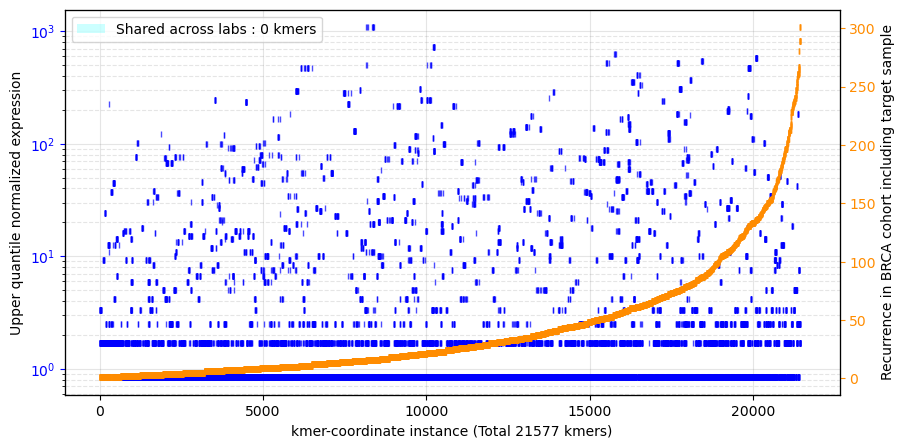

In [161]:
df_plot = df.loc[df[shared_col] == False]
df_plot['index'] = np.arange(df_plot.shape[0])
plot_recurrence_shareness(df_plot,  expr_col, recurr_col, shared_col, idx, base_plot, save=False)

/scratch/slurm-job.1272649/ipykernel_2749322/3586803471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['index'] = np.arange(df_plot.shape[0])
/scratch/slurm-job.1272649/ipykernel_2749322/3102146429.py:26: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
/scratch/slurm-job.1272649/ipykernel_2749322/3102146429.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color=color

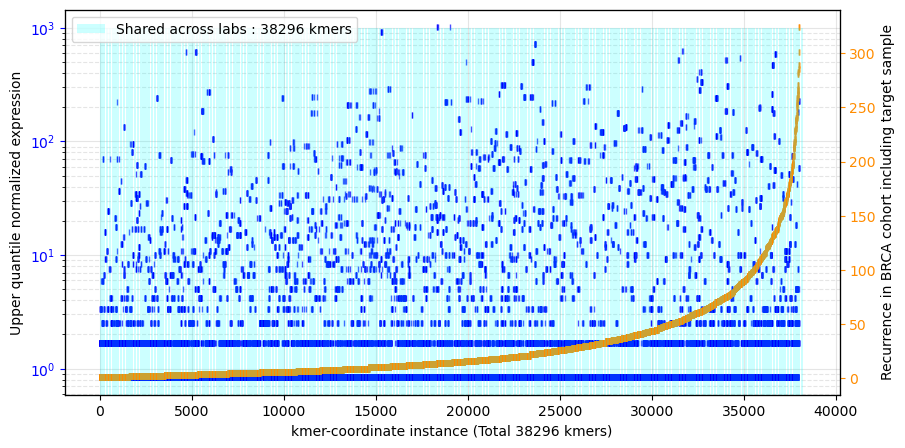

In [162]:
df_plot = df.loc[df[shared_col] == True]
df_plot['index'] = np.arange(df_plot.shape[0])
plot_recurrence_shareness(df_plot,  expr_col, recurr_col, shared_col, idx, base_plot, save=False)

# Plot 3 Recurrence Match 

In [20]:
df.head()

,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,TCGA24143101A01R156613all,TCGA24229801A01R156913all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon2<cancExon2,info_not_available,index,shared_across_labs
0,LKFLYSRPI,NaN,NaN,NaN,NaN,NaN,NaN,1997343:1997348:1993163:1993176:1993078:1993087,True,True,...,0.0,0.0,NaN,-,1993176:1997343:1993163:1993087,True,False,False,0,True
1,NGLLSTLQK,NaN,NaN,NaN,NaN,NaN,NaN,102905319:102905325:102908697:102908718:None:None,False,False,...,0.0,0.0,NaN,+,102905325:102908697,True,False,False,1,True
2,TASYNGLLS,NaN,NaN,NaN,NaN,NaN,NaN,102905307:102905325:102908697:102908706:None:None,False,False,...,0.0,0.0,NaN,+,102905325:102908697,True,False,False,2,True
3,TLMAQMASG,NaN,NaN,NaN,NaN,NaN,NaN,102044321:102044332:102044477:102044493:None:None,False,False,...,0.0,0.0,NaN,+,102044332:102044477,True,False,False,3,True
4,ASYNGLLST,NaN,NaN,NaN,NaN,NaN,NaN,102905310:102905325:102908697:102908709:None:None,False,False,...,0.0,0.0,NaN,+,102905325:102908697,True,False,False,4,True


In [21]:
df_shared = df.loc[df['shared_across_labs'] == True]
display(df_shared.shape)


(43156, 31)

In [12]:
ohsu_gener = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/OHSU_Feb2023_complete-annotated-shortlist.tsv.gz', sep='\t')

/cluster/customapps/biomed/grlab/users/prelotla/software/miniconda/envs/pep3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (57,58,60,62,63,64,65,66,67,68,70,72) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
def ohsu_to_eth_coord(df, col = 'jx', sep = ';'):
    tmp_jx = df[col].str.split(sep,  expand = True)
    df['junction_coordinate'] = '' + (tmp_jx[1].astype(int) - 1).astype(str) + ':' + tmp_jx[2] 
    df['junction_coordinate_no_shift'] = '' + (tmp_jx[1].astype(int)).astype(str) + ':' + tmp_jx[2] 
    return df
ohsu_gener = ohsu_to_eth_coord(ohsu_gener)

In [14]:
ohsu_gener.head()

,jx,TCGA-24-1431-01A-01R-1566-13,TCGA-24-2298-01A-01R-1569-13,TCGA-25-1313-01A-01R-1565-13,TCGA-25-1319-01A-01R-1565-13,TCGA-61-2008-01A-02R-1568-13,TCGA-A2-A0D2-01A-21R-A034-07,TCGA-A2-A0SX-01A-12R-A084-07,TCGA-AO-A0JM-01A-21R-A056-07,TCGA-BH-A18V-01A-11R-A12D-07,...,in-frame_nonhanging-tx_biexons,in-frame_peptide_sequence,hanging_txs_included_inframe_pepseqs,prefiltered_in-frame_epitopes,prefiltered_inframe_epitope_count,in-frame_neoepitopes,in-frame_neoepitope_count,frame-agnostic_all-transcript_biexons,junction_coordinate,junction_coordinate_no_shift
0,chr10;48726;48803;-,0.000000,2.176140,0.842293,2.517914,0.961344,0.000000,5.700962,2.102386,1.237161,...,MNMPSTPLAPTTGTATCSWSASTCTTTRPAVAGQCGAGNNWAKGHY...,NVYYNEASGGRYVPRAV;TCTTTRPAVAGQCGAG,NVYYNEASGGRYVPRAV;TCTTTRPAVAGQCGAG,NVYYNEASG;VYYNEASGG;YYNEASGGR;YNEASGGRY;NEASGG...,17.0,TTRPAVAGQ;TRPAVAGQC;RPAVAGQCG;PAVAGQCGA;AVAGQCGAG,5.0,LTQIGQCGNQIGAKFWEVISDEHAIDSAGTYHGDSHLQLERINVYY...,48725:48803,48726:48803
1,chr10;277578;281199;-,2.295572,30.465966,16.003571,10.071656,26.917642,51.966700,53.589040,31.535793,50.723584,...,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...,RAHKSVTECAVFTWTNL,RAHKSVTECAVFTWTNL,RAHKSVTEC;AHKSVTECA;HKSVTECAV;KSVTECAVF;SVTECA...,9.0,NaN,0.0,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...,277577:281199,277578:281199
2,chr10;280261;281199;-,0.000000,0.000000,0.000000,0.000000,0.961344,0.000000,0.000000,6.307159,2.474321,...,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...,RAHKSVTEC,RAHKSVTEC,RAHKSVTEC,1.0,NaN,0.0,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...,280260:281199,280261:281199
3,chr10;281324;283271;-,3.443358,23.212165,18.530451,15.107483,20.188231,32.821074,33.065578,44.150110,40.826300,...,IWVHSAHNASGYFTIYGDESLQSDHFNSRLSFGDTQTIWARTGYLG...,TELTDANGERHDALYVV,TELTDANGERHDALYVV,TELTDANGE;ELTDANGER;LTDANGERH;TDANGERHD;DANGER...,9.0,NaN,0.0,IWVHSAHNASGYFTIYGDESLQSDHFNSRLSFGDTQTIWARTGYLG...,281323:283271,281324:283271
4,chr10;283447;286272;-,1.147786,41.346668,19.372744,6.714437,28.840330,61.539513,62.710579,37.842952,92.787044,...,ALRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDS...,LGDSHLGEIWVHSAHN,LGDSHLGEIWVHSAHN,LGDSHLGEI;GDSHLGEIW;DSHLGEIWV;SHLGEIWVH;HLGEIW...,8.0,NaN,0.0,ALRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDS...,283446:286272,283447:286272


In [25]:
# Coordiante intersection
ohsu_gener.set_index('junction_coordinate')

diff_coord = set(df_shared['junction_coordinate']).difference(set(ohsu_gener['junction_coordinate']))
print('diff', len(diff_coord))

exact_coord = set(df_shared['junction_coordinate']).intersection(set(ohsu_gener['junction_coordinate']))
print('inter', len(exact_coord))

exact_coord = ohsu_gener.set_index('junction_coordinate').loc[list(exact_coord)].reset_index()

# -----

ohsu_gener.set_index('junction_coordinate_no_shift')

diff_coord_no_shift = set(df_shared['junction_coordinate']).difference(set(ohsu_gener['junction_coordinate_no_shift']))
print('diff', len(diff_coord))
exact_coord_no_shift = set(df_shared['junction_coordinate']).intersection(set(ohsu_gener['junction_coordinate_no_shift']))
print('inter', len(exact_coord_no_shift))

# -----
exact_coord_no_shift = ohsu_gener.set_index('junction_coordinate').loc[list(exact_coord_no_shift)].reset_index()

exact_coord_shared = df_shared.merge(exact_coord, on = 'junction_coordinate', how = 'inner')
print(exact_coord_shared.shape)
exact_coord_no_shift_shared = df_shared.merge(exact_coord, 
                                              left_on = 'junction_coordinate',
                                              right_on = 'junction_coordinate_no_shift', how = 'inner')
print(exact_coord_no_shift_shared.shape)

diff 2047
inter 5841


In [28]:
exact_coord.head()

,junction_coordinate,jx,TCGA-24-1431-01A-01R-1566-13,TCGA-24-2298-01A-01R-1569-13,TCGA-25-1313-01A-01R-1565-13,TCGA-25-1319-01A-01R-1565-13,TCGA-61-2008-01A-02R-1568-13,TCGA-A2-A0D2-01A-21R-A034-07,TCGA-A2-A0SX-01A-12R-A084-07,TCGA-AO-A0JM-01A-21R-A056-07,...,in-frame_all-transcript_biexons,in-frame_nonhanging-tx_biexons,in-frame_peptide_sequence,hanging_txs_included_inframe_pepseqs,prefiltered_in-frame_epitopes,prefiltered_inframe_epitope_count,in-frame_neoepitopes,in-frame_neoepitope_count,frame-agnostic_all-transcript_biexons,junction_coordinate_no_shift
0,95405623:95405783,chr2;95405624;95405783;+,0.0,0.0,0.0,0.839305,0.000000,0.0,0.0,0.0,...,MLVSGRRRLLTVLLQAQKWPFQPSQWQE;MLVSGRRRLLTVLLQAQ...,MLVSGRRRLLTVLLQAQKWPFQPSQWQE;MLVSGRRRLLTVLLQAQ...,LQAQKWPFQPSQWQE;LQAQKWPFQPSQWQEEP,LQAQKWPFQPSQWQE;LQAQKWPFQPSQWQEEP,LQAQKWPFQ;QAQKWPFQP;AQKWPFQPS;QKWPFQPSQ;KWPFQP...,16.0,QKWPFQPSQ;KWPFQPSQW;WPFQPSQWQ;PFQPSQWQE;QKWPFQ...,10.0,CWCLVEEGYSQFCCRLRSGPFNPLSGK;CWCLVEEGYSQFCCRLRS...,95405624:95405783
1,49026749:49026801,chr3;49026750;49026801;-,0.0,0.0,0.0,0.839305,1.922689,0.0,0.0,0.0,...,LVVAPAGITLKEANEILQRSKKGKLPIVNEDDELVAIIARTDLKKN...,LVVAPAGITLKEANEILQRSKKGKLPIVNEDDELVAIIARTDLKKN...,LKKNRDYPLMRMTSIGW,LKKNRDYPLMRMTSIGW,LKKNRDYPL;KKNRDYPLM;KNRDYPLMR;NRDYPLMRM;RDYPLM...,9.0,KKNRDYPLM;KNRDYPLMR;NRDYPLMRM;RDYPLMRMT;DYPLMR...,8.0,LVVAPAGITLKEANEILQRSKKGKLPIVNEDDELVAIIARTDLKKN...,49026750:49026801
2,55992117:55992290,chr12;55992118;55992290;+,0.0,0.0,0.0,0.839305,0.000000,0.0,0.0,0.0,...,QAAIVVYDITNQEAQAYADDNSLLFMETSAKTAMNVNDLFLAIAKK...,QAAIVVYDITNQEAQAYADDNSLLFMETSAKTAMNVNDLFLAIAKK...,IAKKLPKSEPLR,IAKKLPKSEPLR,IAKKLPKSE;AKKLPKSEP;KKLPKSEPL;KLPKSEPLR,4.0,KKLPKSEPL;KLPKSEPLR,2.0,QAAIVVYDITNQEAQAYADDNSLLFMETSAKTAMNVNDLFLAIAKK...,55992118:55992290
3,70775386:70791899,chr7;70775387;70791899;+,0.0,0.0,0.0,0.839305,0.000000,0.0,0.0,0.0,...,DPFRPMLRKSGDGWWCLSDTHRSPVTSHTPHVRTMPFLVCPISYLY...,VDPFYRHSLFHSYPPAVSGIPPMIPPTGPFGSLQGAFQPKLTDPFR...,DPFRPMLRKSGDGWWC,DPFRPMLRKSGDGWWC,DPFRPMLRK;PFRPMLRKS;FRPMLRKSG;RPMLRKSGD;PMLRKS...,8.0,PFRPMLRKS;FRPMLRKSG;RPMLRKSGD;PMLRKSGDG;MLRKSG...,7.0,DPFRPMLRKSGDGWWCLSDTHRSPVTSHTPHVRTMPFLVCPISYLY...,70775387:70791899
4,30723406:30724023,chr6;30723407;30724023;+,0.0,0.0,0.0,1.678609,0.000000,0.0,0.0,0.0,...,LVDLEPGTMDSVRSGPFGQIFRPDNFVFGQSGAGNNWAKGHYTEGA...,LVDLEPGTMDSVRSGPFGQIFRPDNFVFGQSGAGNNWAKGHYTEGA...,TEGAELVDSVHEGGR,TEGAELVDSVHEGGR,TEGAELVDS;EGAELVDSV;GAELVDSVH;AELVDSVHE;ELVDSV...,7.0,GAELVDSVH;AELVDSVHE;ELVDSVHEG;LVDSVHEGG;VDSVHEGGR,5.0,LVDLEPGTMDSVRSGPFGQIFRPDNFVFGQSGAGNNWAKGHYTEGA...,30723407:30724023


save to /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_22March_order_wany_wAnnot/plots/G_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1metadata2_shared_coordinates.pdf


/scratch/slurm-job.874041/ipykernel_3371416/1527455450.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


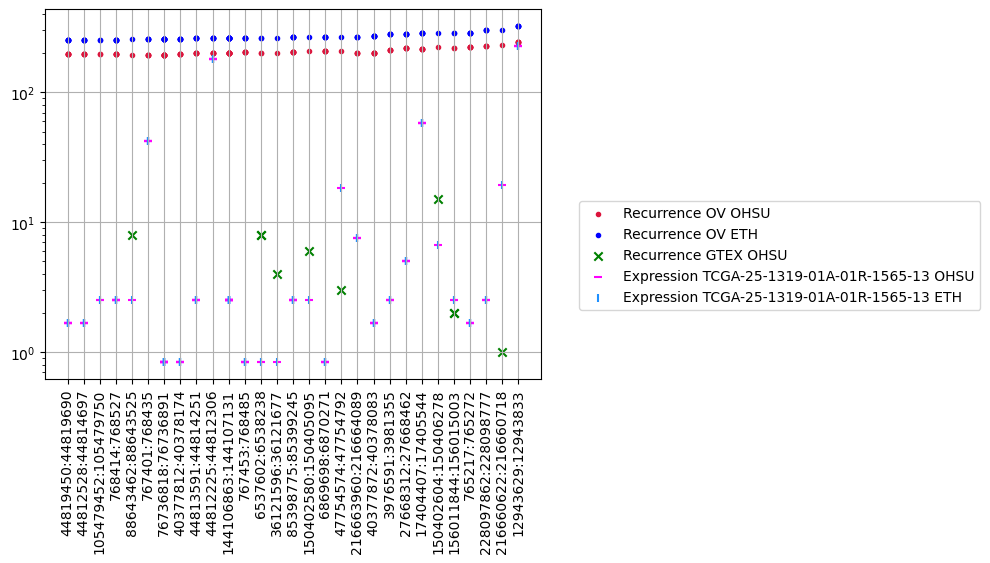

In [56]:
# Plot RECURRENCE MATCH BETWEEN PIPELINES  
df_plot = exact_coord_shared.loc[(exact_coord_shared['cancerCohortfilter >0.0'] > 250) & 
                                (exact_coord_shared['has_cds'] == 1)]

plt.grid()
plt.scatter(df_plot['junction_coordinate'], 
            df_plot['OV_over_0'], 
            label = 'Recurrence OV OHSU', color = 'crimson', marker=".")
plt.scatter(df_plot['junction_coordinate'], 
            df_plot['cancerCohortfilter >0.0'], 
            label = 'Recurrence OV ETH', color = 'blue', marker=".")
plt.scatter(df_plot['junction_coordinate'], 
            df_plot['GTEx_core_over0'], 
            label = 'Recurrence GTEX OHSU', color='green', marker='x')
plt.scatter(df_plot['junction_coordinate'], 
            df_plot['TCGA-25-1319-01A-01R-1565-13'], 
            label = 'Expression TCGA-25-1319-01A-01R-1565-13 OHSU', color='magenta', marker='_')
plt.scatter(df_plot['junction_coordinate'], 
            df_plot['TCGA25131901A01R156513all'], 
            label = 'Expression TCGA-25-1319-01A-01R-1565-13 ETH', color='dodgerblue', marker='|')

plt.yscale('log')

plt.legend(bbox_to_anchor=(1.4, 0., 0.5, 0.5), loc = 'upper right')
plt.xticks(rotation=90)


save = True
name = 'shared_coordinates'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
fig.show()



In [57]:
# Small explode test 

df_plot['kmer_ohsu'] = df_plot['in-frame_neoepitopes'].str.split(';')
df_plot.shape
df_plot = df_plot.explode('kmer_ohsu')

print(df_plot['junction_coordinate'].unique().shape)
print(df_plot.loc[df_plot['kmer'] == df_plot['kmer_ohsu']].shape)

/scratch/slurm-job.874041/ipykernel_3371416/1076816925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['kmer_ohsu'] = df_plot['in-frame_neoepitopes'].str.split(';')


In [69]:
col_ohsu = ['jx', 
       'TCGA-25-1319-01A-01R-1565-13',
       'GTEx_brain_testis_over0', 
       'GTEx_breast_over0', 
       'GTEx_core_over0', 
       'OV_over_0', 
       'motif', 'annotation', 'has_cds', 'gene',
       'gene_id', 'upstream_exon', 'upstream_txs', 'downstream_exon']
#exact_coord.loc[:, col_ohsu]

In [70]:
col_eth = ['kmer',  'coord',
       'junctionAnnotated', 'readFrameAnnotated', 'isCrossJunction', 'batch',
       'cancerCohortfilter >0.0', 
       'TCGA25131901A01R156513all', 'isAnnotated', 'strand',
       'junction_coordinate', 'coordinate_in_GTEX', 'gtexExon2<cancExon2',
       'info_not_available']
#df_shared.loc[df_shared['cancerCohortfilter >0.0'] > 200, col_eth]


In [32]:
len(diff_coord.intersection(diff_coord_no_shift))

2047

In [33]:
# Look diff
diff_eth = df_shared.set_index('junction_coordinate').loc[list(diff_coord.intersection(diff_coord_no_shift))].reset_index()

diff_eth.loc[diff_eth['cancerCohortfilter >0.0']>100, col_eth]

,kmer,coord,junctionAnnotated,readFrameAnnotated,isCrossJunction,batch,cancerCohortfilter >0.0,TCGA25131901A01R156513all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon2<cancExon2,info_not_available
19,HDHYMLAEA,44811316:44811329:44812289:44812300:44812366:4...,False,False,True,28986,137,0.839305,NaN,+,44811329:44812289:44812300:44812366,True,False,False
26,NAGKKKCSV,27669232:27669239:27668517:27668535:27668310:2...,True,True,True,924,122,0.839305,NaN,-,27668535:27669232:27668517:27668312,True,False,False
27,AGKKKCSVA,27669232:27669236:27668517:27668535:27668307:2...,True,True,True,924,122,0.839305,NaN,-,27668535:27669232:27668517:27668312,True,False,False
28,GKKKCSVAA,27669232:27669233:27668517:27668535:27668304:2...,True,True,True,924,122,0.839305,NaN,-,27668535:27669232:27668517:27668312,True,False,False
49,QLGGFGDEC,44819177:44819183:44820804:44820822:44820915:4...,True,False,True,28986,198,0.839305,NaN,+,44819183:44820804:44820822:44820915,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4664,IAKAVHWAD,8863965:8863976:8863234:8863248:8862943:8862945,True,False,True,304,104,2.517914,NaN,-,8863248:8863965:8863234:8862945,True,False,False
4665,AKAVHWADQ,8863965:8863973:8863234:8863248:8862940:8862945,True,False,True,304,104,2.517914,NaN,-,8863248:8863965:8863234:8862945,True,False,False
4744,YWMYIIPAA,50480974:50480977:50482148:50482163:50483025:5...,True,False,True,29328,235,0.839305,NaN,+,50480977:50482148:50482163:50483025,True,False,False
4745,KYWMYIIPA,50480971:50480977:50482148:50482163:50483025:5...,True,False,True,29328,235,0.839305,NaN,+,50480977:50482148:50482163:50483025,True,False,False


In [34]:
# EXPLODE FOR KMERS
ohsu_gener['kmer'] = ohsu_gener['in-frame_neoepitopes'].str.split(';')
ohsu_gener.shape
ohsu_gener = ohsu_gener.explode('kmer')

In [35]:
# TEST KMER
kmer = 'VMVDMEKIW'
display(ohsu_gener.loc[ohsu_gener['kmer'] == kmer, col_ohsu + ['junction_coordinate']])
display(diff_eth.loc[diff_eth['kmer'] == kmer, col_eth])


,jx,TCGA-25-1319-01A-01R-1565-13,GTEx_brain_testis_over0,GTEx_breast_over0,GTEx_core_over0,OV_over_0,motif,annotation,has_cds,gene,gene_id,upstream_exon,upstream_txs,downstream_exon,junction_coordinate
465081,chr17;81512025;81512129;-,0.839305,0.0,0.0,0.0,103,GCCG,0,1,ACTG1,ENSG00000184009.12,1.0,ENST00000644774.1;ENST00000575087.5;ENST000005...,1.0,81512024:81512129
619851,chr7;5529283;5529387;-,1.678609,0.0,0.0,2.0,26,GCCG,0,1,ACTB,ENSG00000075624.16,1.0,ENST00000645576.1;ENST00000443528.5;ENST000006...,1.0,5529282:5529387


,kmer,coord,junctionAnnotated,readFrameAnnotated,isCrossJunction,batch,cancerCohortfilter >0.0,TCGA25131901A01R156513all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon2<cancExon2,info_not_available


In [80]:
print(max(ohsu_gener['OV_over_0']))
print(max(ohsu_gener['GTEx_brain_testis_over0']))
print(max(ohsu_gener['GTEx_core_over0']))


289
1606.0
7908.0
1088


In [78]:
eth_gener = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_intermediate/complete_cancer_candidates_order_r.tsv.gz', 
           sep ='\t')

In [79]:
print(max(eth_gener['cancerCohortfilter >0.0']))
print(max(eth_gener['gtexCohortfilter >0.0']))


374
9476.0
